In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
from scipy.signal import find_peaks

In [2]:
def cart2sph(x, y, z):
    azimuth = np.arctan2(y, x)
    elevation = np.arctan2(z, np.sqrt(x ** 2 + y ** 2))
    R = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    return azimuth, elevation, R

In [3]:

desired_cols = ['fishz', 'fishy', 'fishx', 'realtime']
err = 0.001

def preprocess_data(df, err):
    if 'fishx' not in df.columns or 'fishy' not in df.columns or 'fishz' not in df.columns:
        return None, None

    ddf = df.copy()
    ddfx = df.copy()

    zs = ddfx["fishx"].rolling(window=11, center=True).mean().interpolate(method="pad")
    ys = ddfx["fishy"].rolling(window=11, center=True).mean().interpolate(method="pad")
    xs = ddfx["fishz"].rolling(window=11, center=True).mean().interpolate(method="pad")
    dx = xs.diff().interpolate(method='bfill')
    dy = ys.diff().interpolate(method='bfill')
    dz = zs.diff().interpolate(method='bfill')

    ddf["dx"] = dx
    ddf["dy"] = dy
    ddf["dz"] = dz

    angle_wrappeds = np.arctan2(dy, dx)

    last = 0
    angles = []
    for i in range(len(dx)):
        phi = np.arctan2(dy[i], dx[i])
        while phi < last - np.pi:
            phi += 2 * np.pi
        while phi > last + np.pi:
            phi -= 2 * np.pi
        last = phi
        angles.append(phi)

    angles = np.array(angles)

    return ddf, angles


In [4]:

def plot_velocity(velocity, file):
    plt.figure(figsize=(10, 5))
    plt.plot(velocity)
    plt.xlabel('frames')
    plt.ylabel('Velocity (m/s)')
    #  write fish id and trial as title
    plt.title(file)
    # plt.savefig(file[:-3] + "_velocity.png")
    # plt.close()
    plt.show()

    

def plot_velocity_peaks(velocity, peaks, file):
    plt.figure(figsize=(10, 5))
    plt.plot(velocity)
    plt.plot(peaks, velocity[peaks], ".")
    plt.xlabel('frames')
    plt.ylabel('Velocity (m/s)')
    plt.title(file)
    # plt.savefig(file[:-3] + "_velocity_peaks.png")
    # plt.close()
    plt.show()

def plot_angle_peaks(angles_at_peaks, file):
    plt.figure(figsize=(10, 5))
    plt.plot(angles_at_peaks)
    plt.xlabel('frames')
    plt.ylabel('Angle (rad)')
    plt.title(file)
    # plt.savefig(file[:-3] + "_angle_peaks.png")
    # plt.close()
    plt.show()

def plot_angle_diff(angles_at_peaks_diff, file):
    plt.figure(figsize=(10, 5))
    plt.plot(angles_at_peaks_diff)
    plt.xlabel('frames')
    plt.ylabel('Angle (rad)')
    plt.title(file)
    # plt.savefig(file[:-3] + "_angle_diff.png")
    # plt.close()
    plt.show()

def plot_angle_diff_histogram(angles_at_peaks_diff, file):
    plt.figure(figsize=(10, 5))
    plt.hist(angles_at_peaks_diff, bins=50)
    plt.xlabel('Angle (rad)')
    plt.ylabel('Count')
    plt.title(file)
    # plt.savefig(file[:-3] + "_angle_diff_histogram.png")
    # plt.close()
    plt.show()


In [5]:
def process_file(file):
    # Read data from compressed CSV file
    with gzip.open(file, 'rb') as f:
        df = pd.read_csv(f, usecols=desired_cols)

    if not df.empty:
        ddf, angles = preprocess_data(df, err)

        fHz = 100
        dt = 1 / fHz
        velocity = np.sqrt(ddf["dx"] ** 2 + ddf["dy"] ** 2 + ddf["dz"] ** 2) / dt

        plot_velocity(velocity, file)

        height = (0.1, 0.5)
        frames_btw_2bouts = round(fHz / 10)
        bout_width = round(fHz / 100)
        prominence = 0.05
        peaks, _ = find_peaks(velocity, height=height, distance=frames_btw_2bouts, width=bout_width, prominence=prominence)

        plot_velocity_peaks(velocity, peaks, file)

        angles_at_peaks = angles[peaks]

        plot_angle_peaks(angles_at_peaks, file)

        angles_at_peaks_normalized = np.mod(angles_at_peaks, 2 * np.pi) - np.pi
        angles_at_peaks_unwrapped = np.unwrap(angles_at_peaks_normalized)
        angles_at_peaks_diff = np.diff(angles_at_peaks_unwrapped)
        angles_at_peaks_diff = np.mod(angles_at_peaks_diff + np.pi, 2 * np.pi) - np.pi

        plot_angle_diff(angles_at_peaks_diff, file)
        plot_angle_diff_histogram(angles_at_peaks_diff, file)

        print(f"Graphs saved for file: {file}")
    else:
        print(f"Skipping empty file: {file}")


In [6]:

# Define the path to the folder containing the compressed CSV files
path = "/home/kkumari/PhD/fish-data/long-term-free-swim/"

# Get all compressed CSV files in the folder and sort them by name
all_files = sorted(glob.glob(os.path.join(path, "*.csv.gz")))


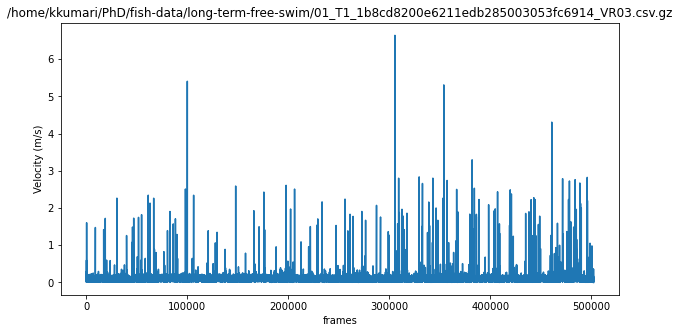

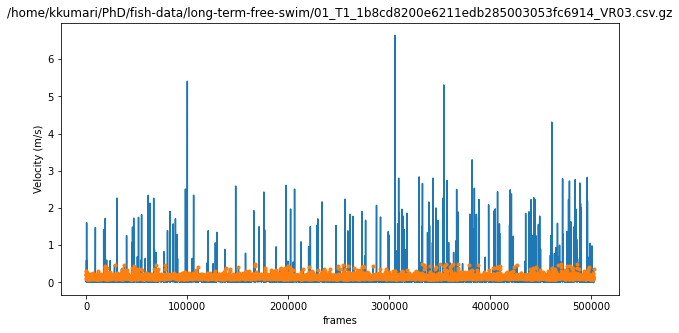

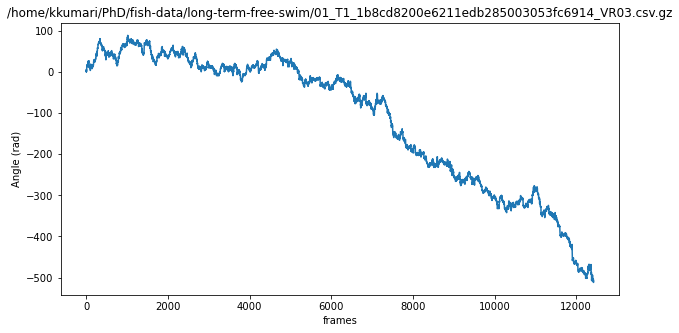

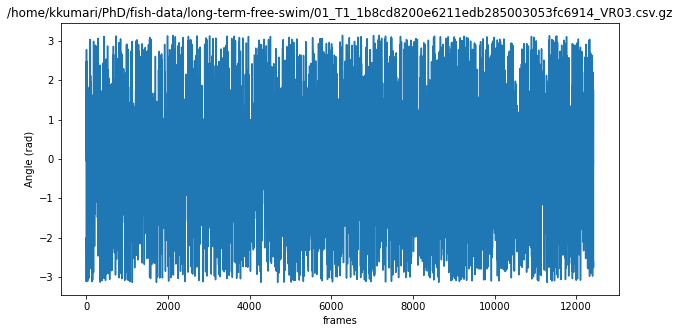

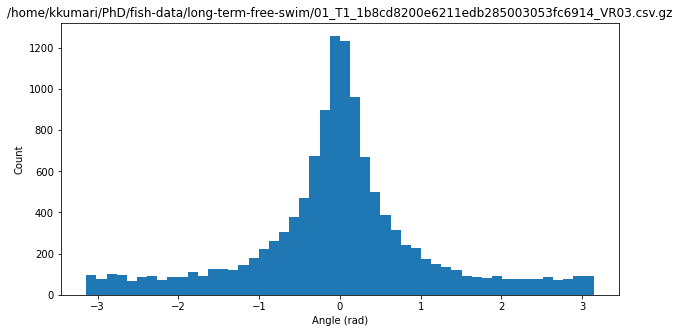

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/01_T1_1b8cd8200e6211edb285003053fc6914_VR03.csv.gz


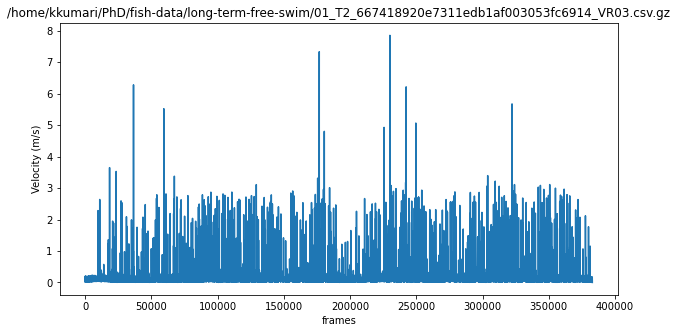

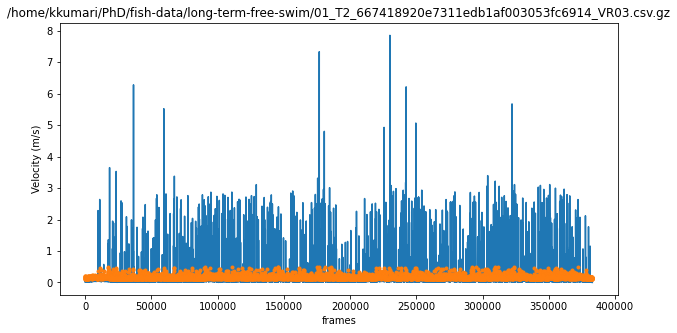

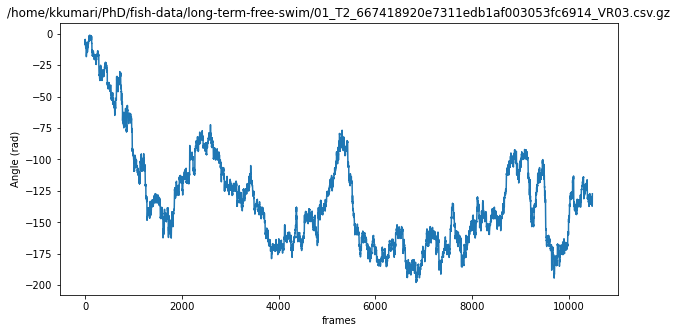

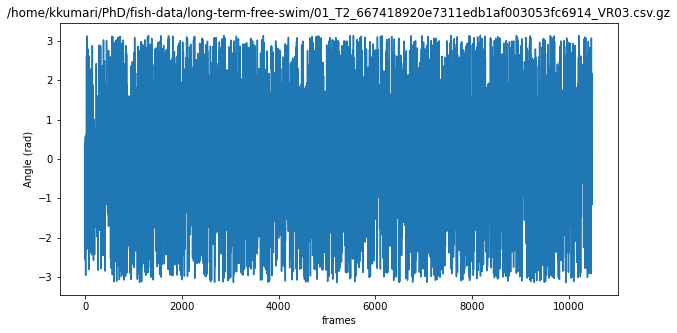

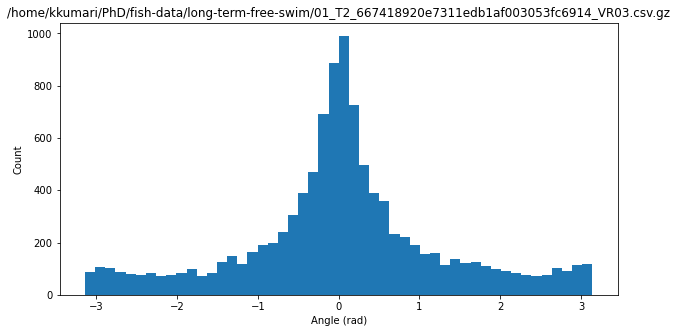

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/01_T2_667418920e7311edb1af003053fc6914_VR03.csv.gz


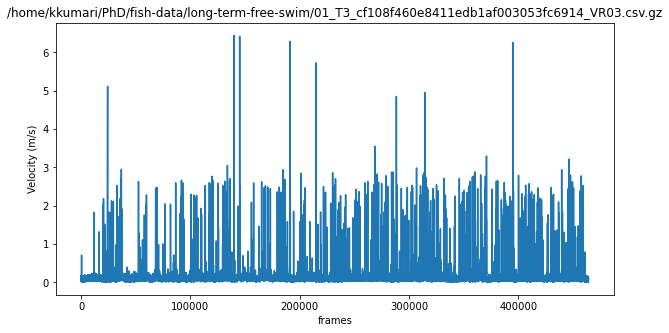

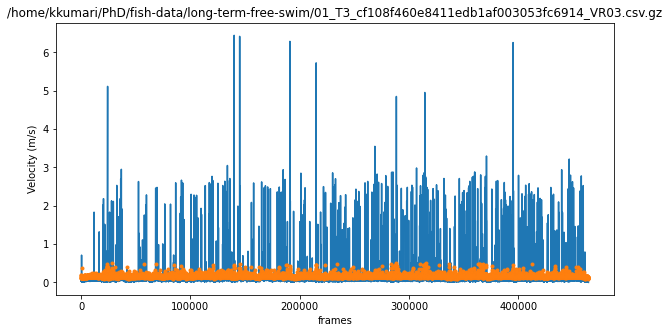

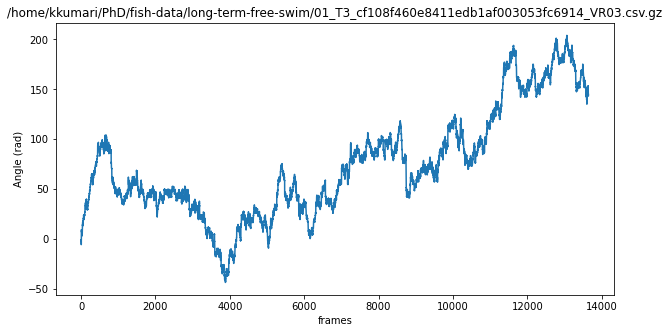

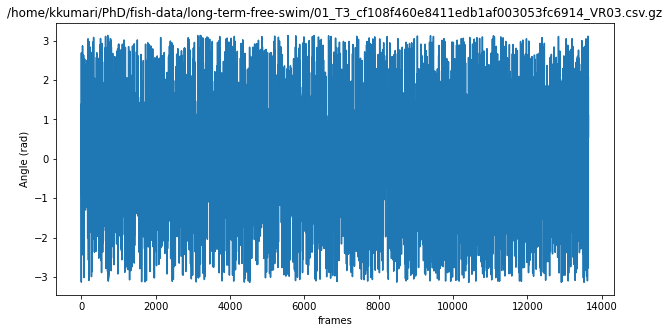

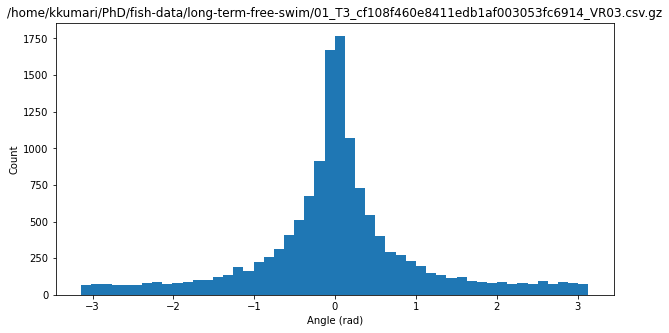

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/01_T3_cf108f460e8411edb1af003053fc6914_VR03.csv.gz


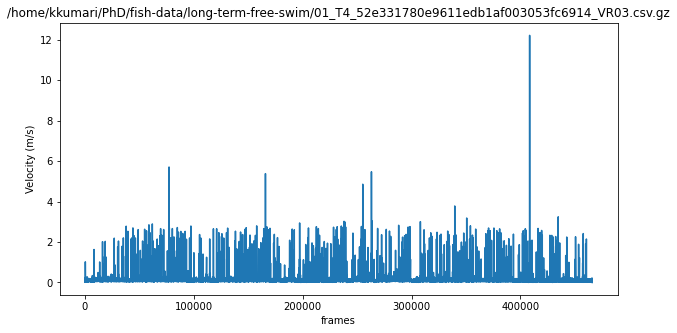

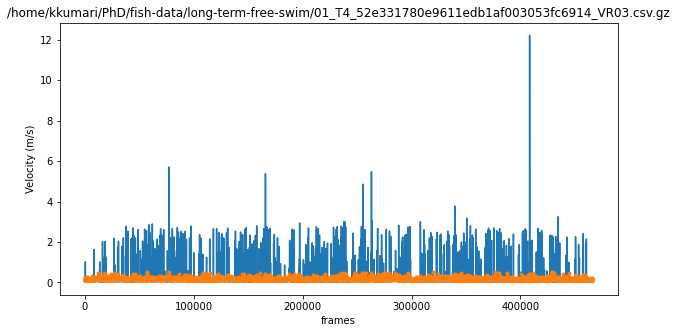

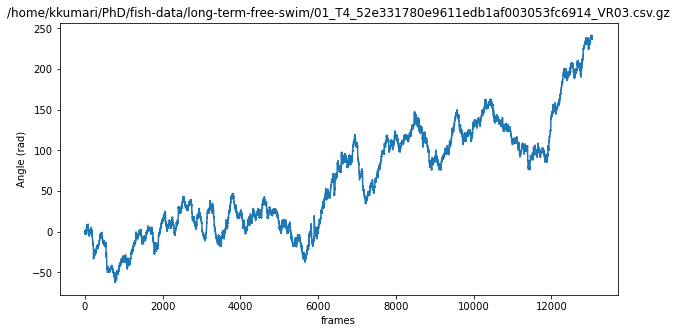

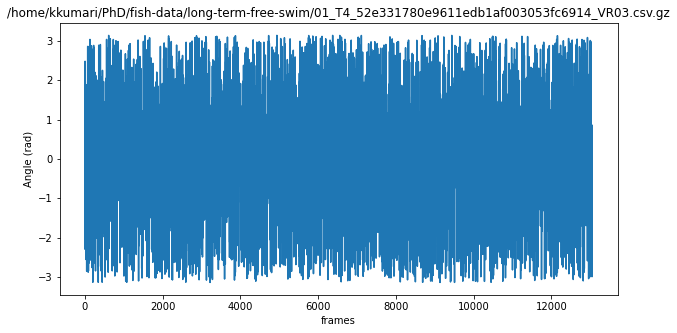

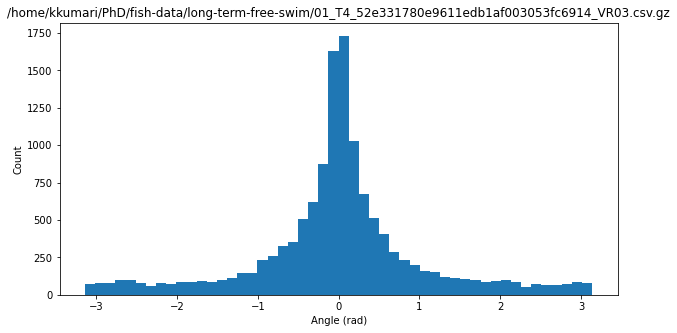

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/01_T4_52e331780e9611edb1af003053fc6914_VR03.csv.gz


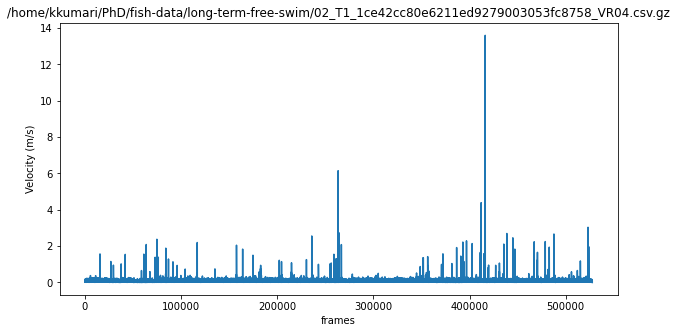

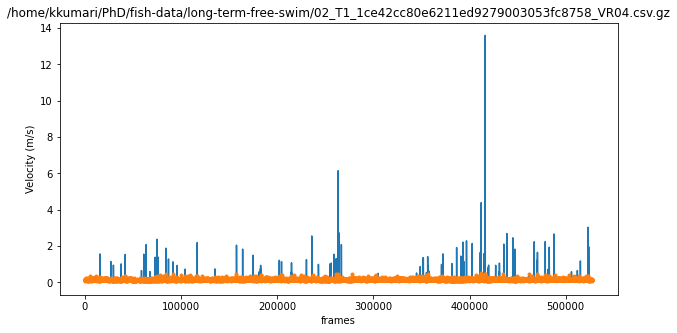

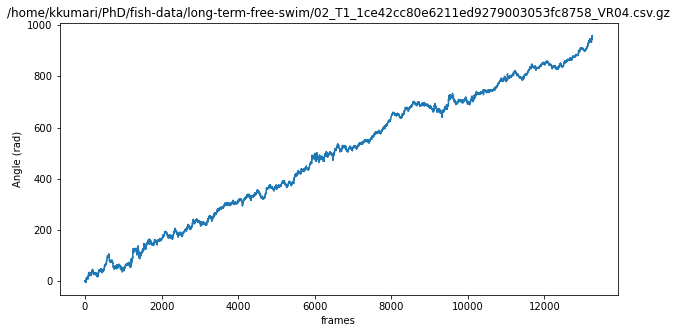

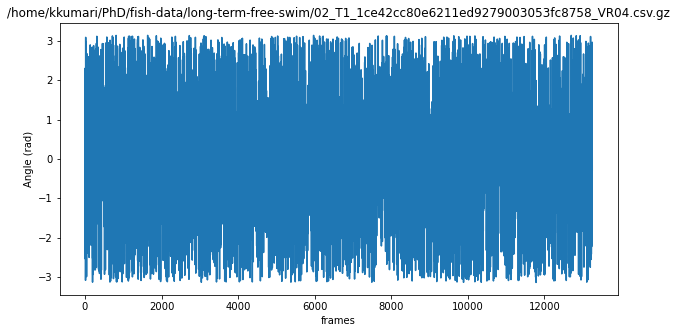

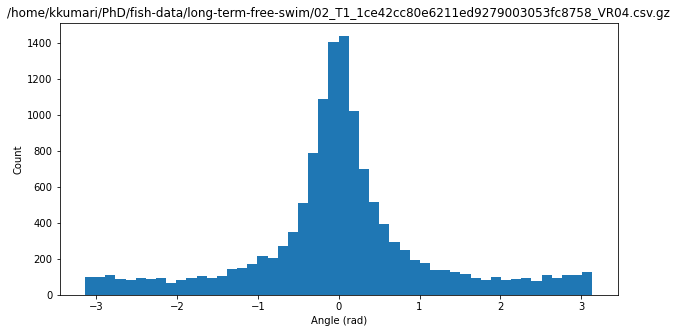

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/02_T1_1ce42cc80e6211ed9279003053fc8758_VR04.csv.gz


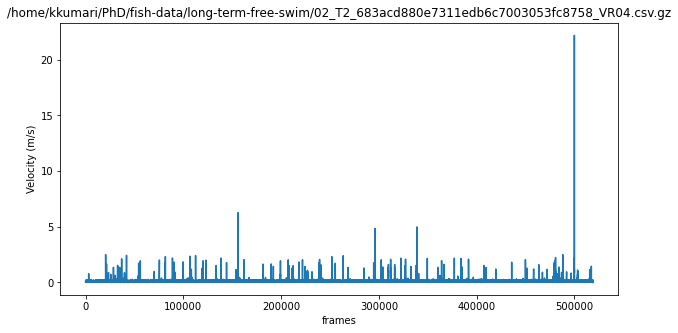

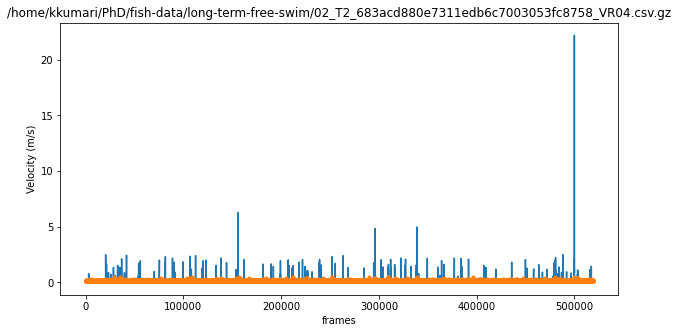

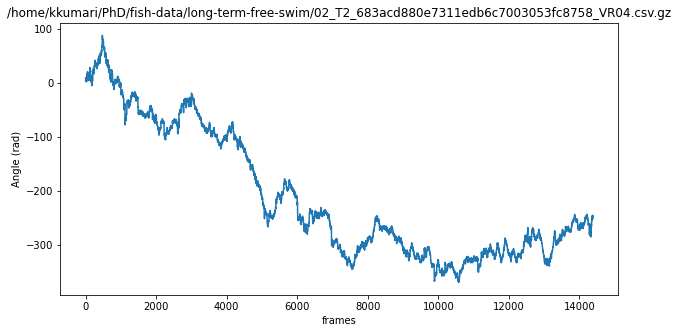

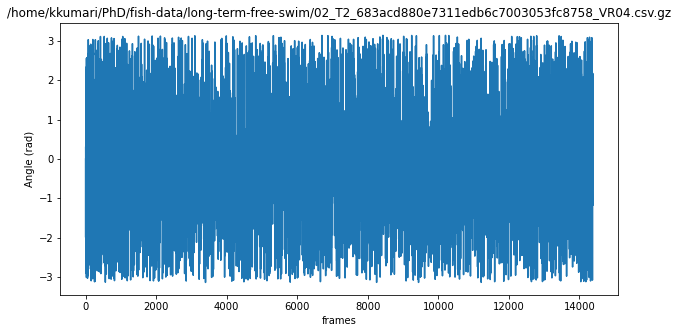

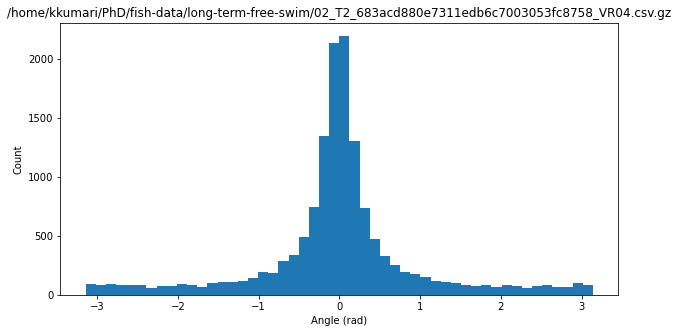

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/02_T2_683acd880e7311edb6c7003053fc8758_VR04.csv.gz


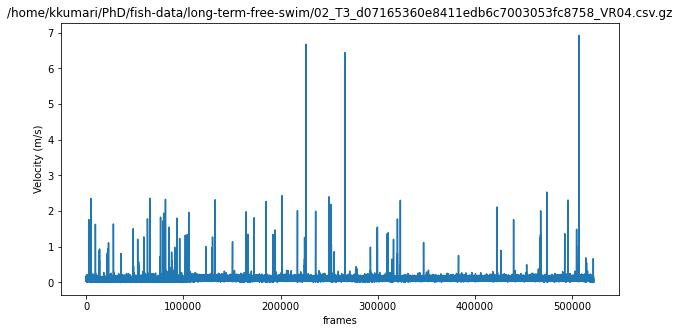

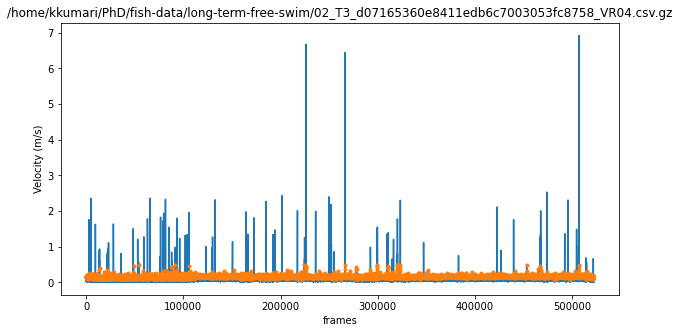

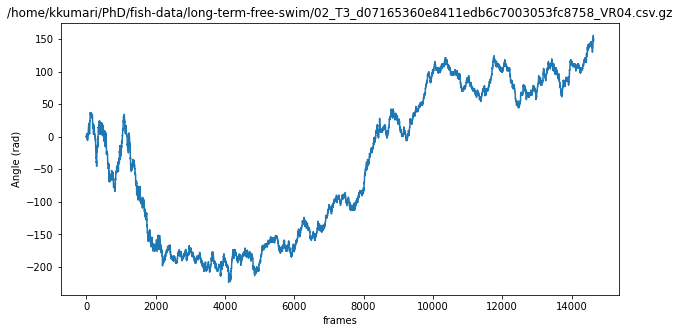

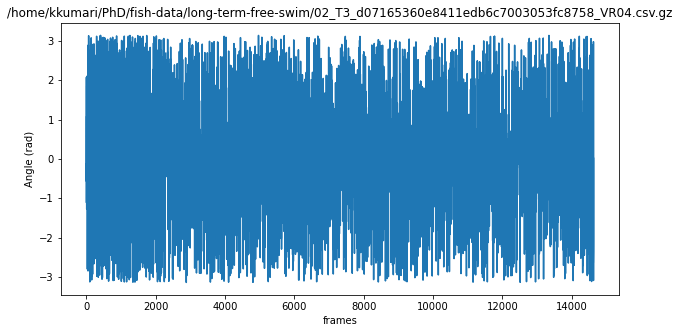

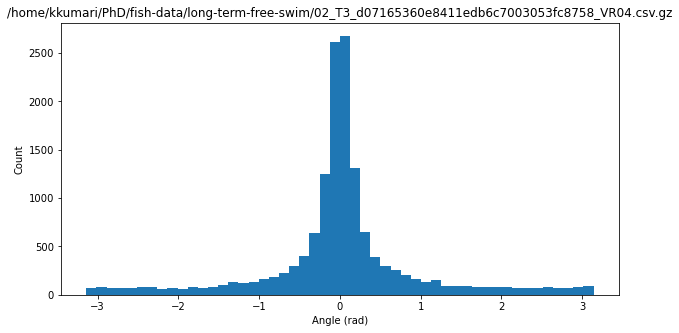

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/02_T3_d07165360e8411edb6c7003053fc8758_VR04.csv.gz


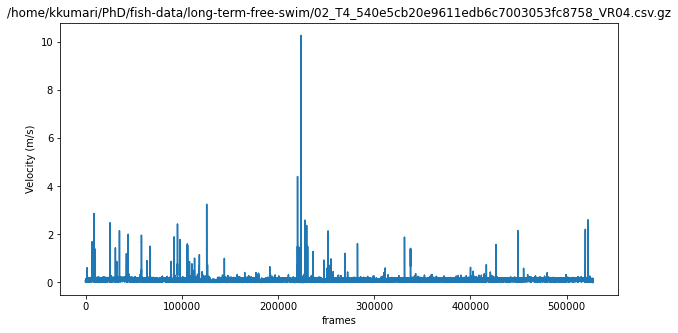

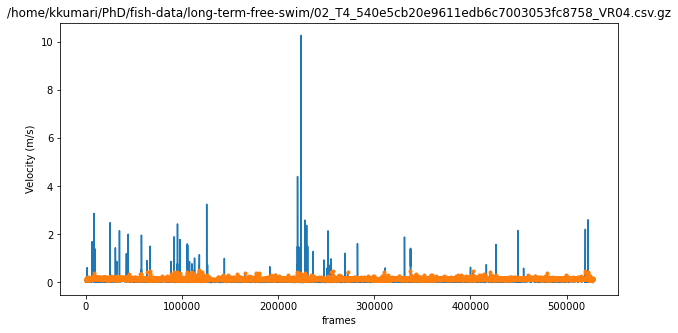

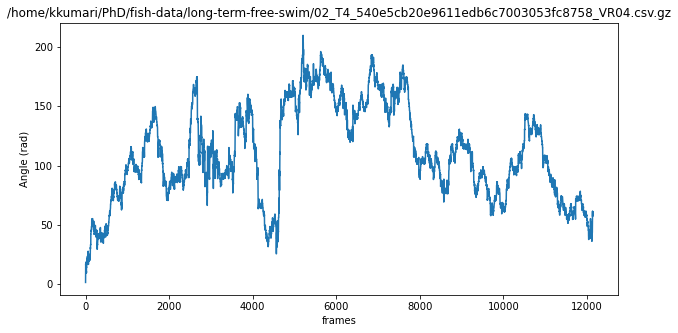

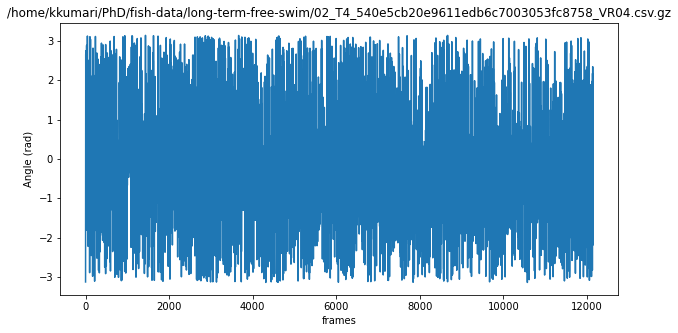

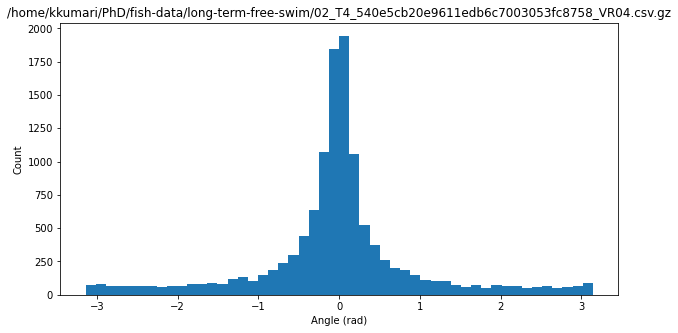

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/02_T4_540e5cb20e9611edb6c7003053fc8758_VR04.csv.gz


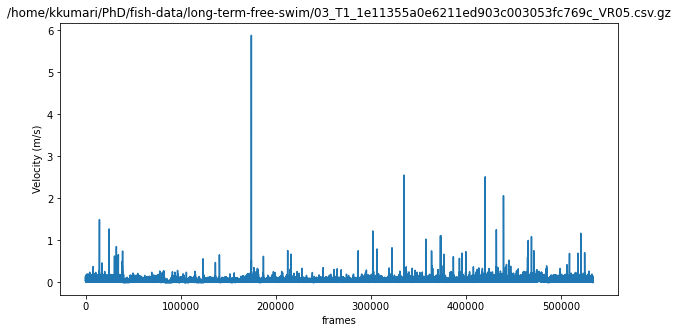

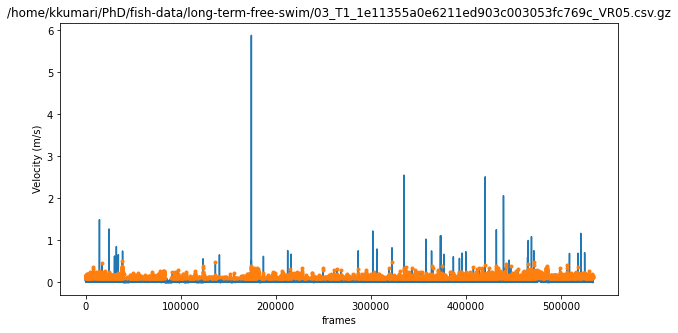

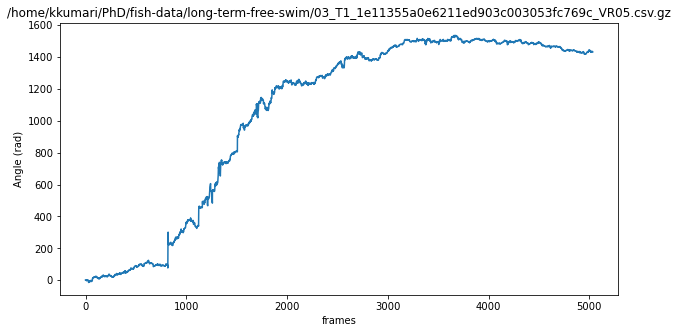

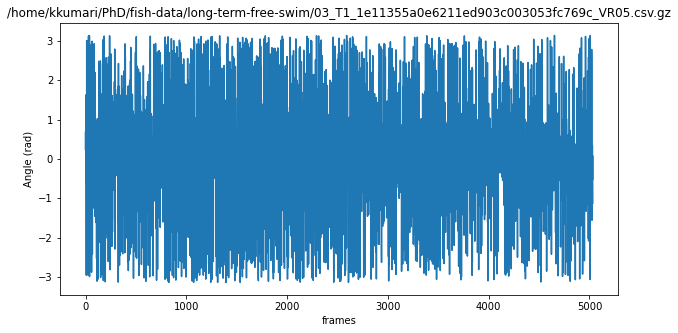

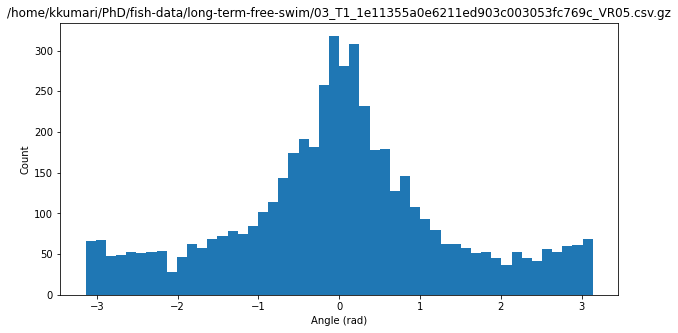

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/03_T1_1e11355a0e6211ed903c003053fc769c_VR05.csv.gz


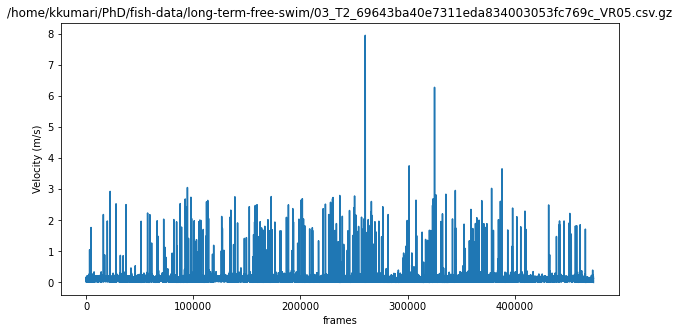

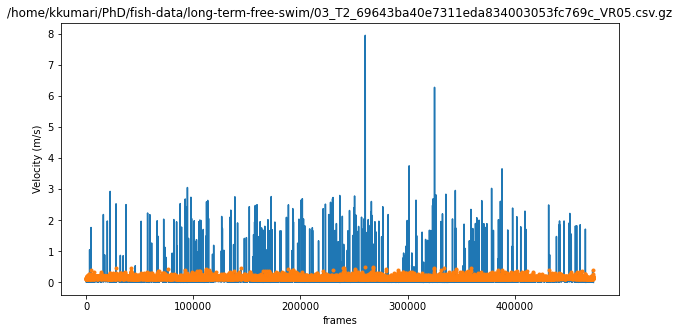

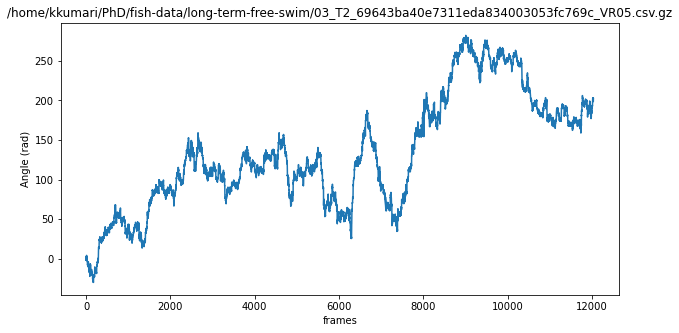

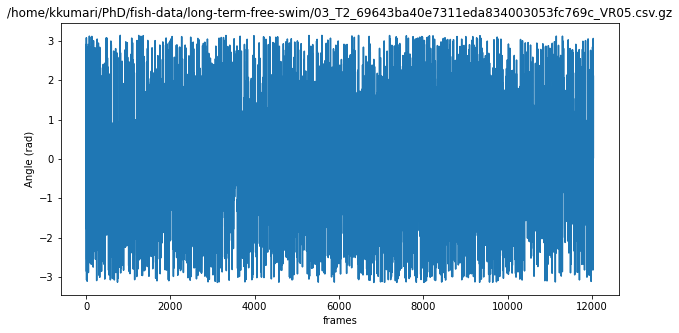

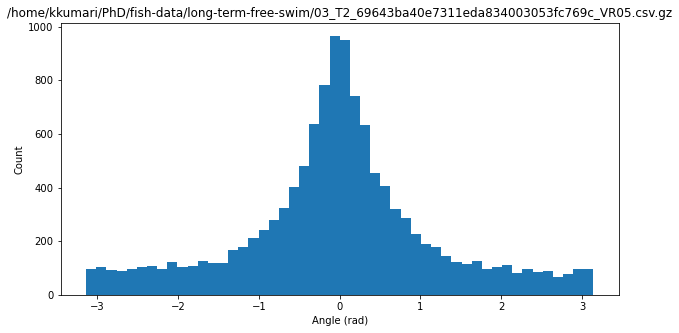

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/03_T2_69643ba40e7311eda834003053fc769c_VR05.csv.gz


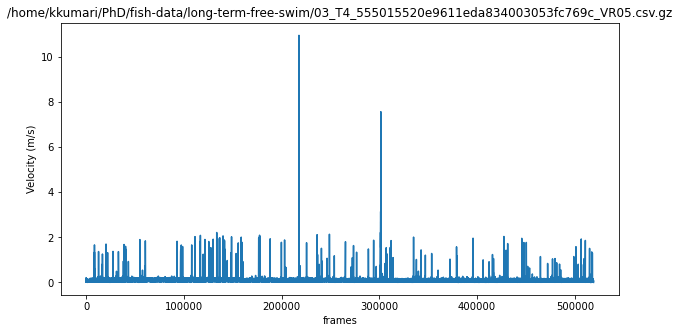

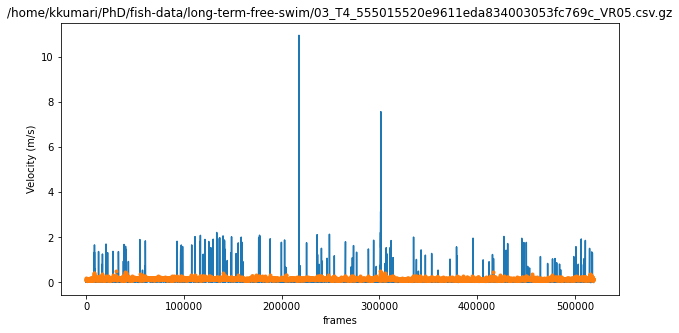

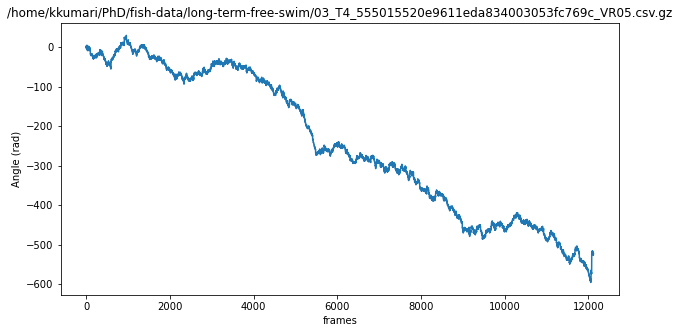

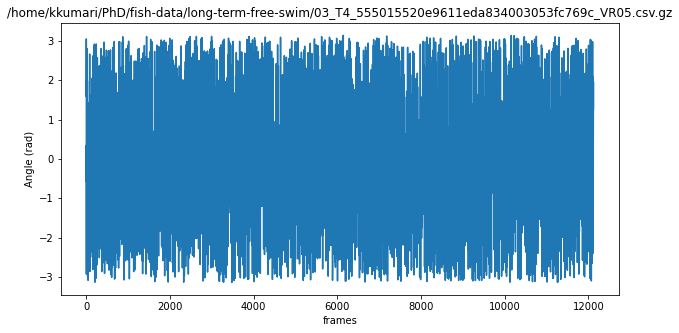

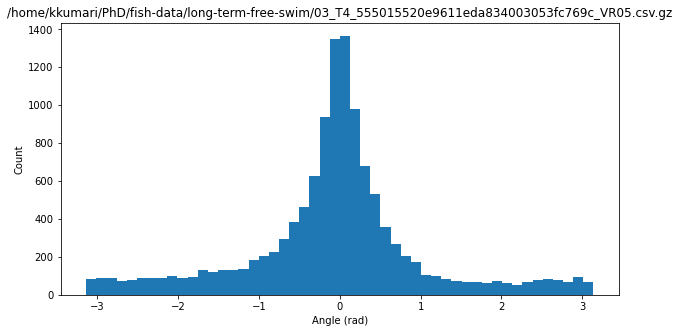

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/03_T4_555015520e9611eda834003053fc769c_VR05.csv.gz


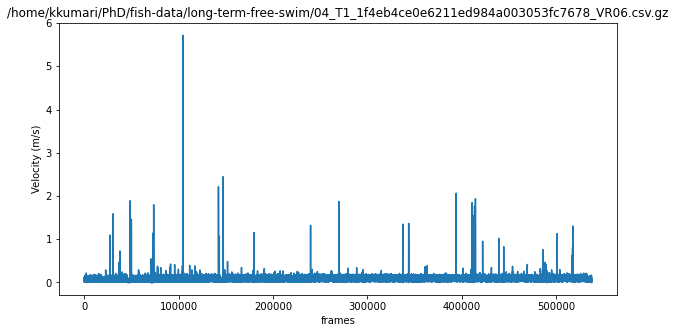

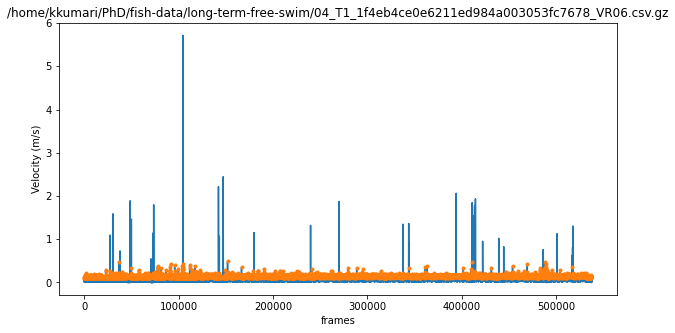

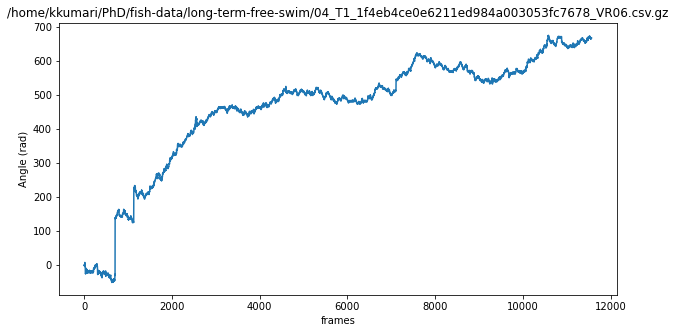

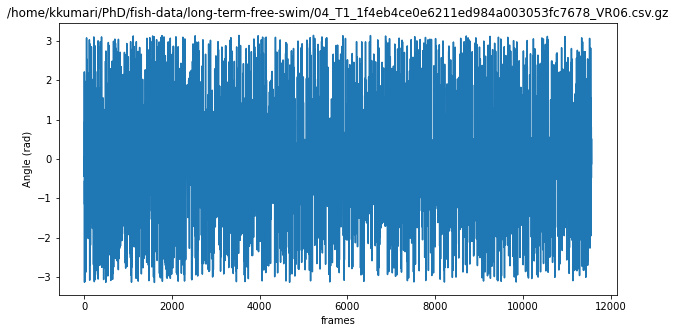

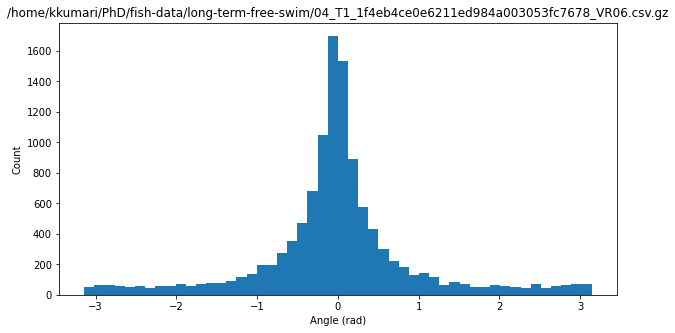

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/04_T1_1f4eb4ce0e6211ed984a003053fc7678_VR06.csv.gz


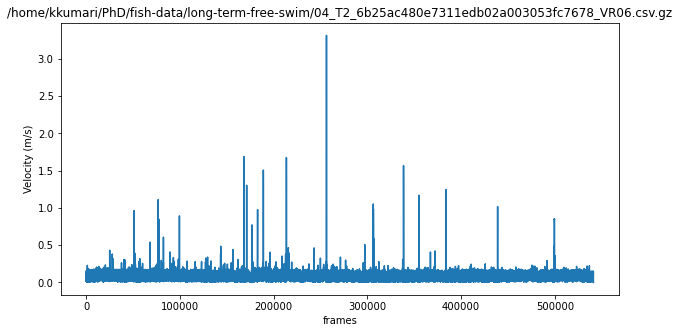

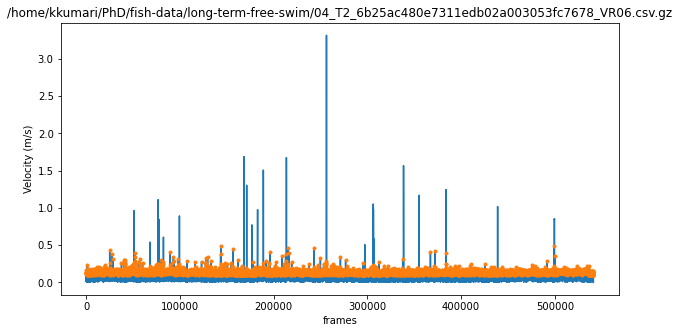

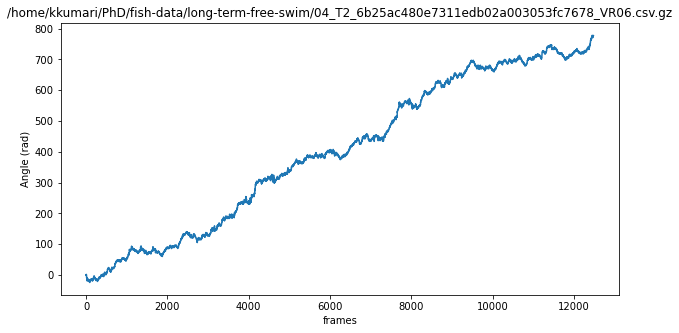

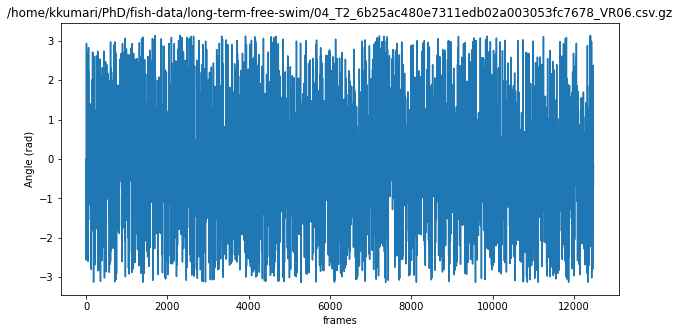

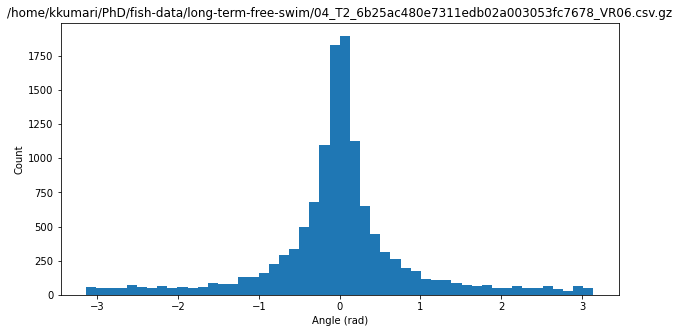

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/04_T2_6b25ac480e7311edb02a003053fc7678_VR06.csv.gz


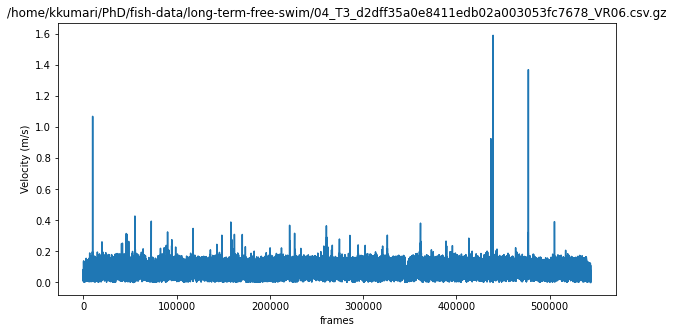

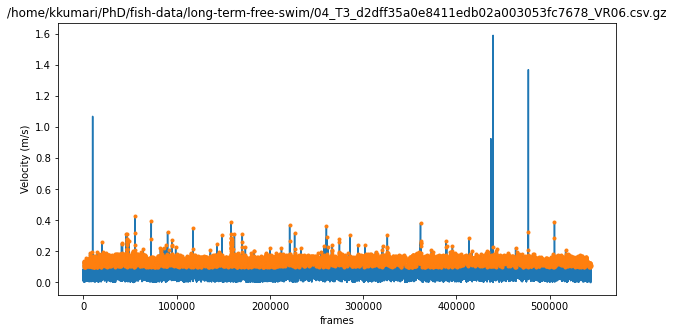

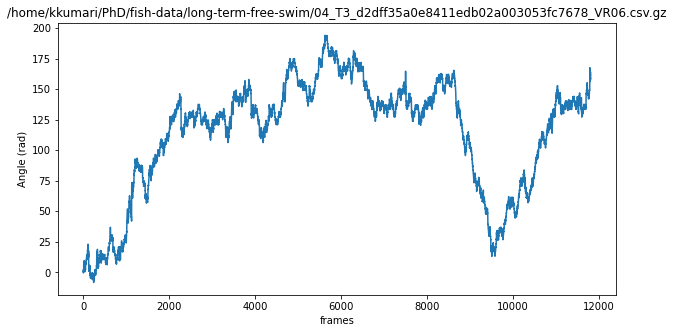

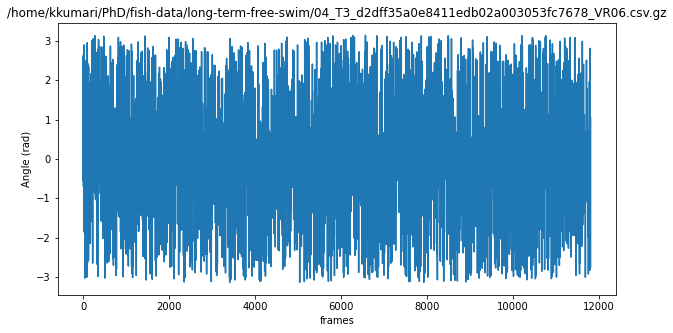

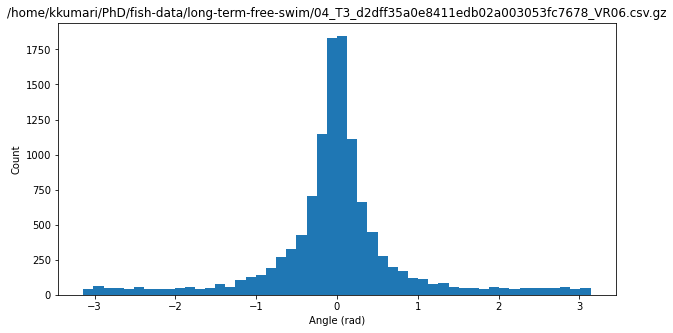

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/04_T3_d2dff35a0e8411edb02a003053fc7678_VR06.csv.gz


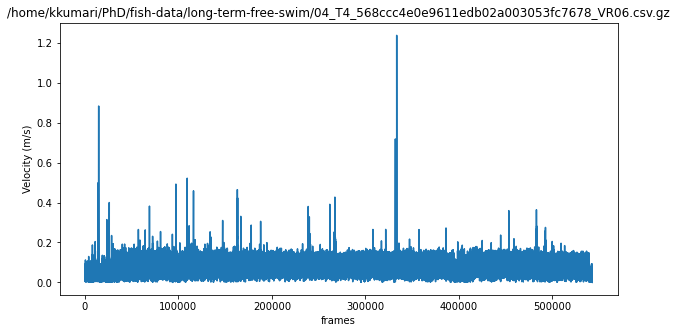

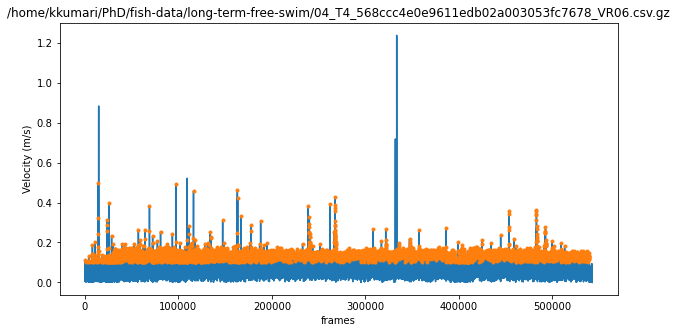

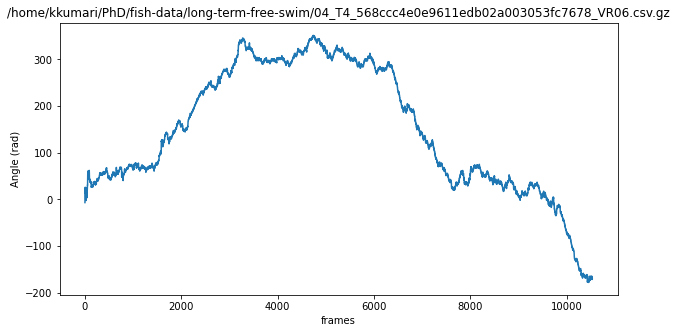

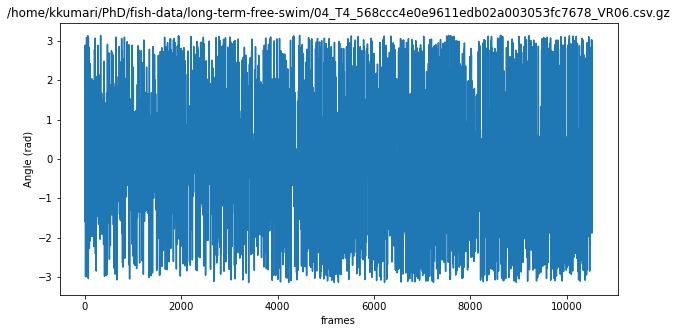

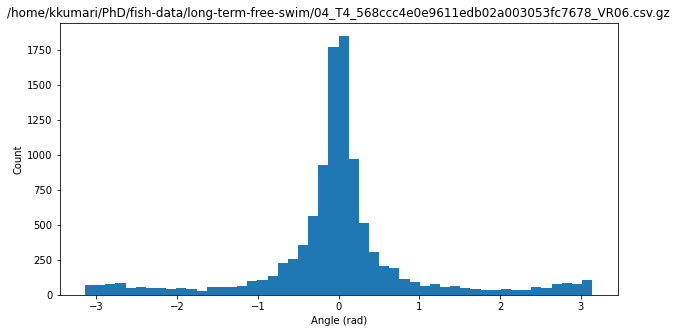

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/04_T4_568ccc4e0e9611edb02a003053fc7678_VR06.csv.gz


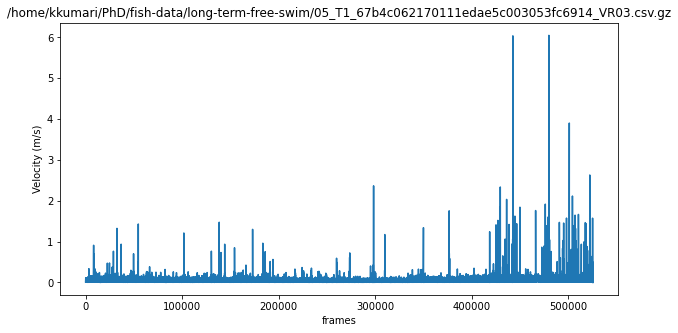

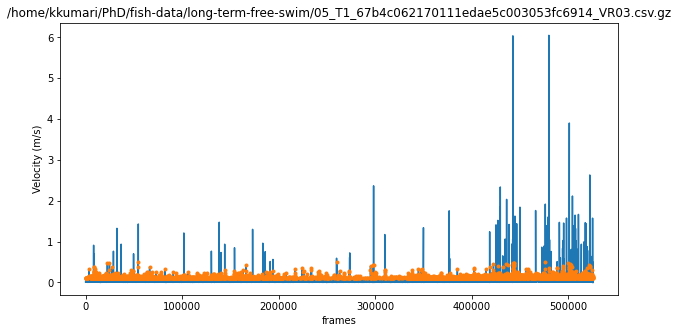

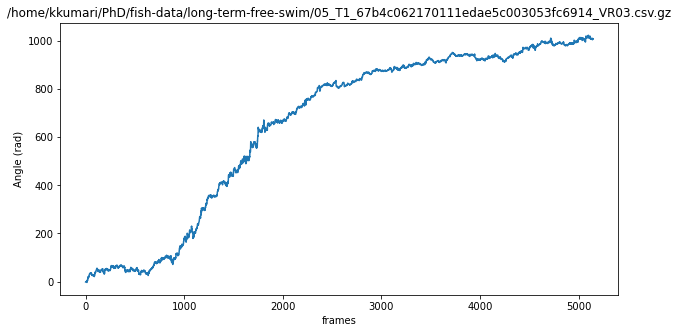

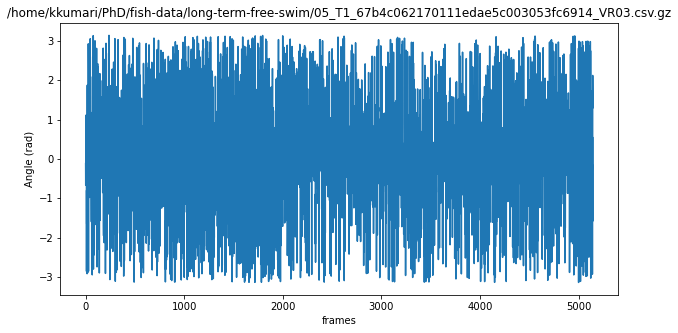

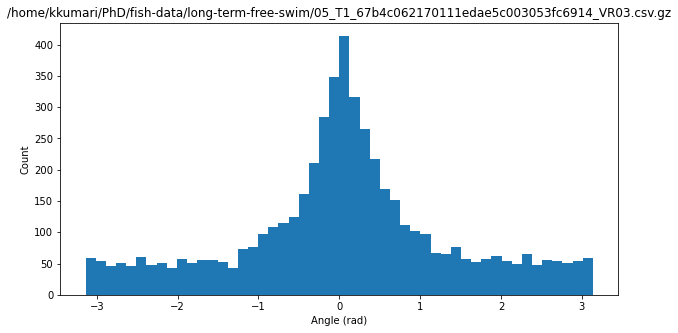

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/05_T1_67b4c062170111edae5c003053fc6914_VR03.csv.gz


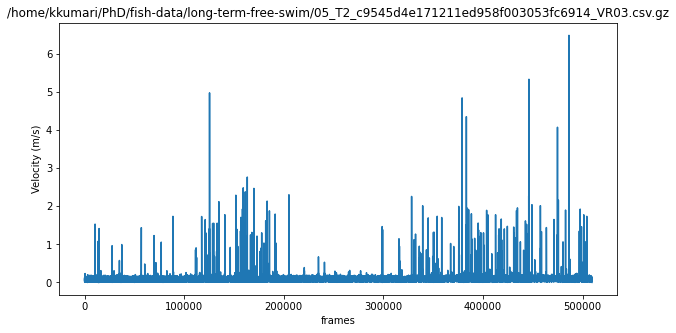

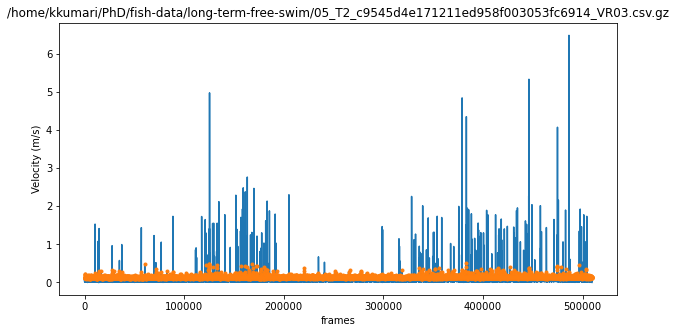

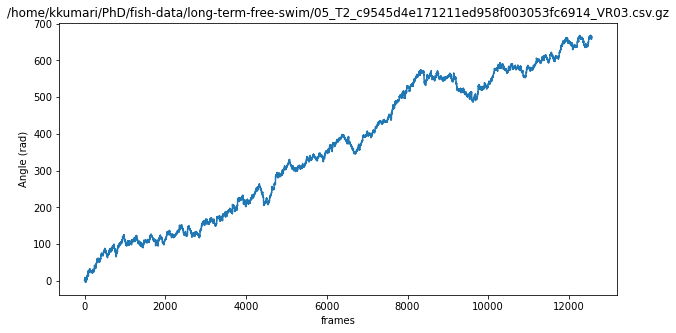

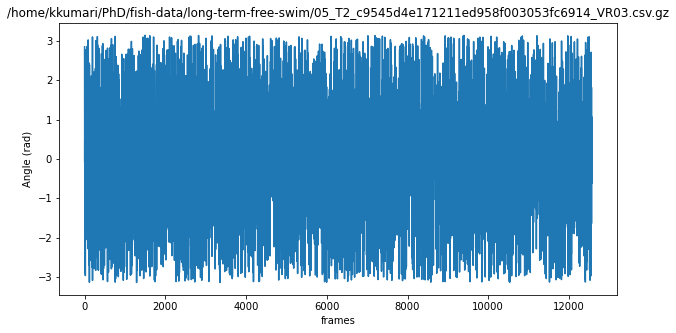

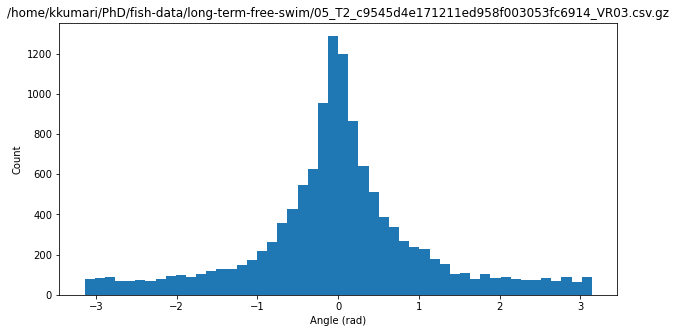

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/05_T2_c9545d4e171211ed958f003053fc6914_VR03.csv.gz


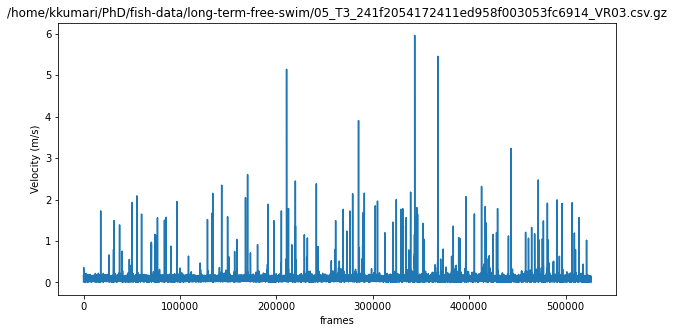

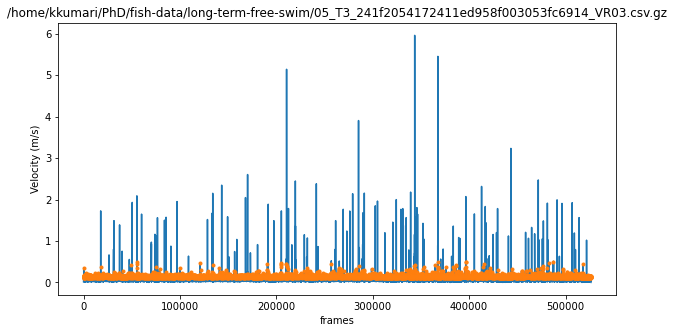

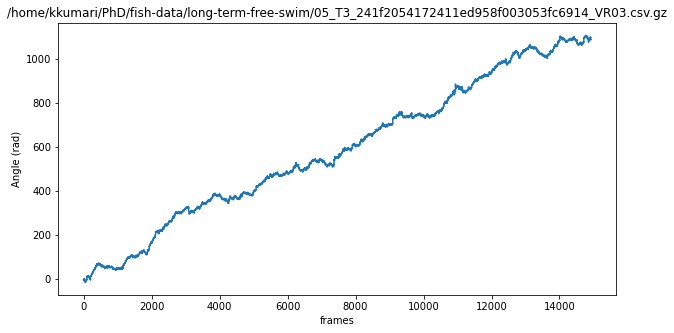

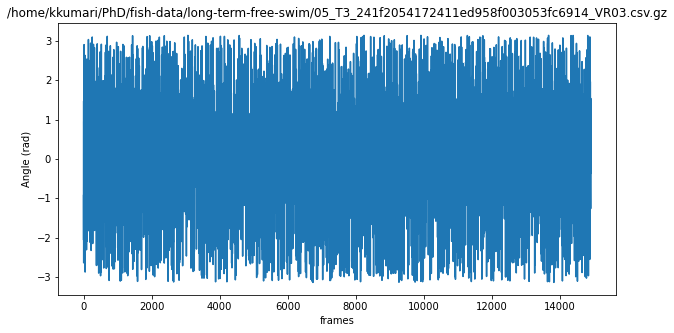

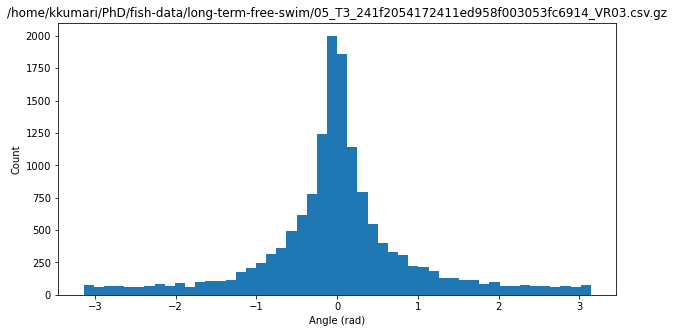

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/05_T3_241f2054172411ed958f003053fc6914_VR03.csv.gz


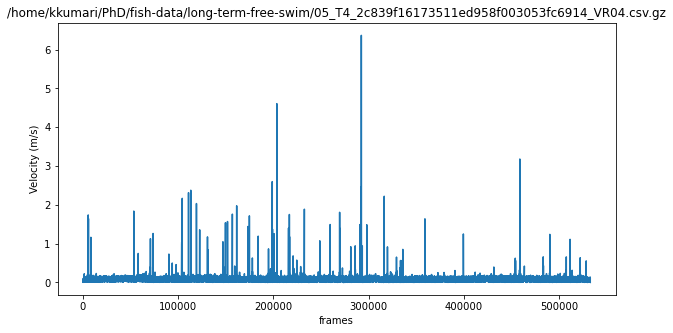

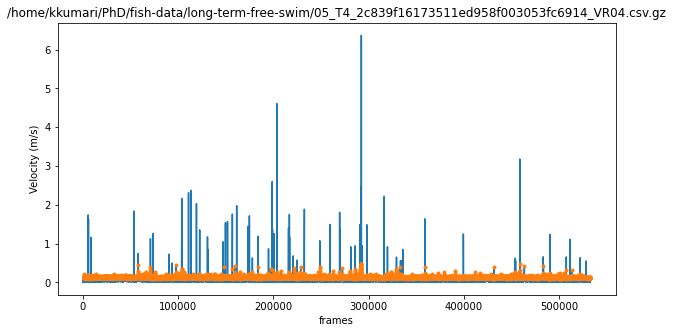

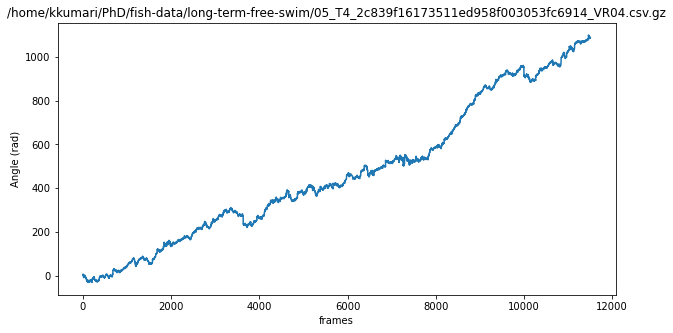

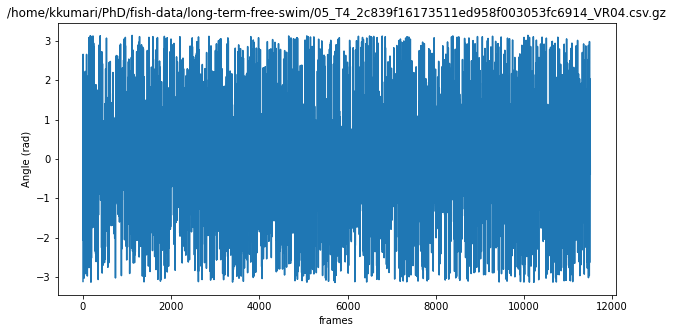

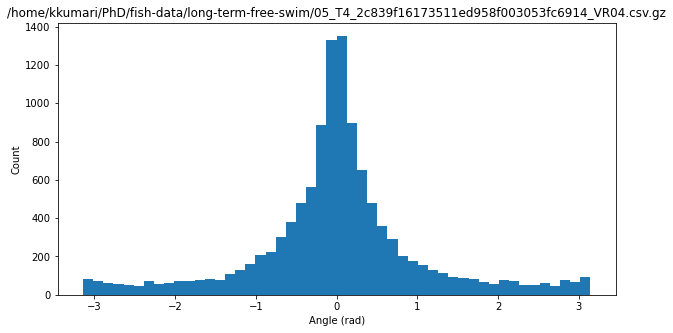

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/05_T4_2c839f16173511ed958f003053fc6914_VR04.csv.gz


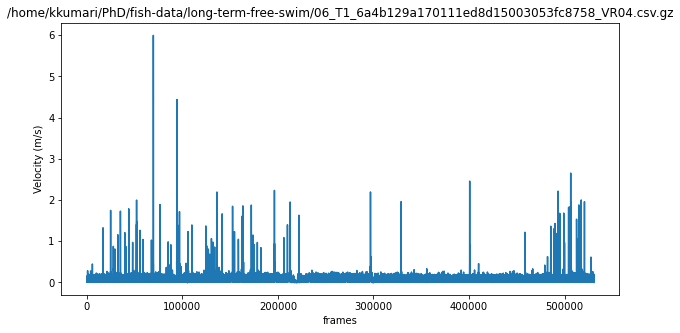

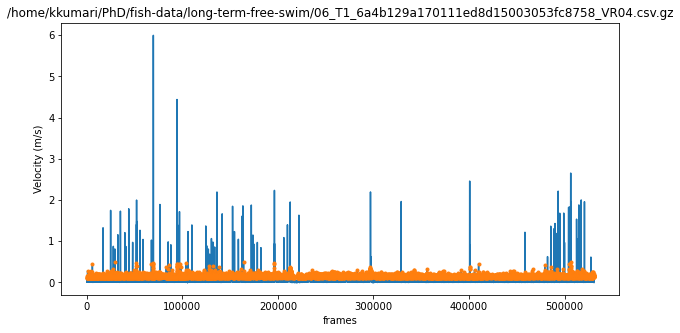

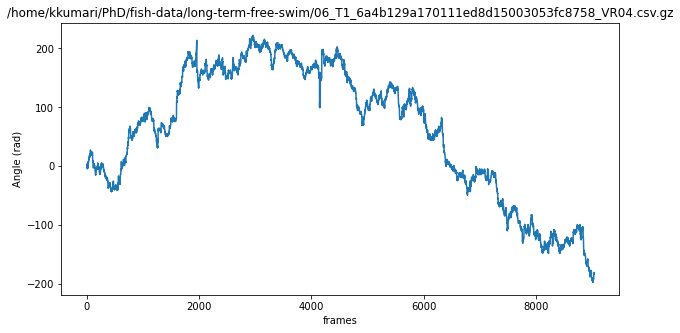

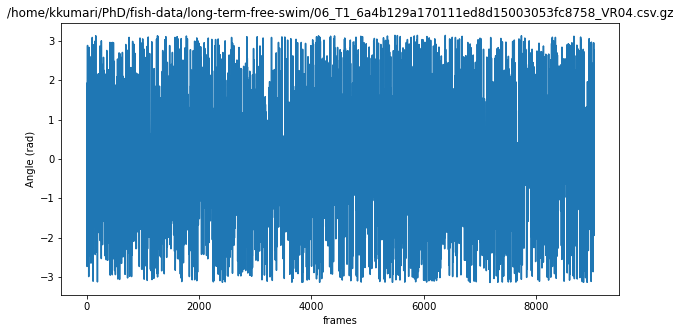

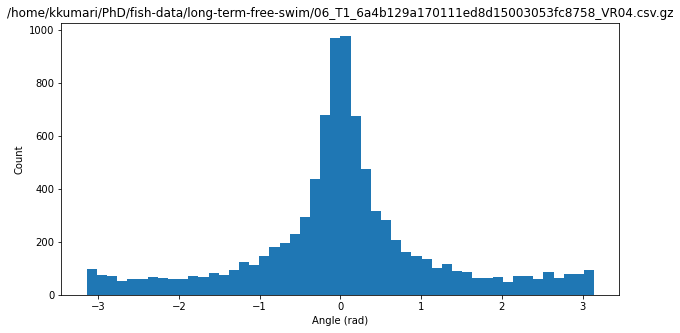

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/06_T1_6a4b129a170111ed8d15003053fc8758_VR04.csv.gz


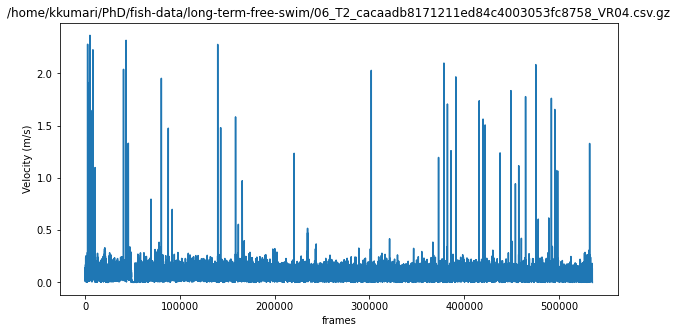

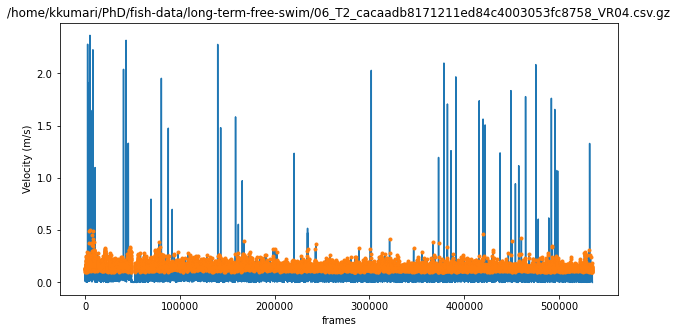

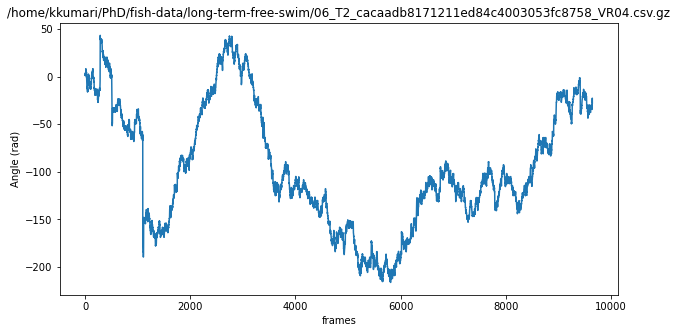

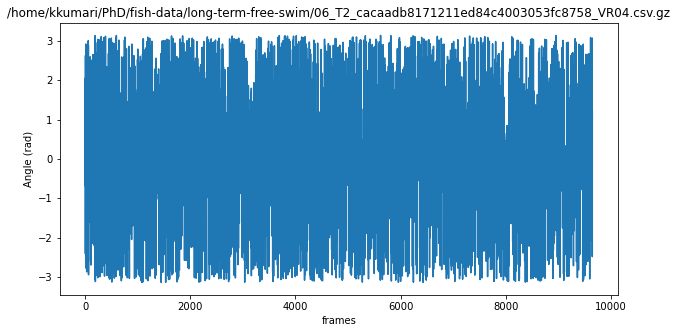

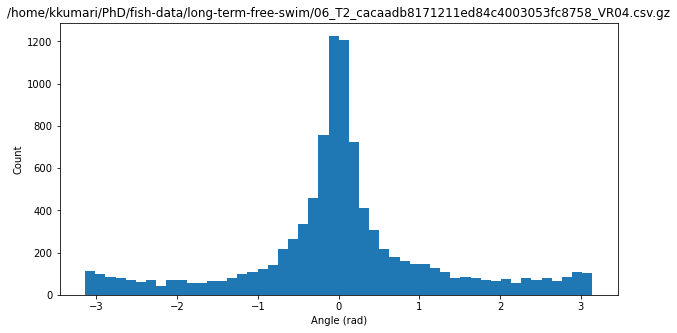

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/06_T2_cacaadb8171211ed84c4003053fc8758_VR04.csv.gz


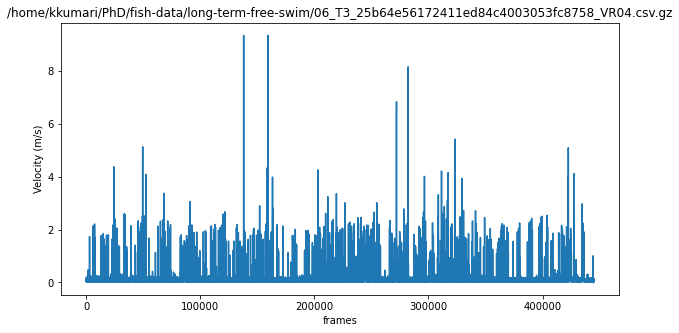

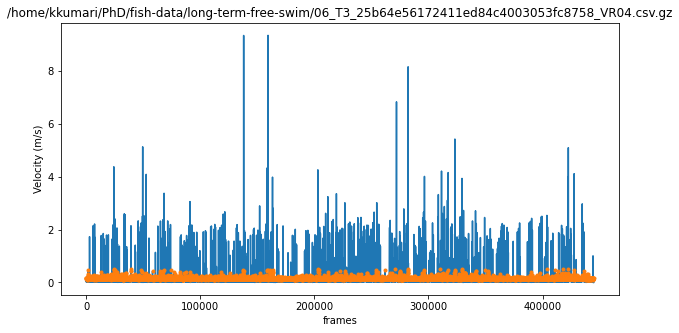

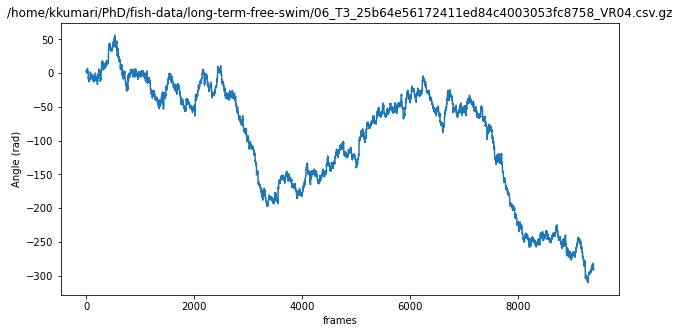

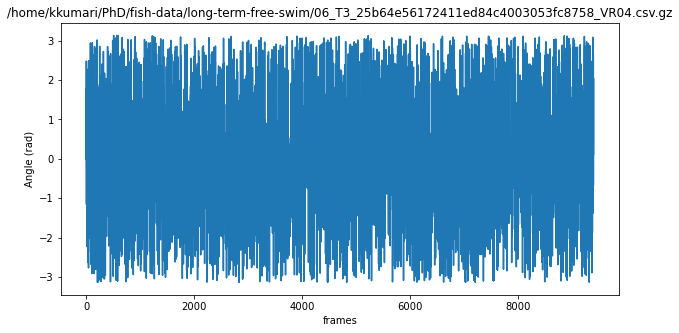

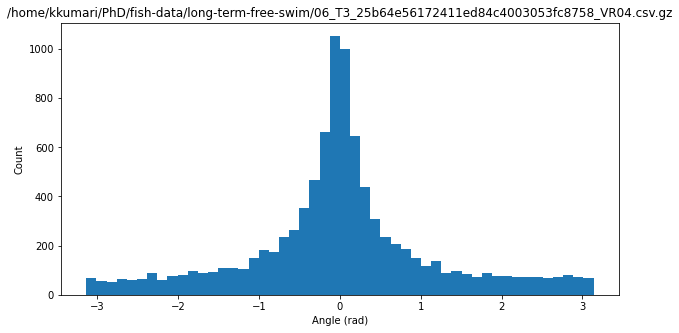

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/06_T3_25b64e56172411ed84c4003053fc8758_VR04.csv.gz


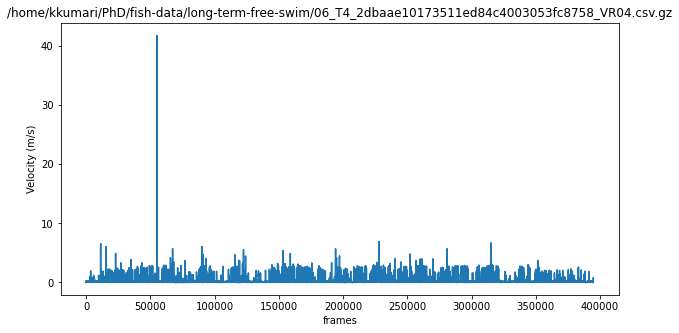

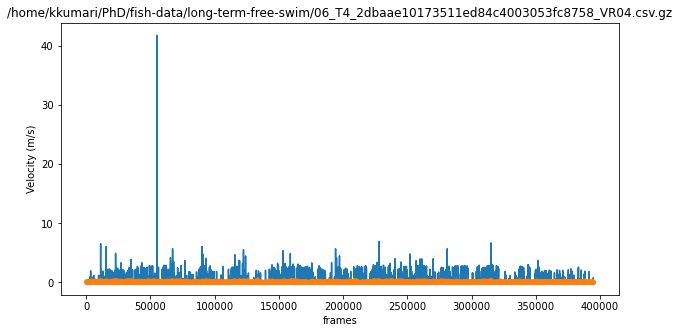

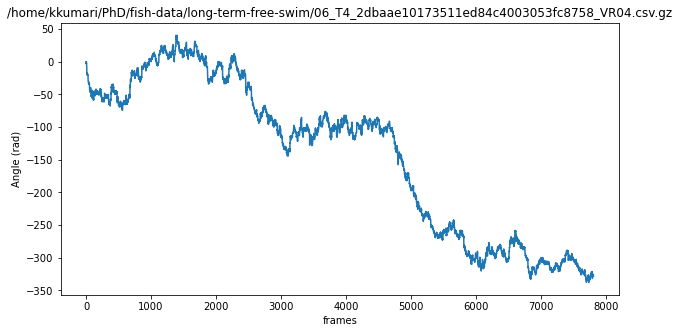

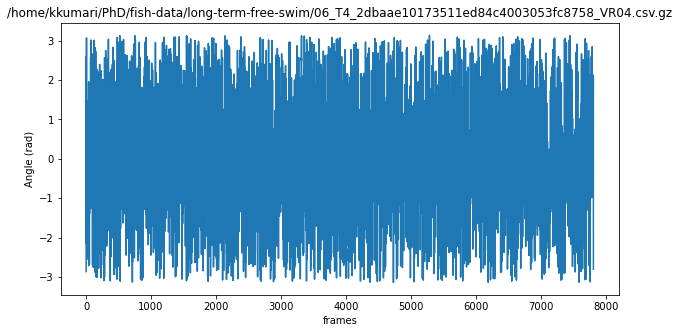

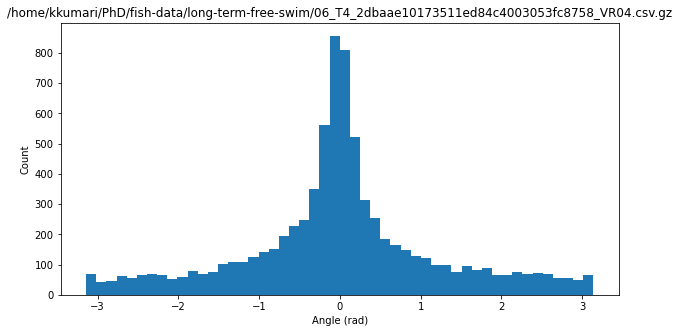

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/06_T4_2dbaae10173511ed84c4003053fc8758_VR04.csv.gz


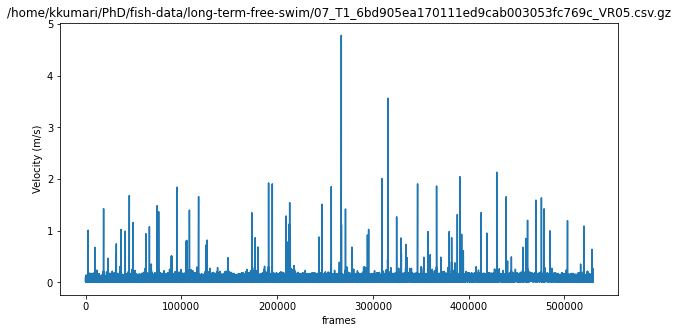

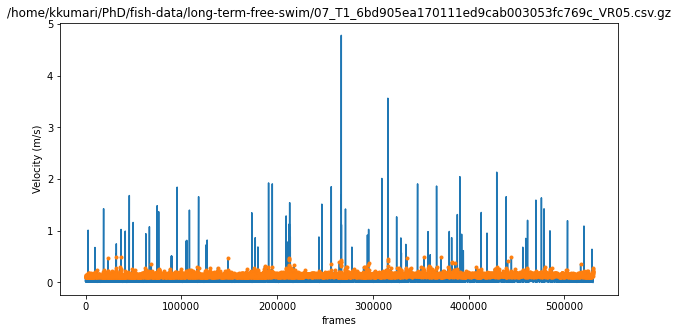

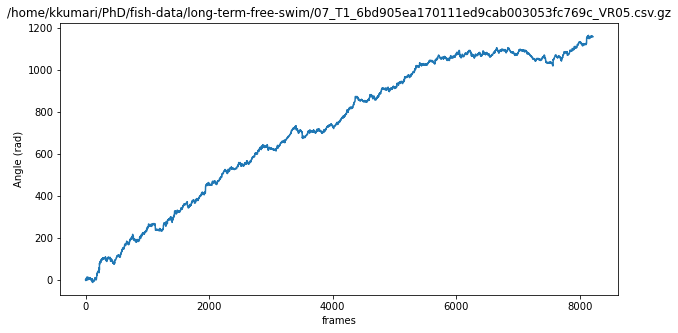

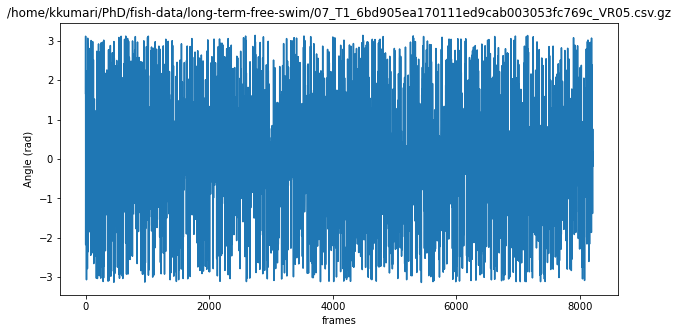

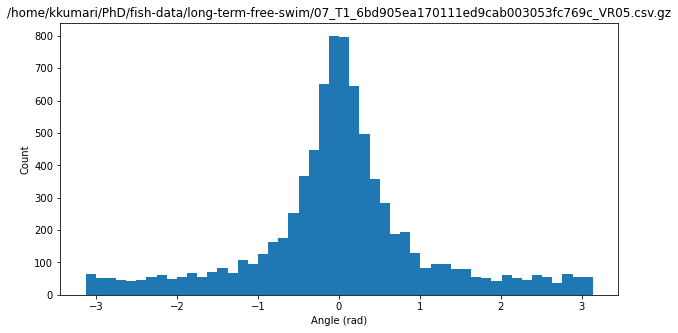

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/07_T1_6bd905ea170111ed9cab003053fc769c_VR05.csv.gz


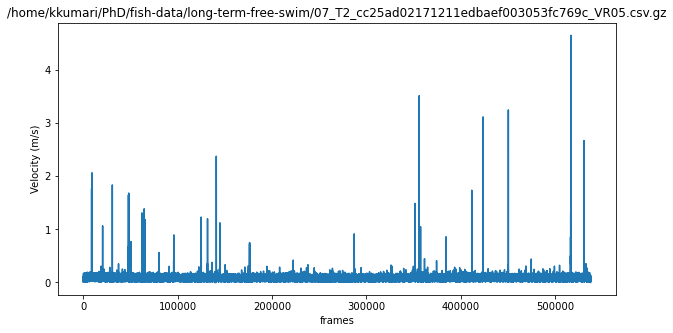

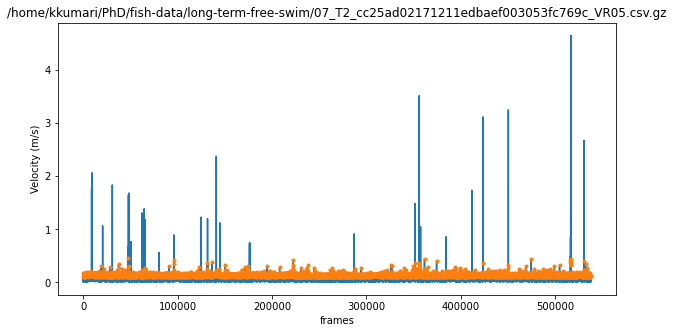

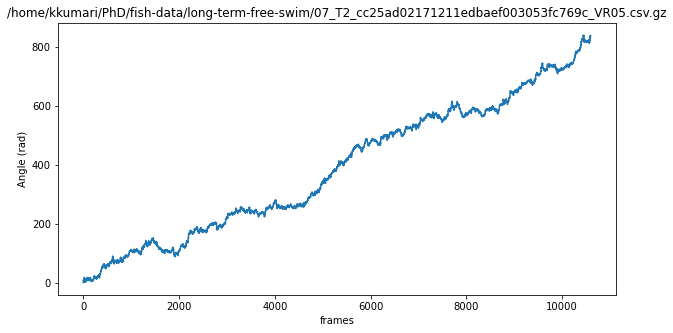

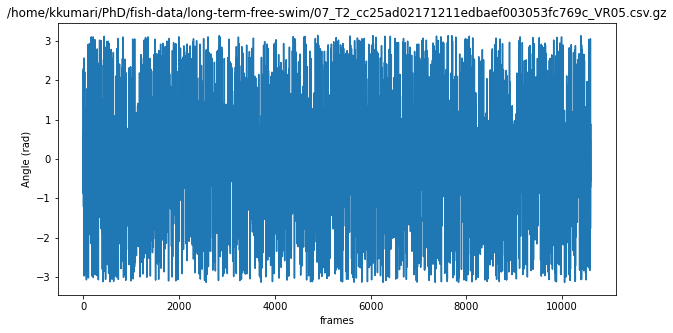

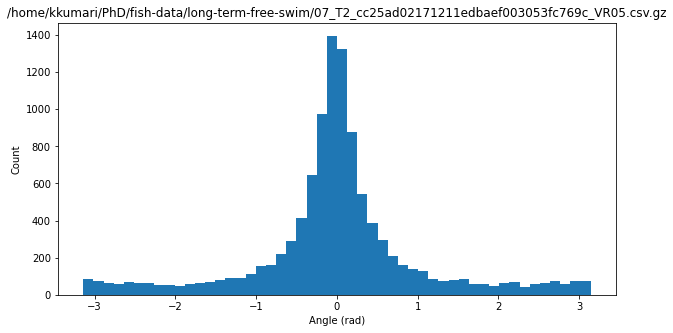

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/07_T2_cc25ad02171211edbaef003053fc769c_VR05.csv.gz


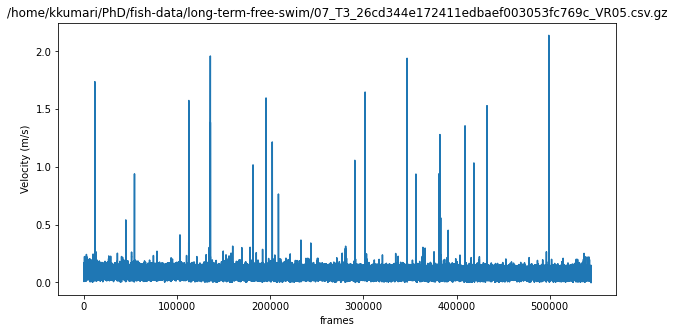

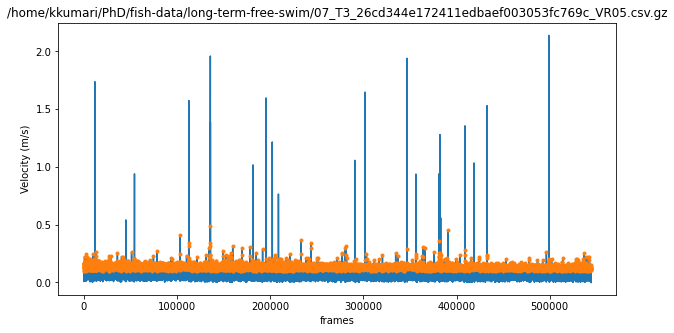

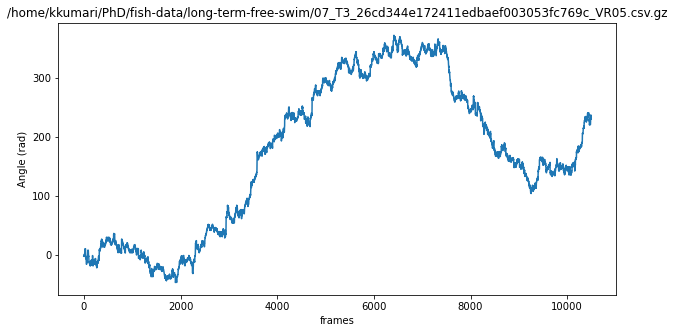

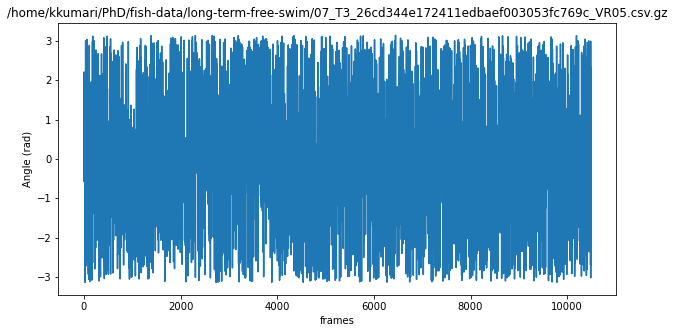

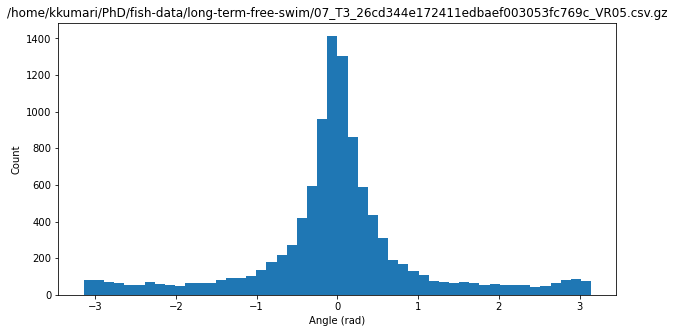

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/07_T3_26cd344e172411edbaef003053fc769c_VR05.csv.gz


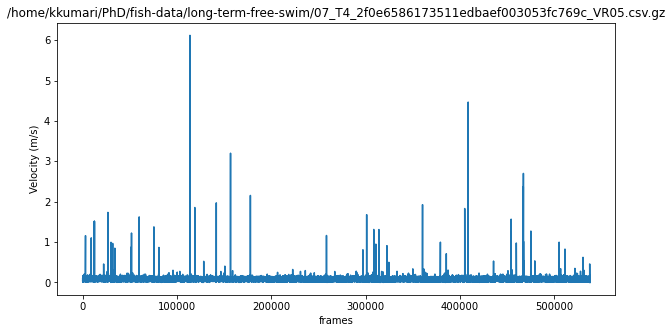

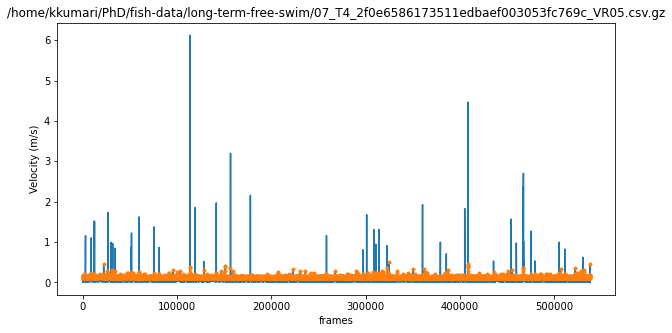

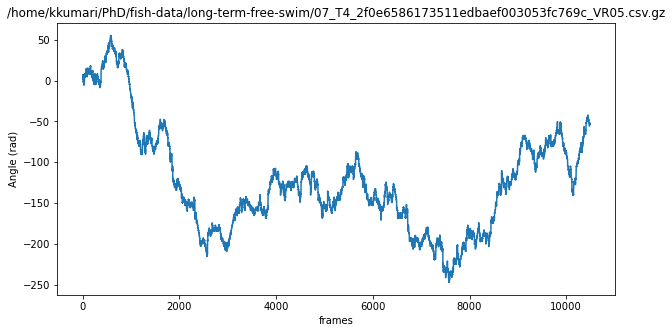

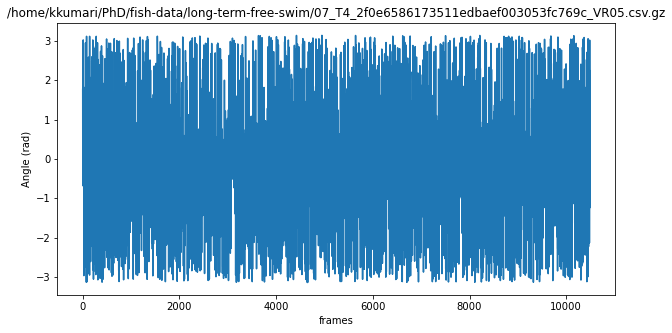

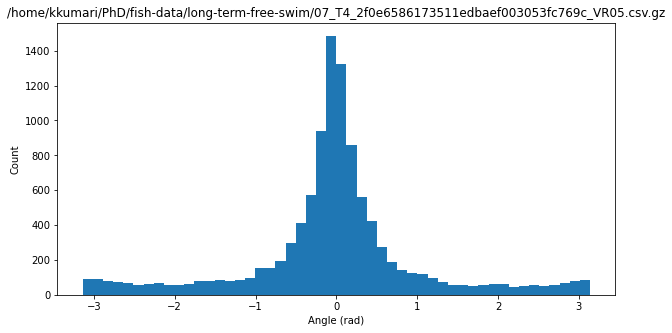

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/07_T4_2f0e6586173511edbaef003053fc769c_VR05.csv.gz


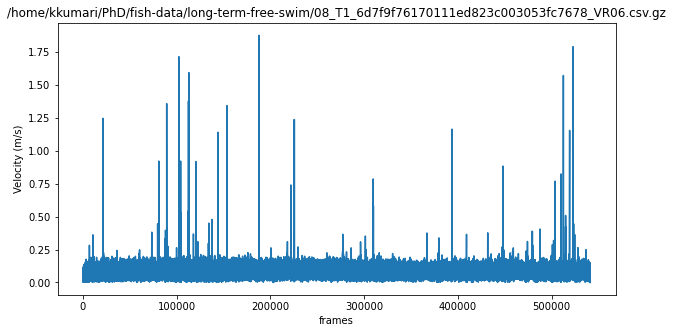

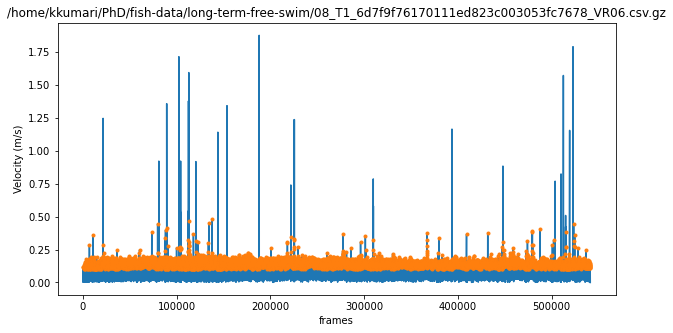

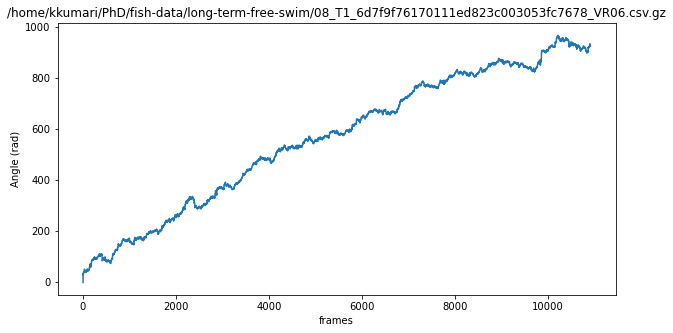

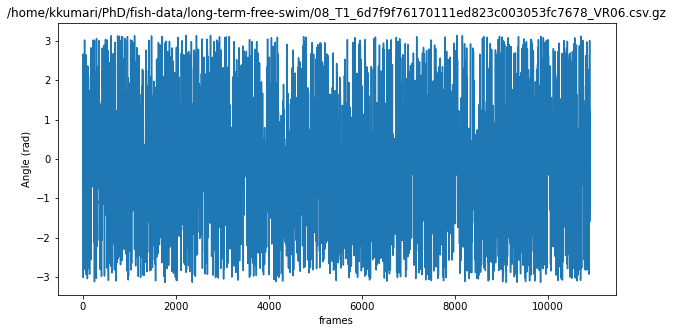

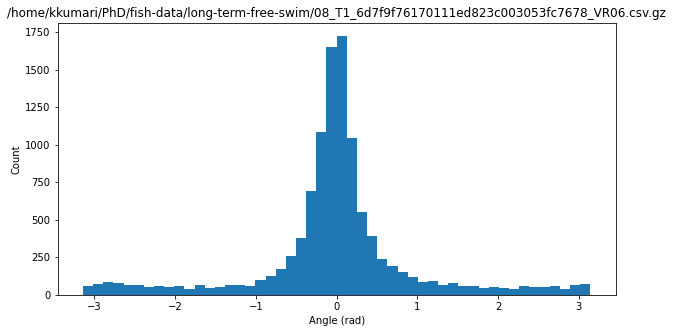

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/08_T1_6d7f9f76170111ed823c003053fc7678_VR06.csv.gz


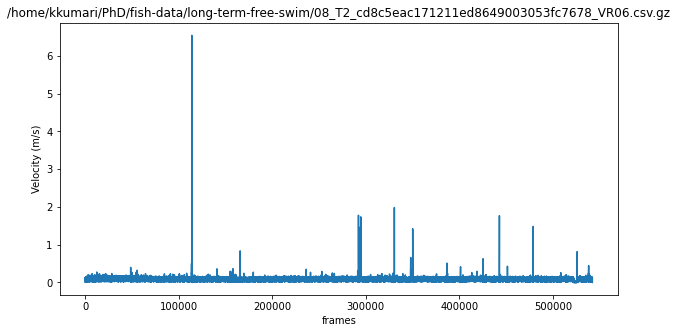

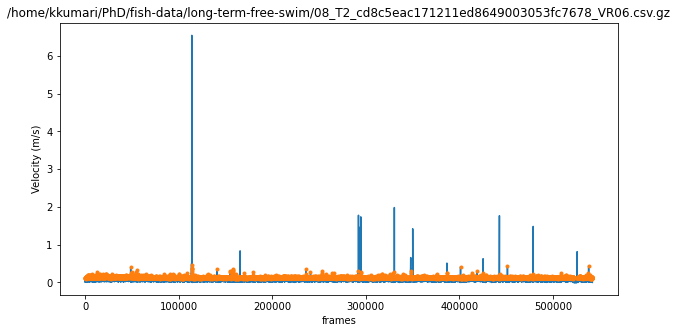

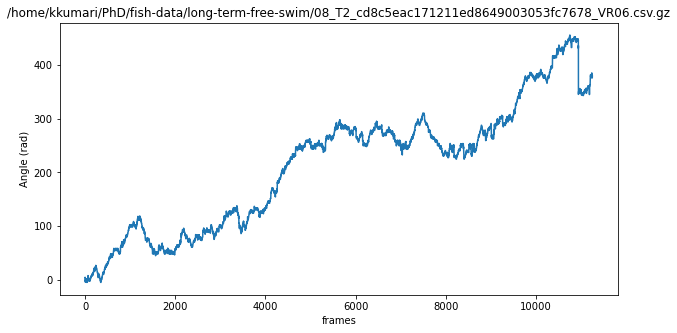

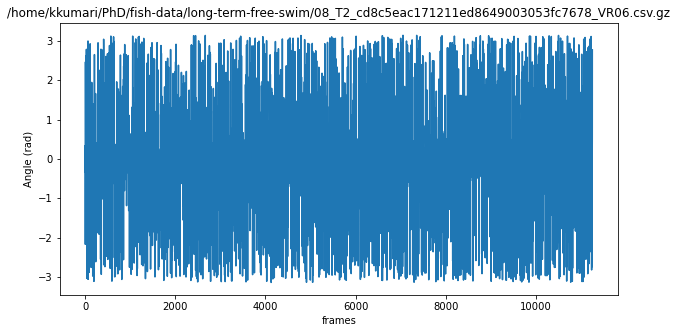

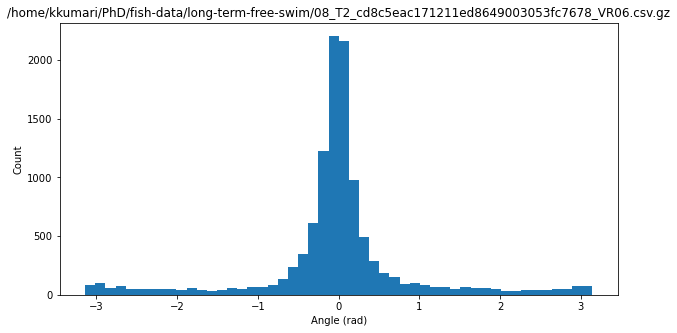

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/08_T2_cd8c5eac171211ed8649003053fc7678_VR06.csv.gz


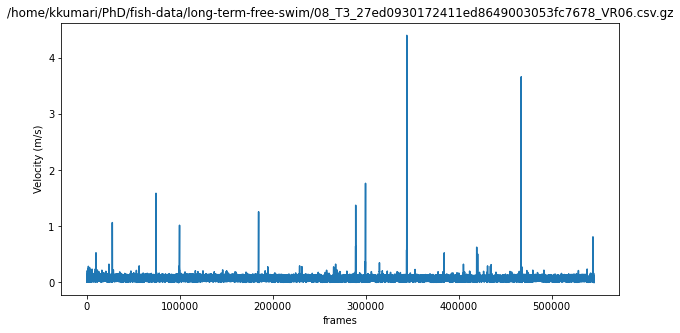

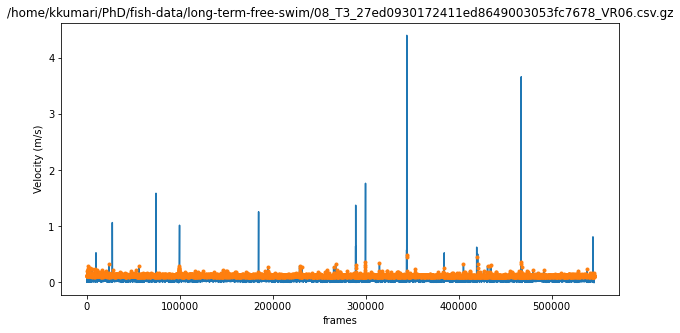

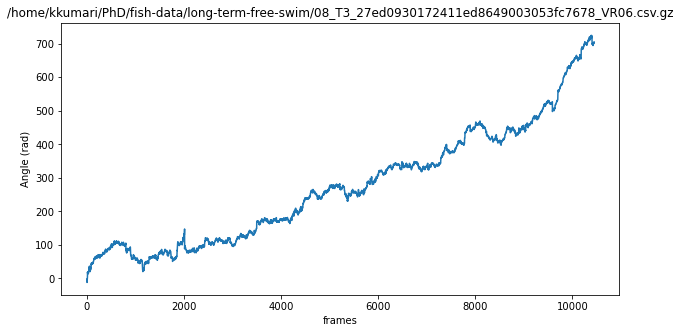

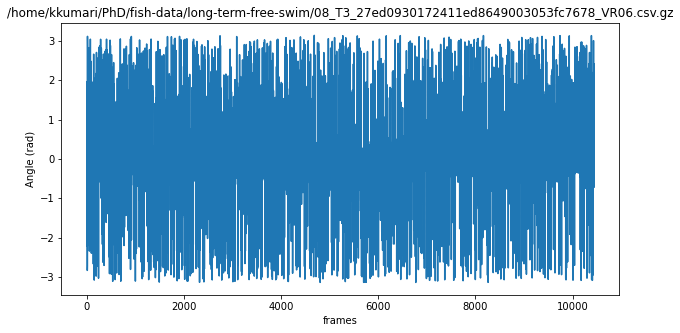

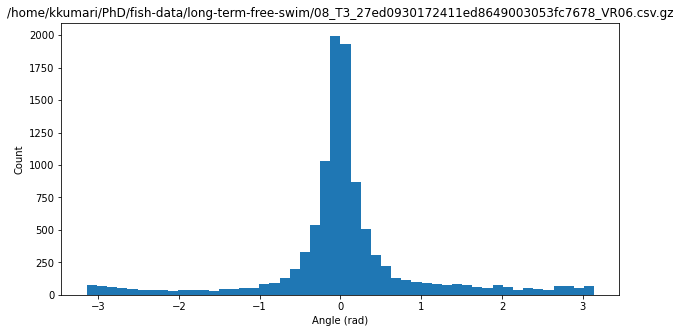

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/08_T3_27ed0930172411ed8649003053fc7678_VR06.csv.gz


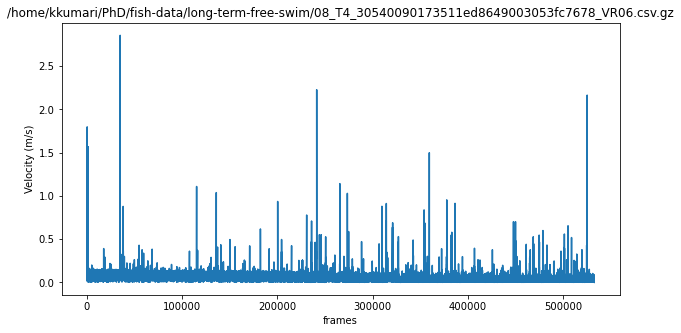

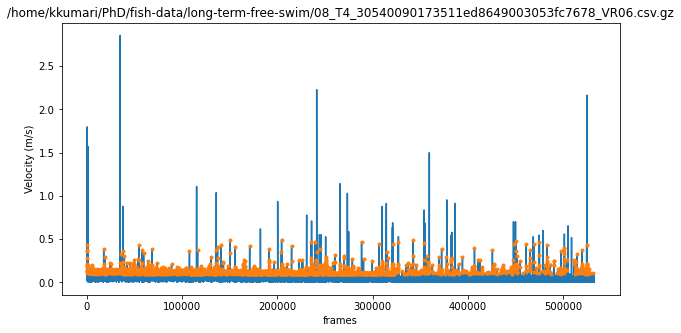

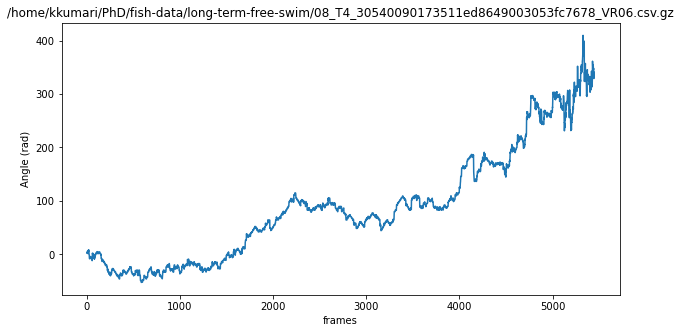

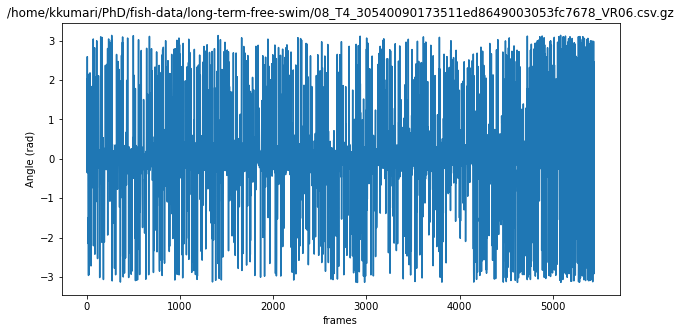

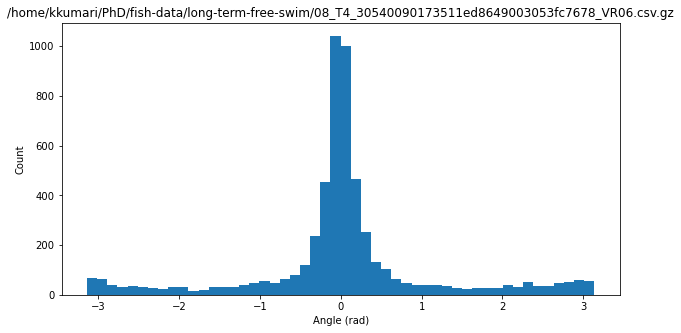

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/08_T4_30540090173511ed8649003053fc7678_VR06.csv.gz


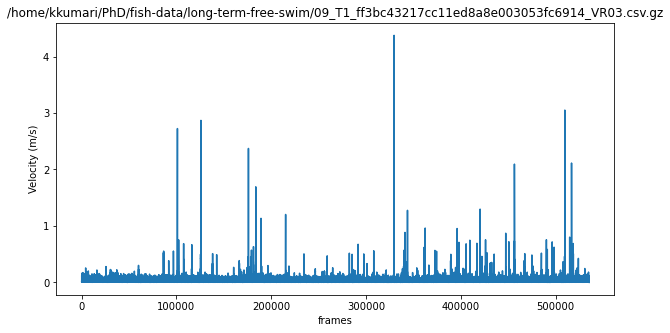

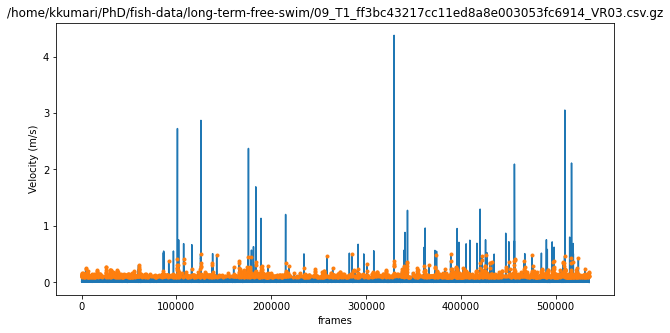

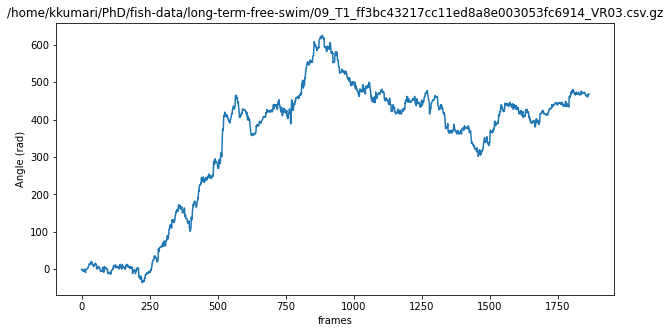

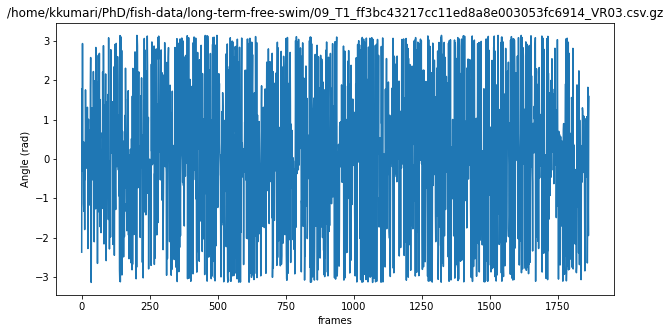

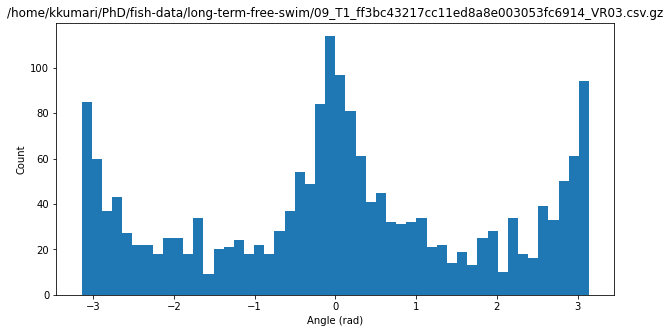

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/09_T1_ff3bc43217cc11ed8a8e003053fc6914_VR03.csv.gz


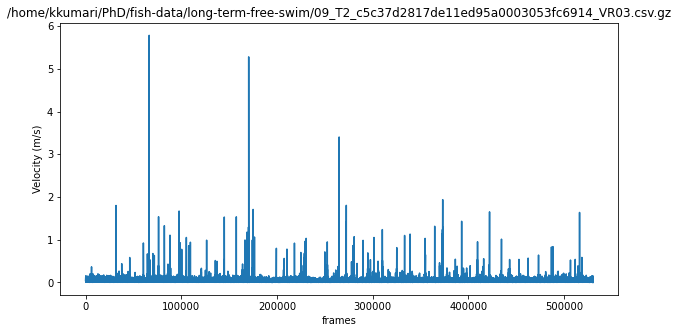

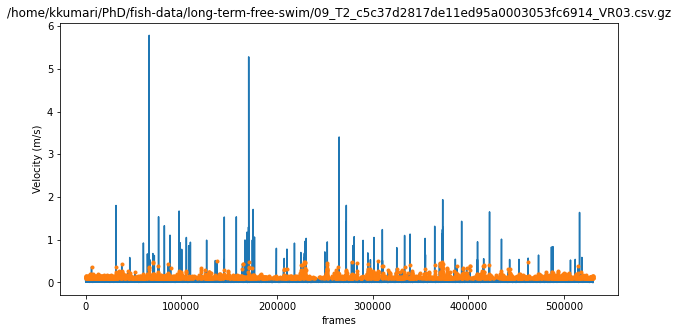

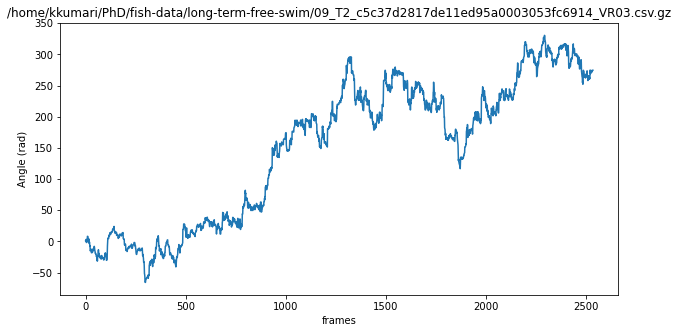

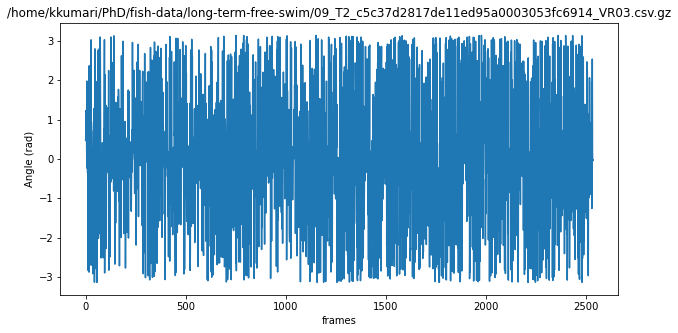

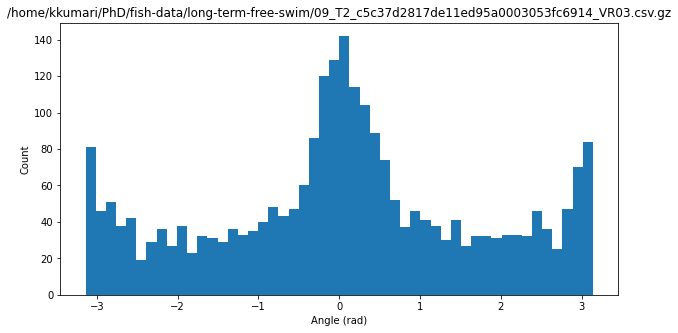

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/09_T2_c5c37d2817de11ed95a0003053fc6914_VR03.csv.gz


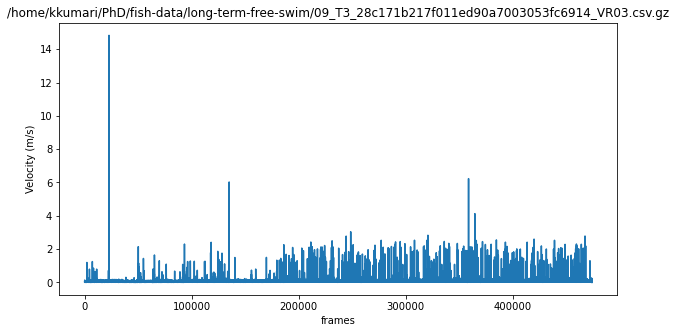

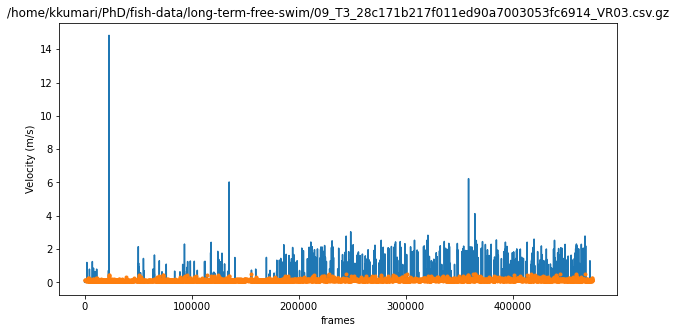

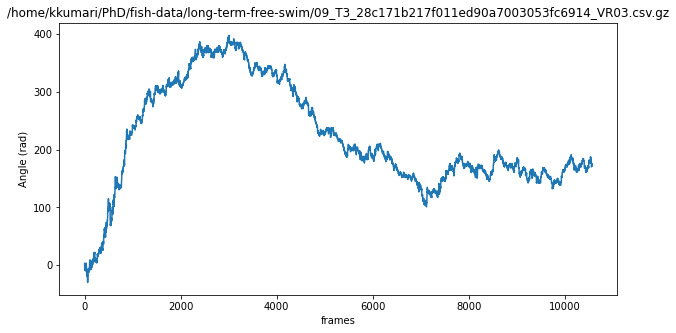

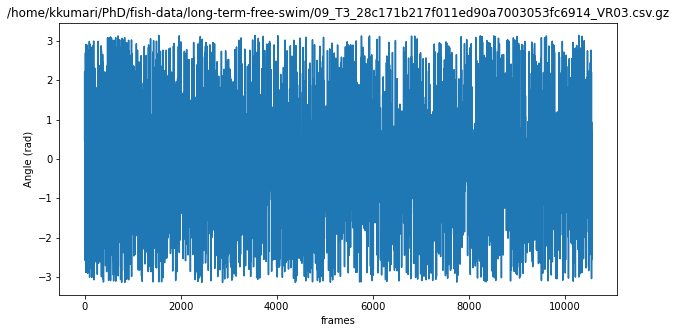

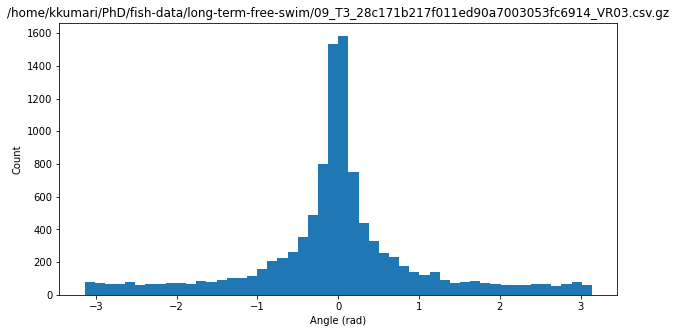

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/09_T3_28c171b217f011ed90a7003053fc6914_VR03.csv.gz


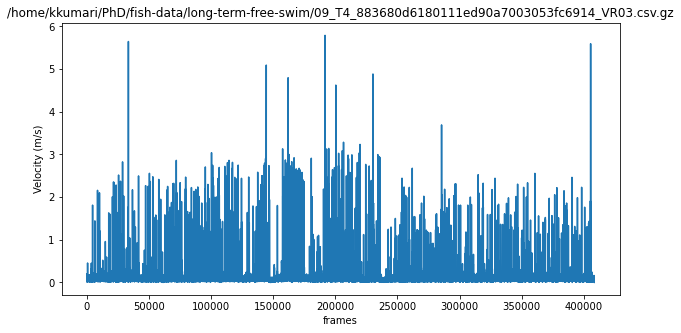

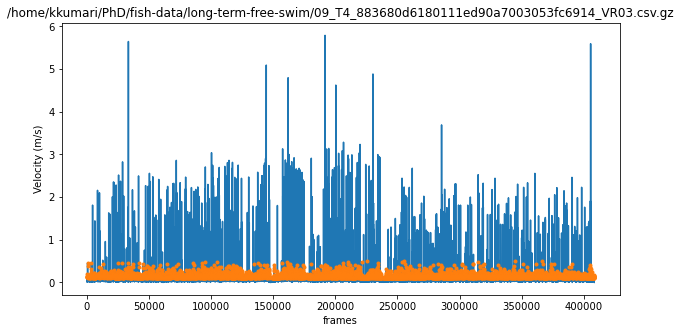

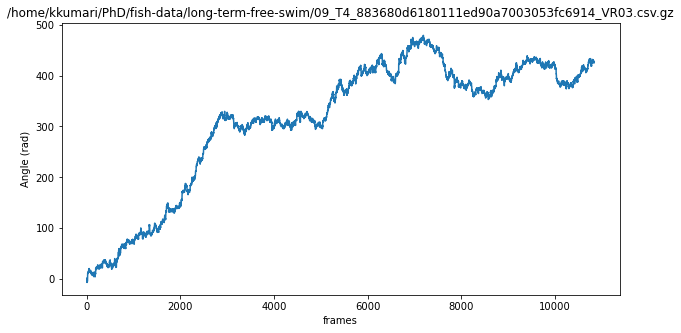

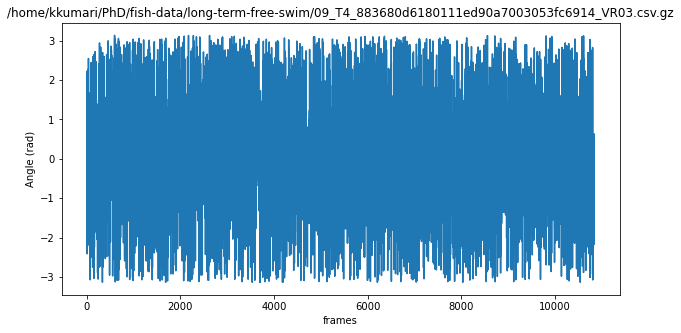

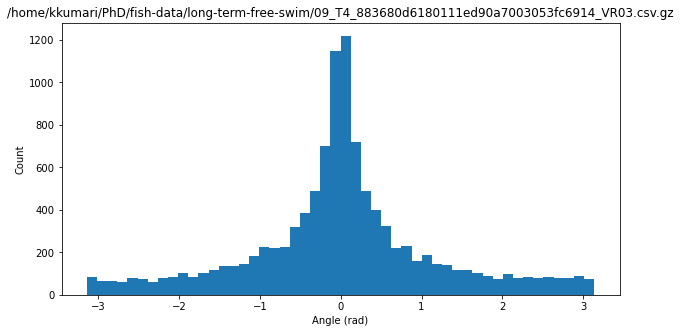

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/09_T4_883680d6180111ed90a7003053fc6914_VR03.csv.gz


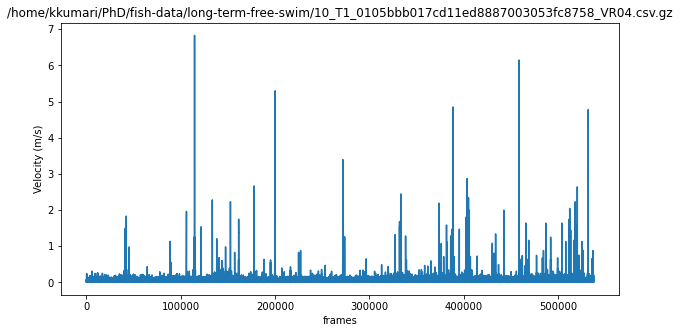

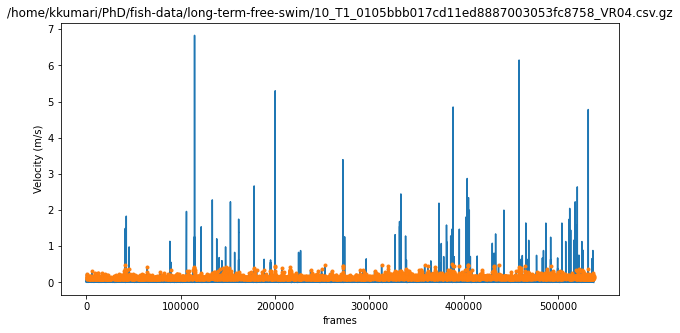

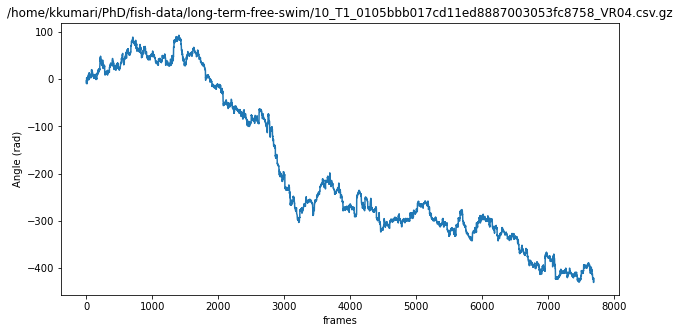

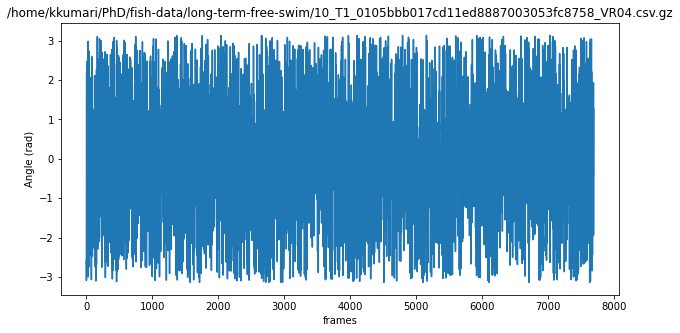

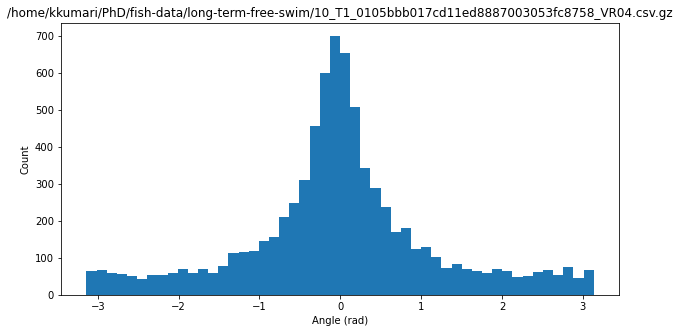

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/10_T1_0105bbb017cd11ed8887003053fc8758_VR04.csv.gz


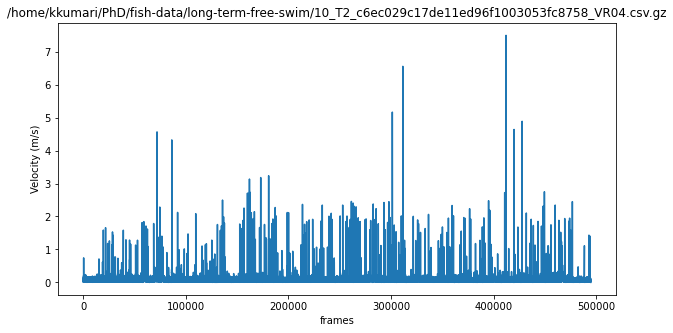

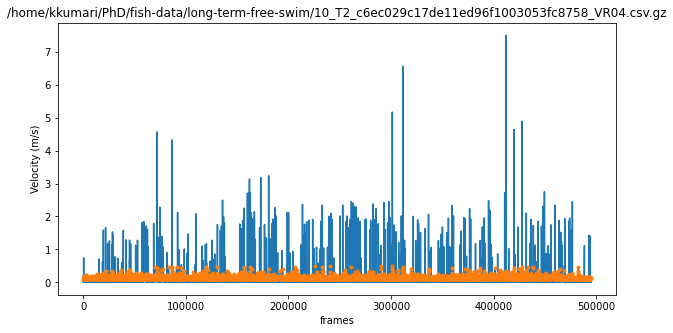

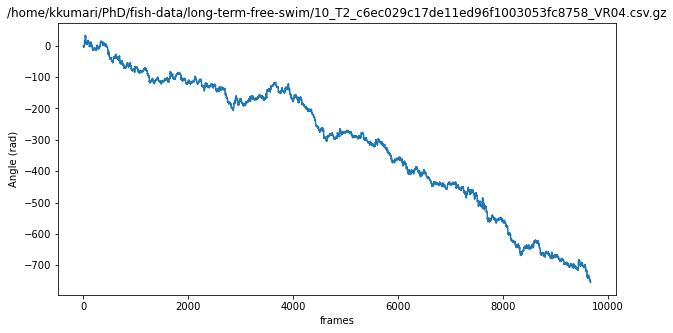

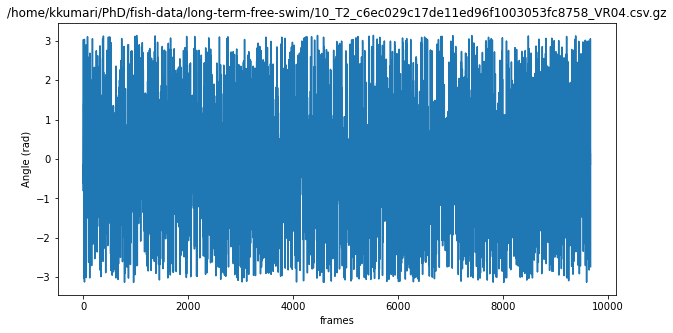

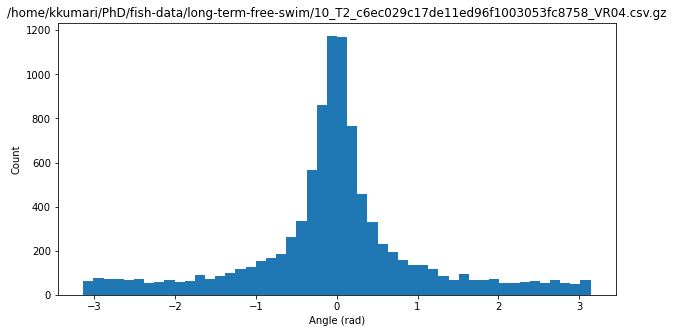

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/10_T2_c6ec029c17de11ed96f1003053fc8758_VR04.csv.gz


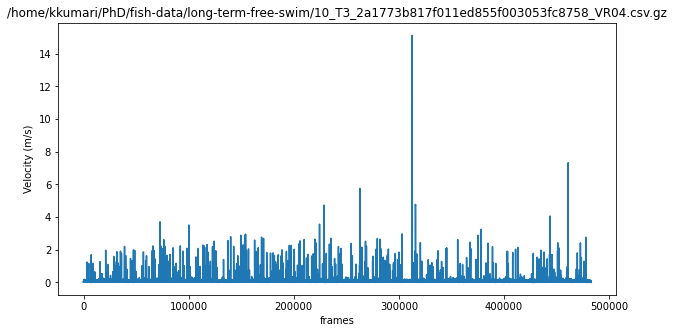

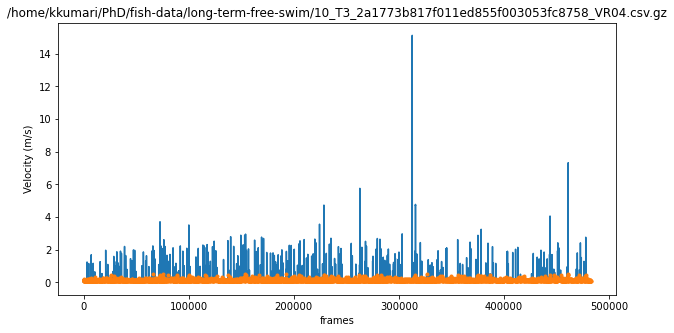

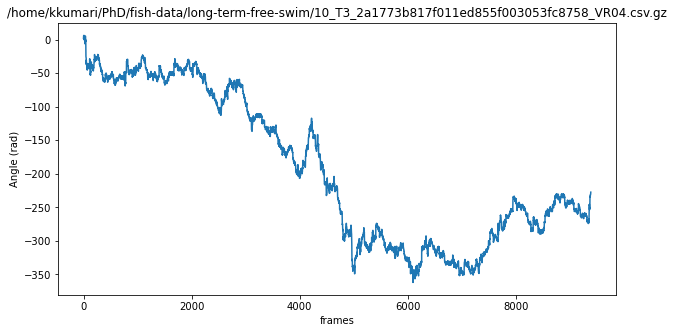

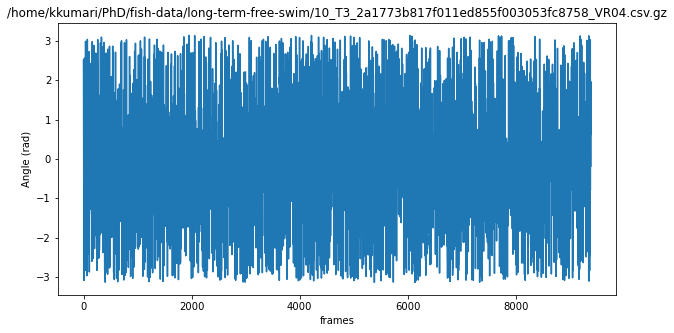

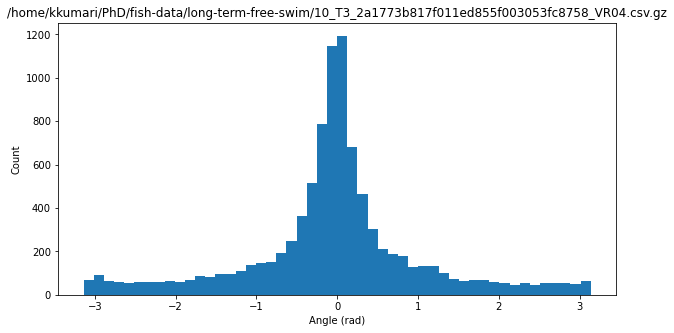

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/10_T3_2a1773b817f011ed855f003053fc8758_VR04.csv.gz


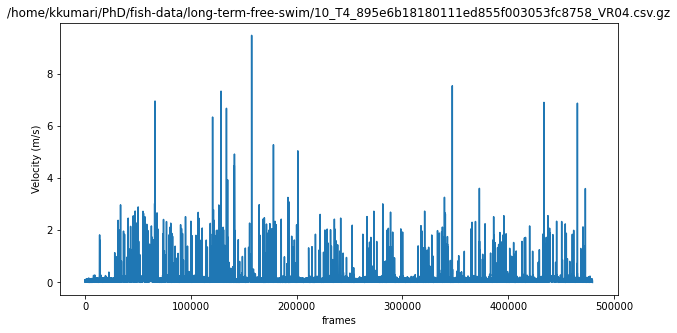

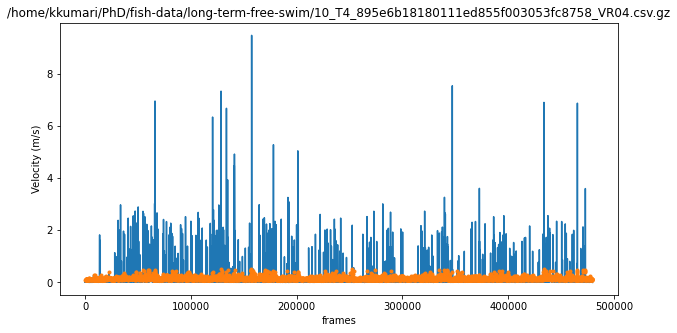

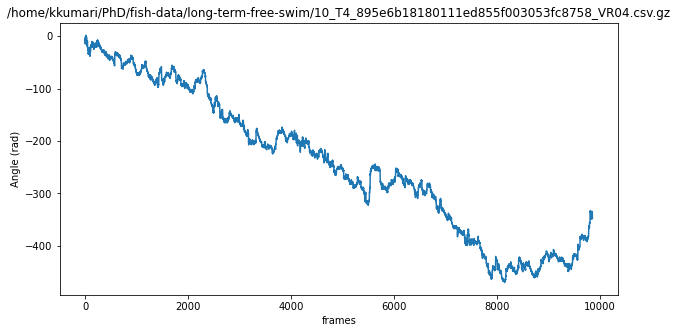

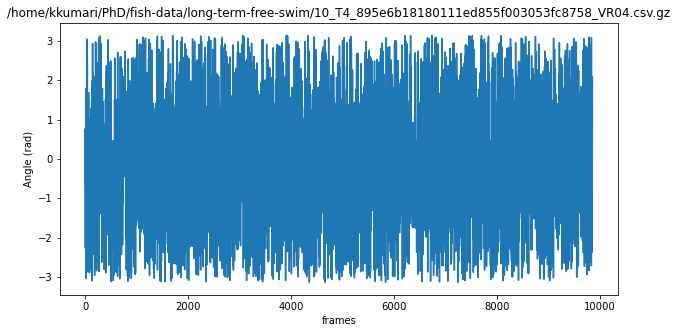

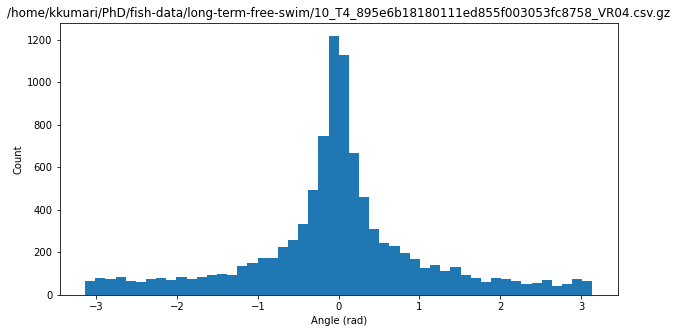

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/10_T4_895e6b18180111ed855f003053fc8758_VR04.csv.gz


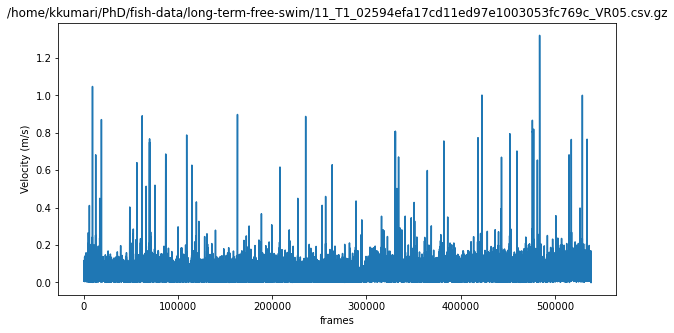

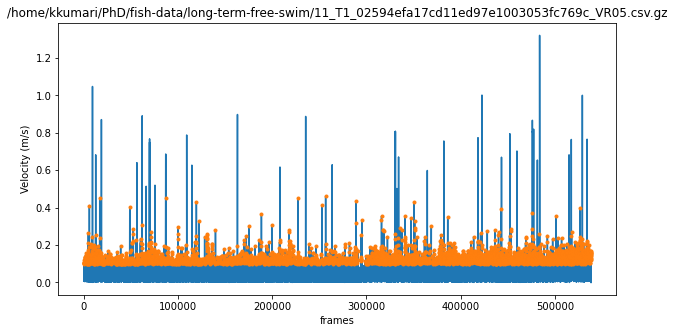

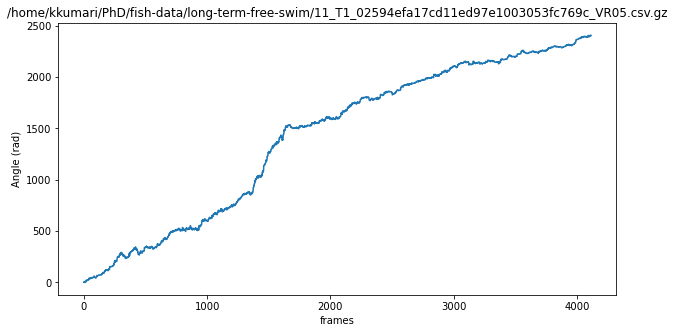

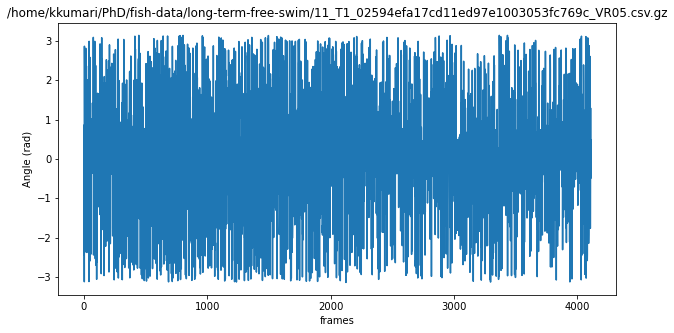

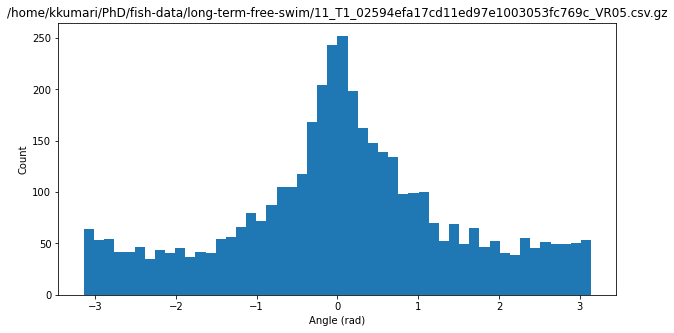

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/11_T1_02594efa17cd11ed97e1003053fc769c_VR05.csv.gz


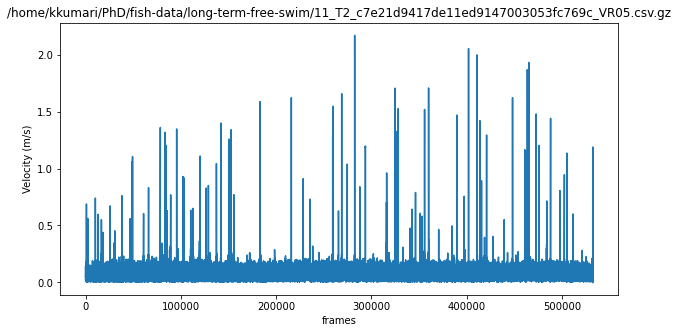

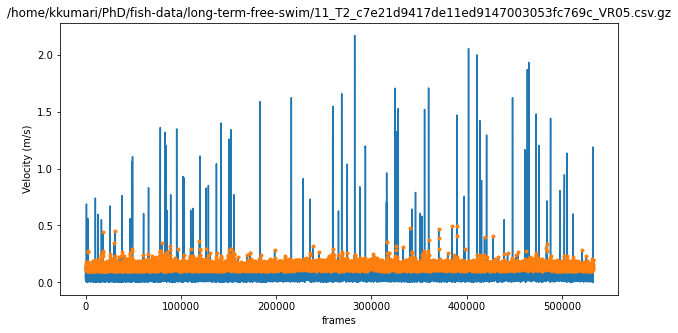

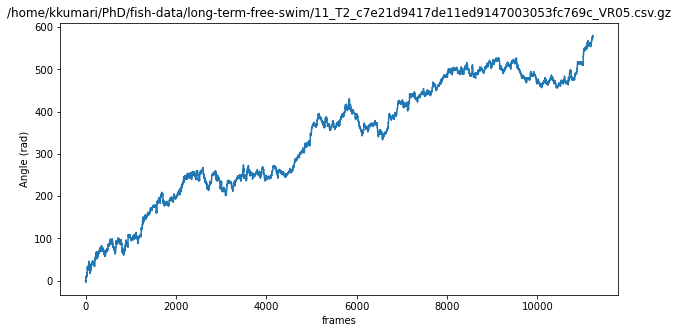

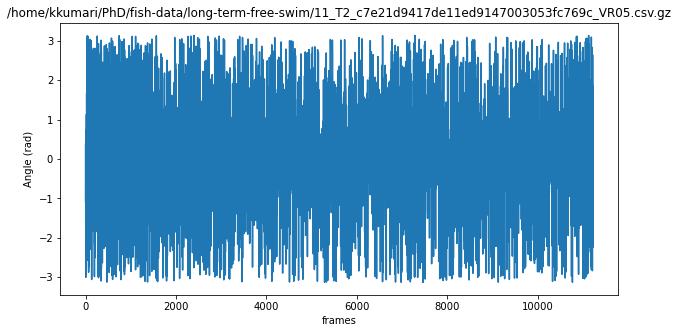

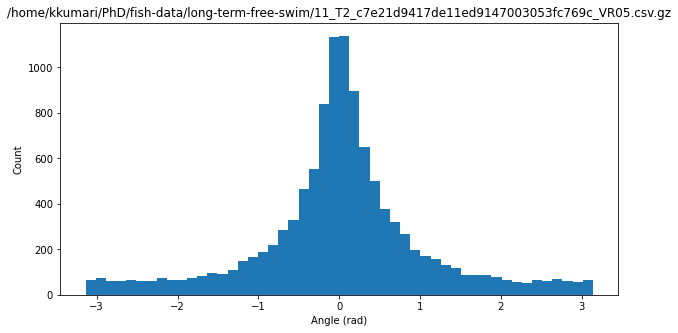

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/11_T2_c7e21d9417de11ed9147003053fc769c_VR05.csv.gz


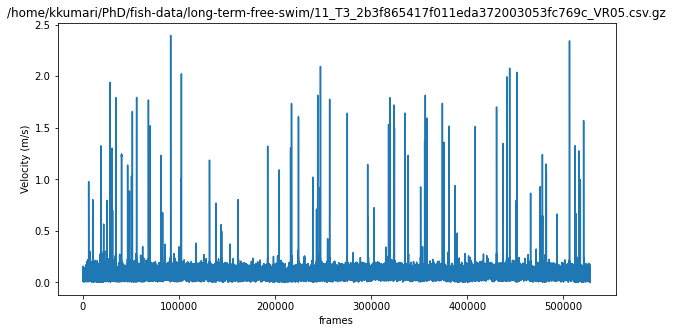

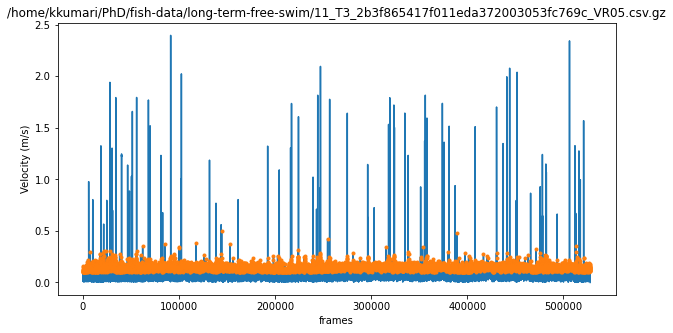

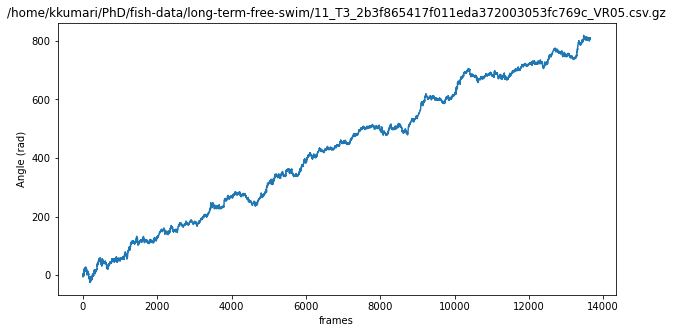

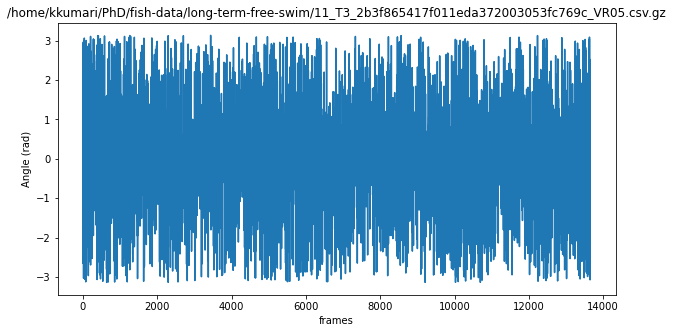

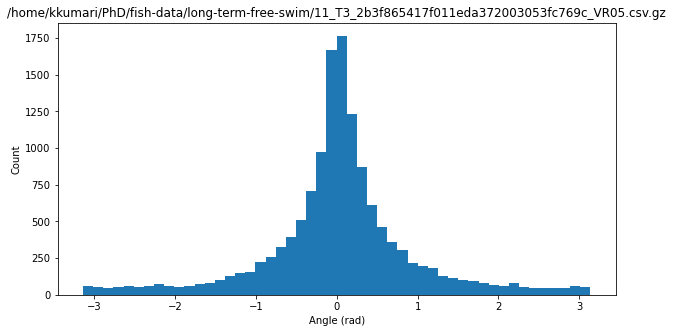

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/11_T3_2b3f865417f011eda372003053fc769c_VR05.csv.gz


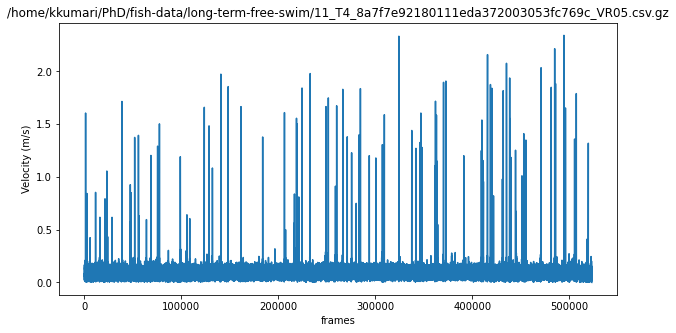

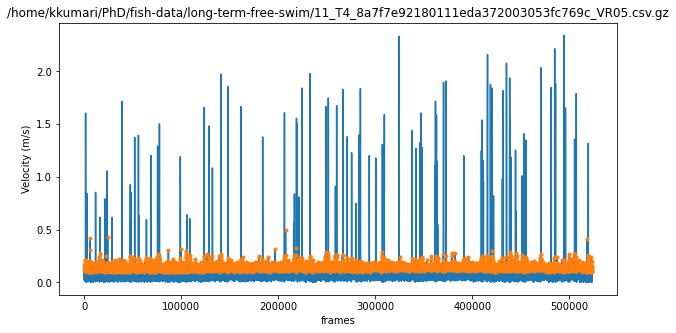

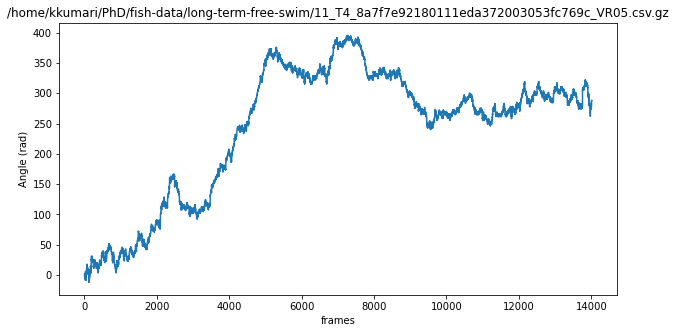

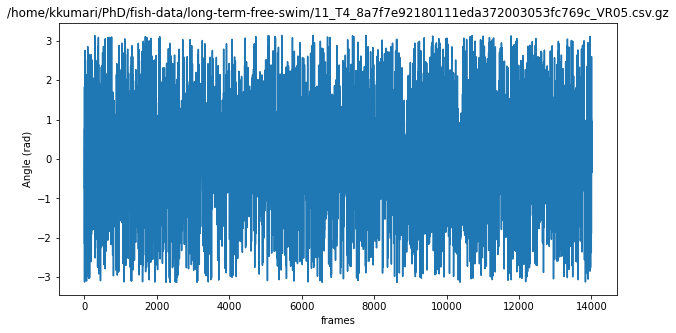

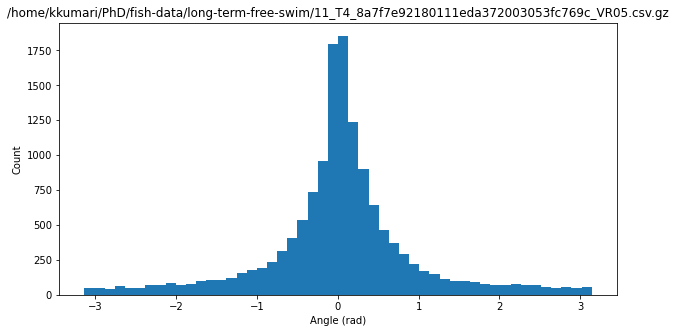

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/11_T4_8a7f7e92180111eda372003053fc769c_VR05.csv.gz


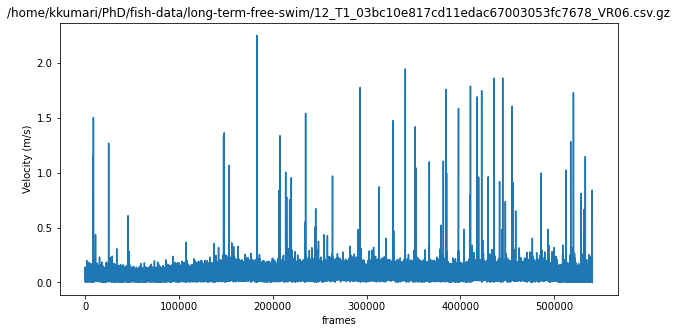

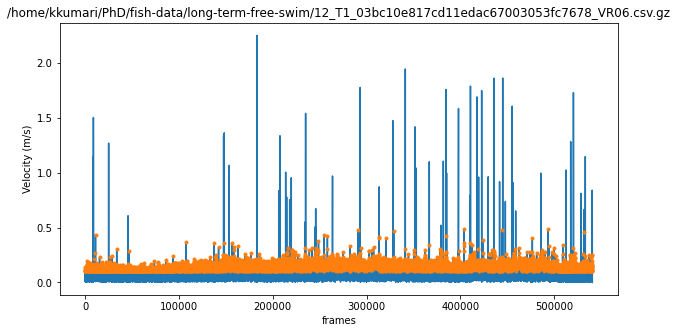

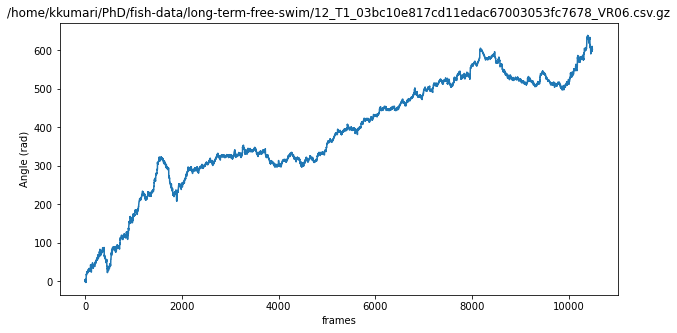

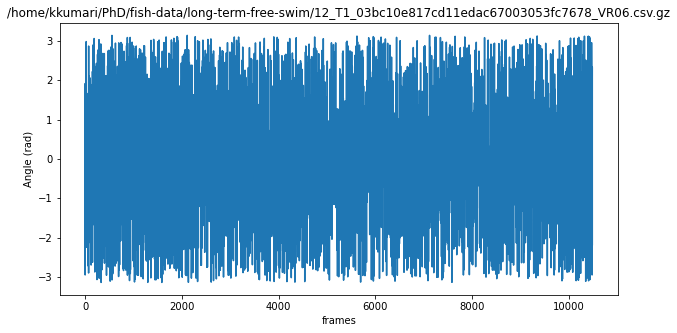

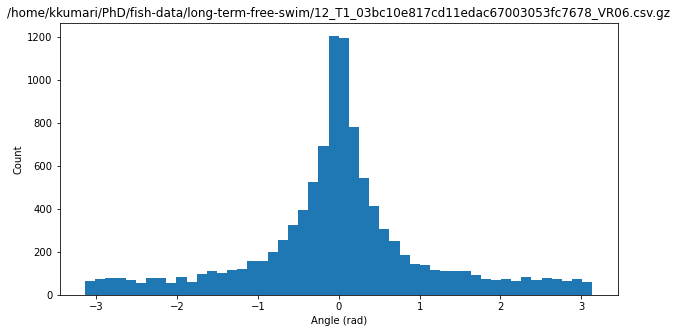

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/12_T1_03bc10e817cd11edac67003053fc7678_VR06.csv.gz


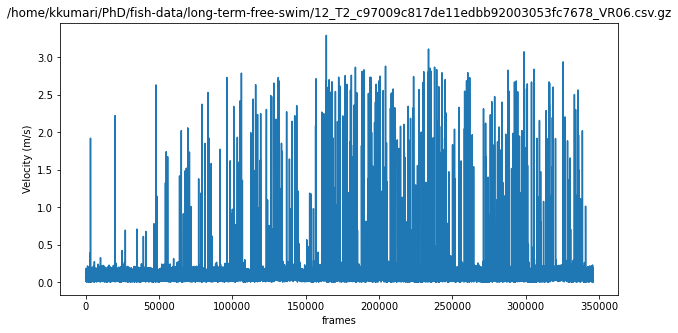

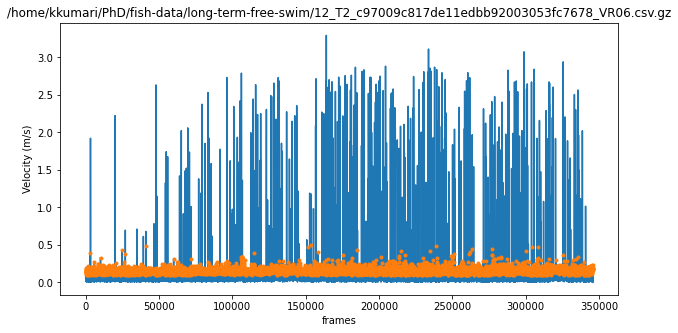

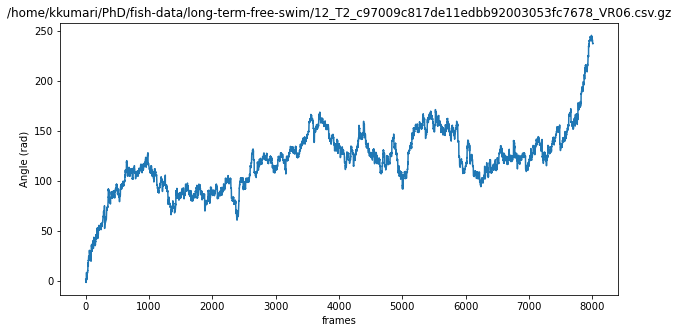

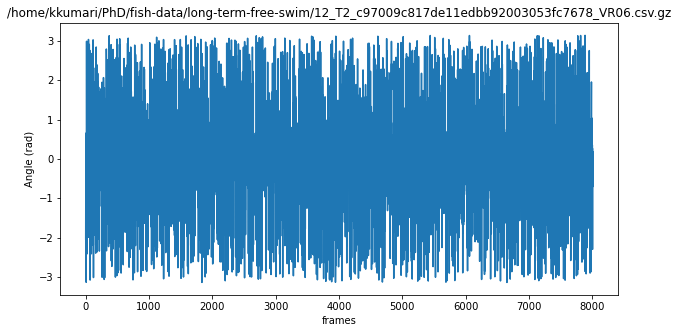

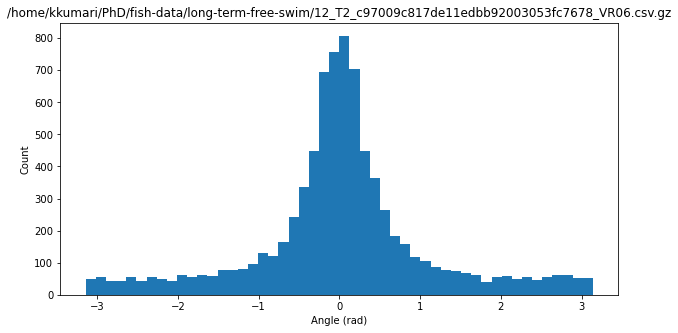

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/12_T2_c97009c817de11edbb92003053fc7678_VR06.csv.gz


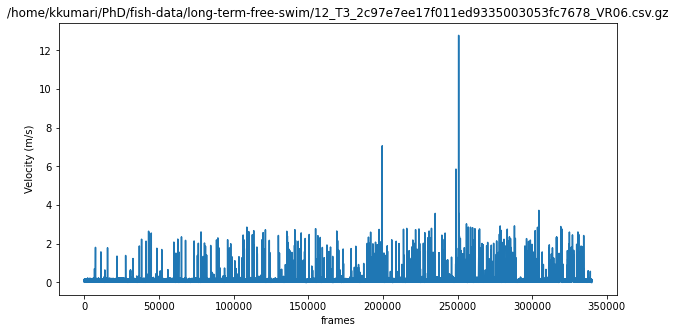

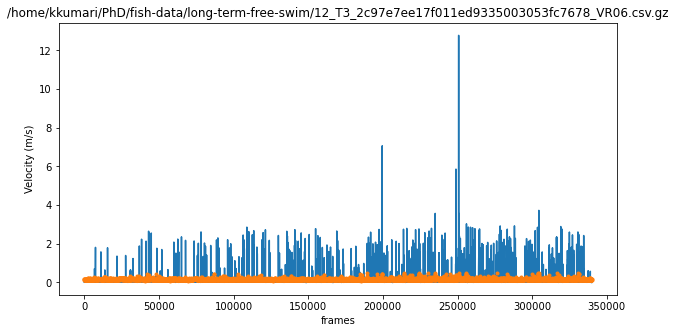

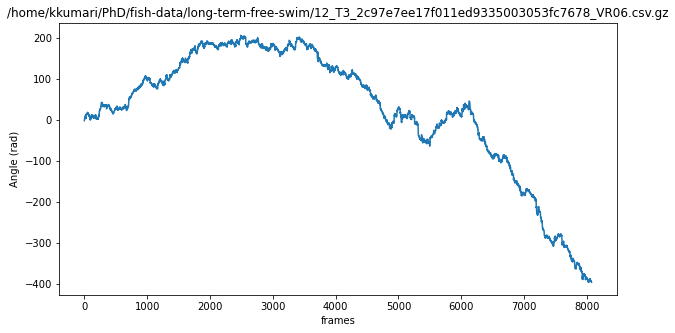

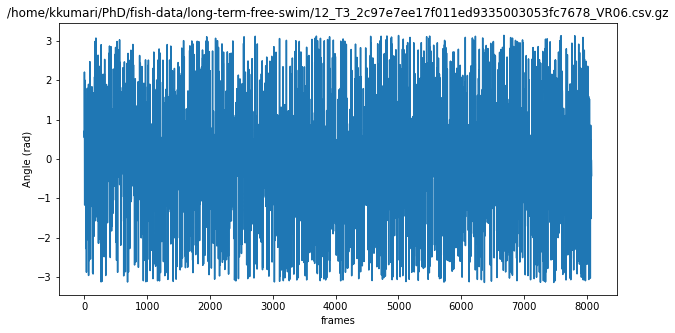

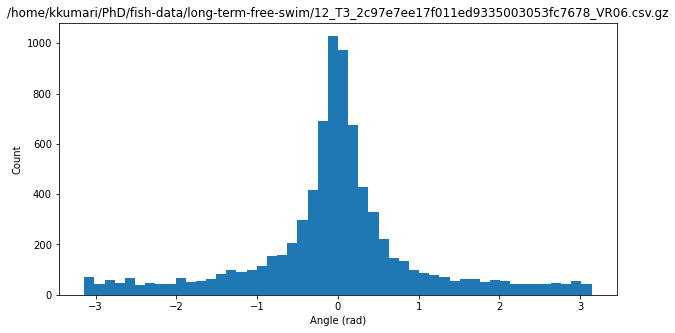

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/12_T3_2c97e7ee17f011ed9335003053fc7678_VR06.csv.gz


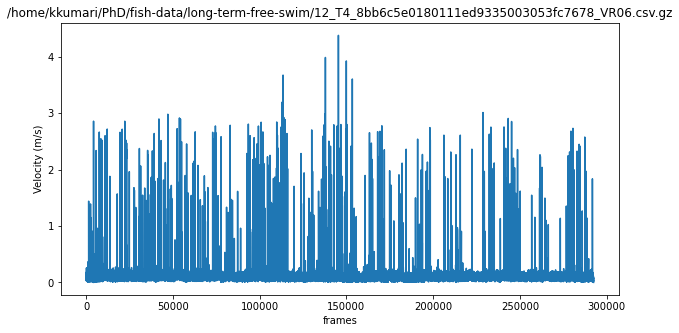

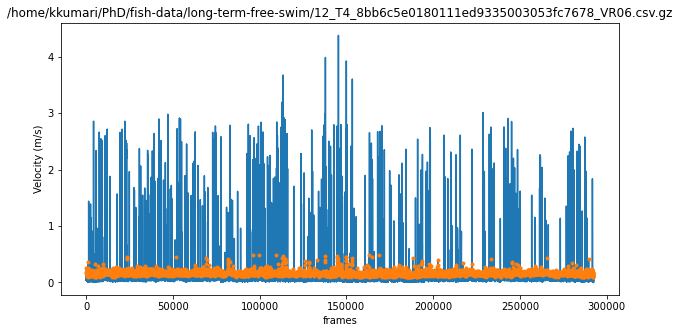

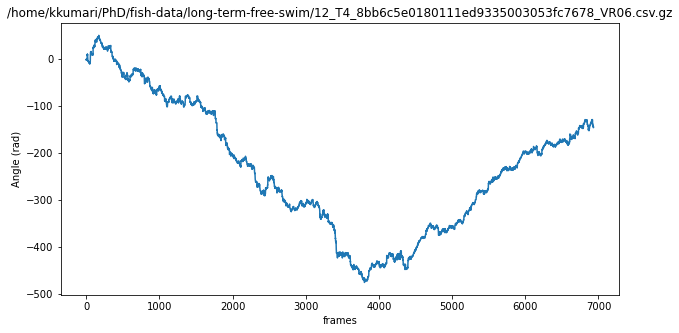

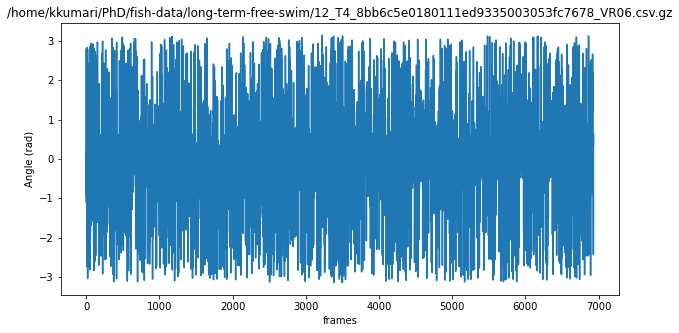

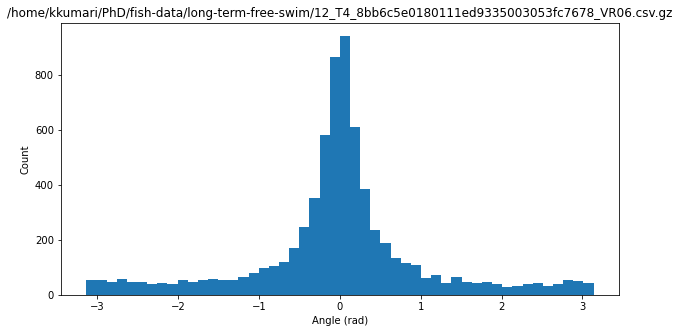

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/12_T4_8bb6c5e0180111ed9335003053fc7678_VR06.csv.gz


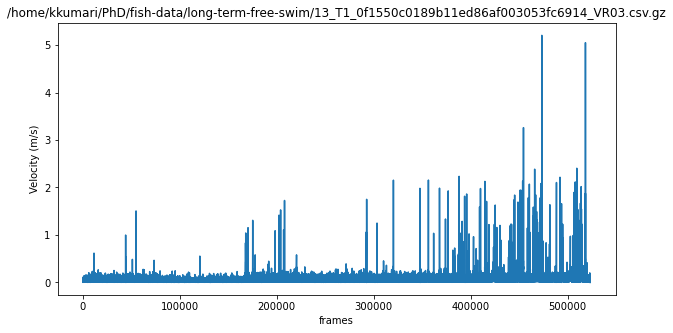

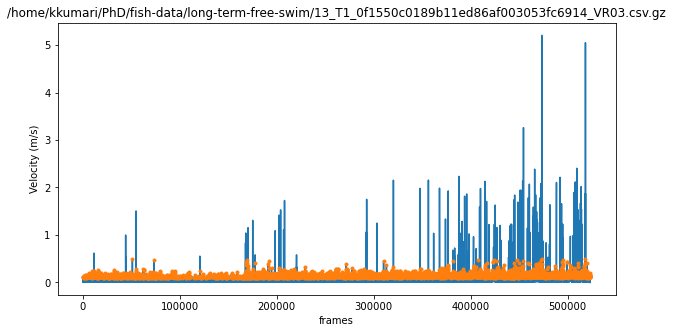

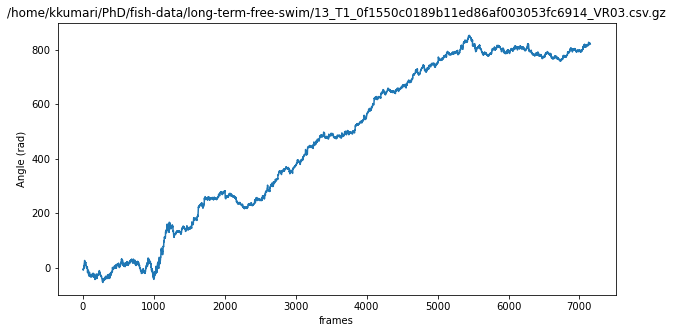

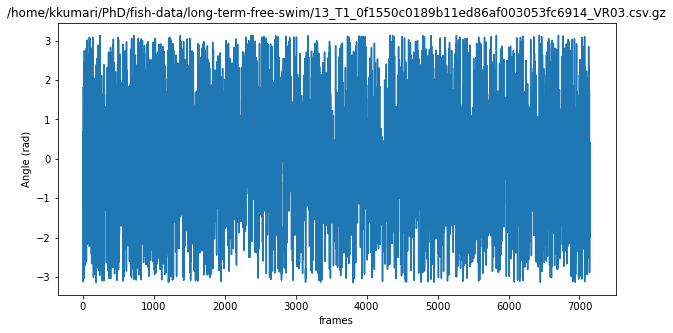

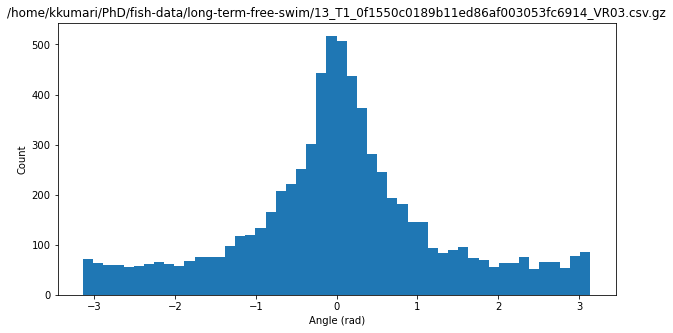

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/13_T1_0f1550c0189b11ed86af003053fc6914_VR03.csv.gz


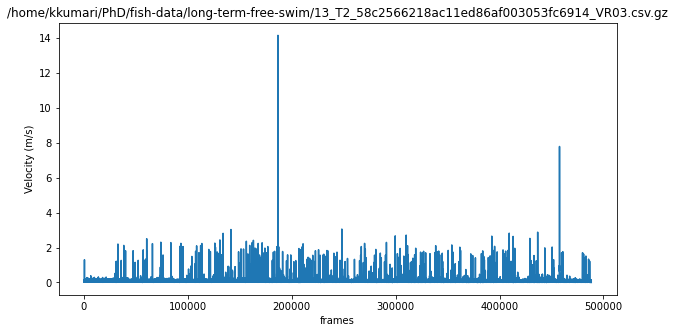

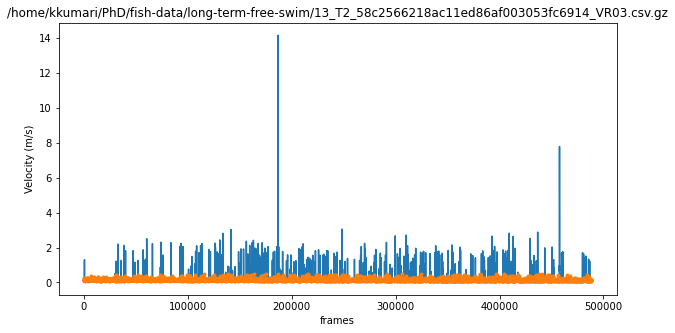

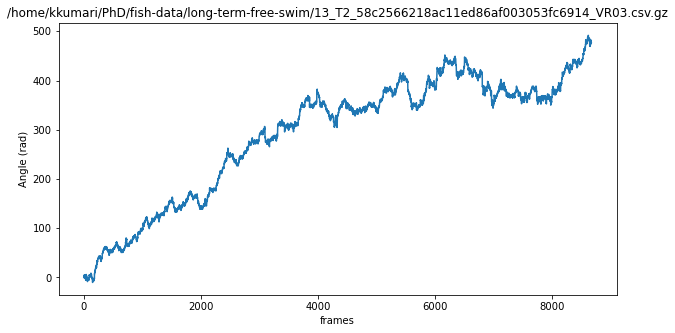

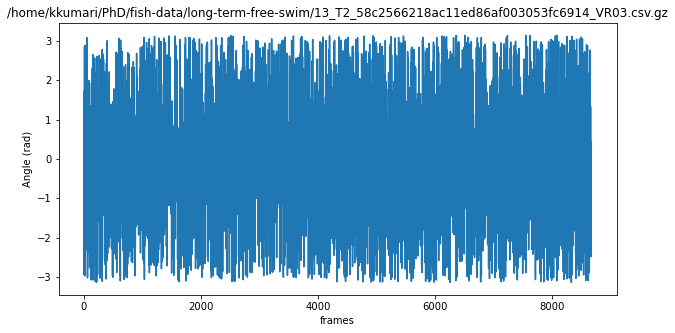

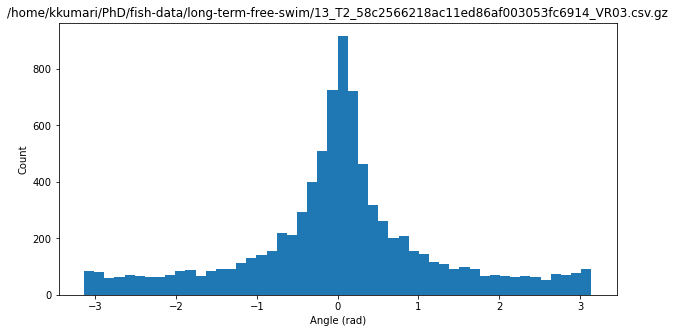

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/13_T2_58c2566218ac11ed86af003053fc6914_VR03.csv.gz


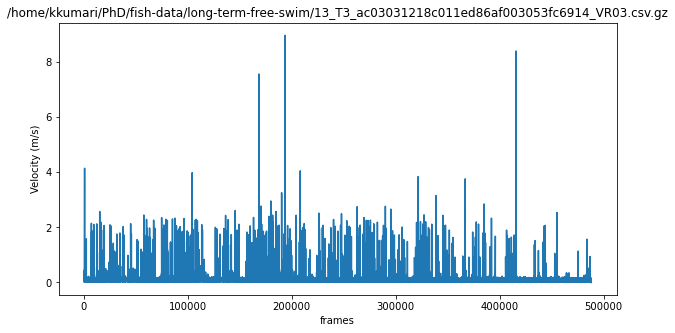

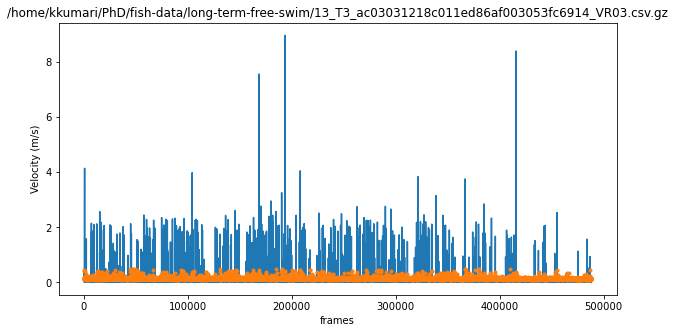

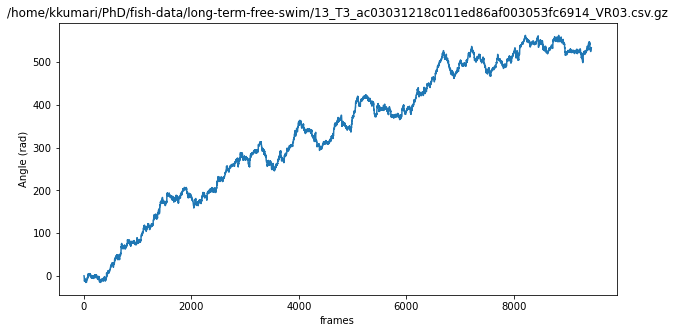

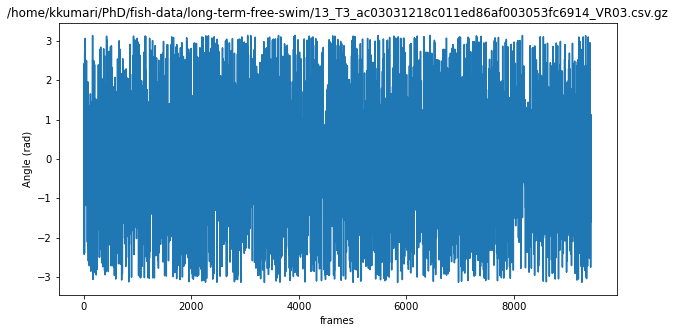

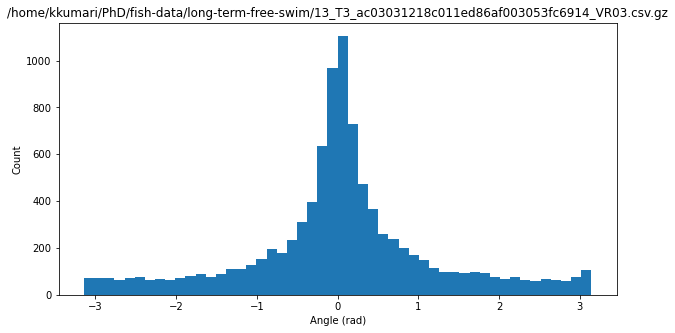

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/13_T3_ac03031218c011ed86af003053fc6914_VR03.csv.gz


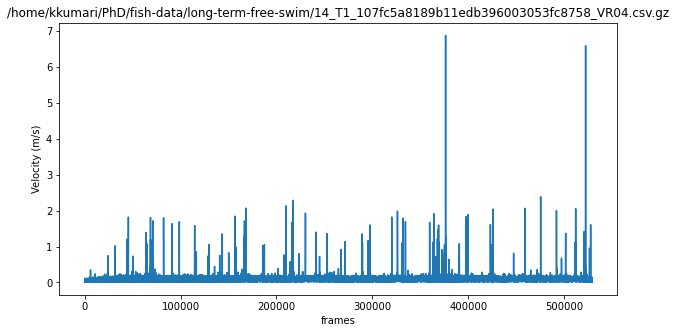

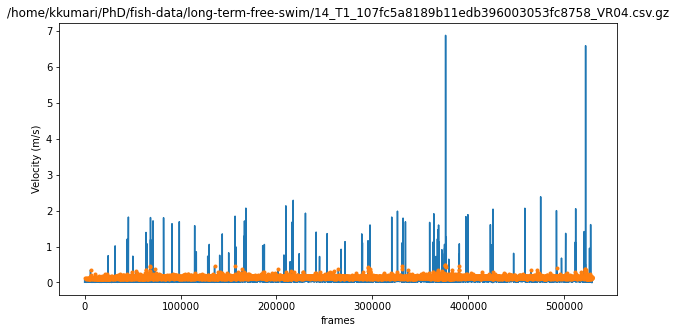

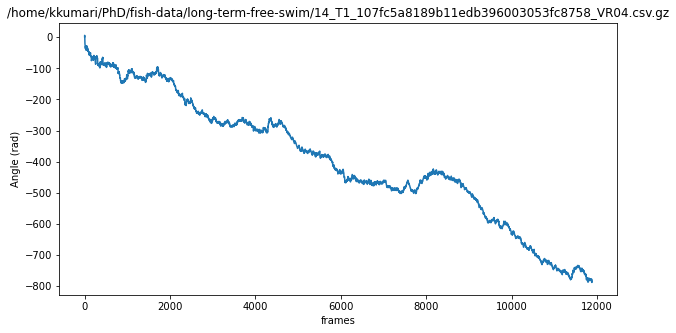

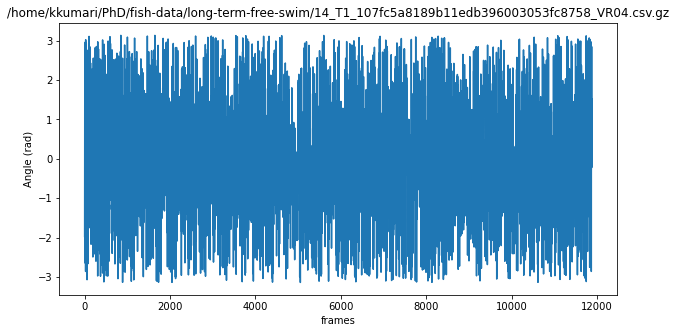

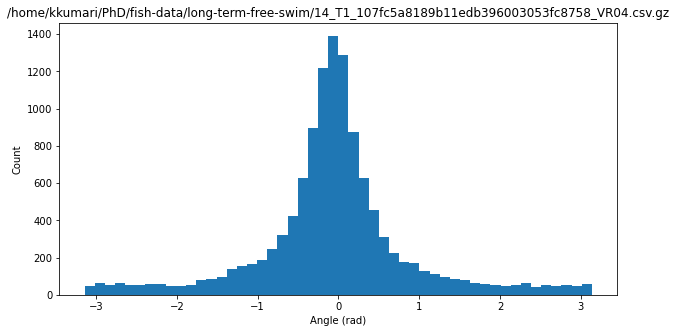

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/14_T1_107fc5a8189b11edb396003053fc8758_VR04.csv.gz


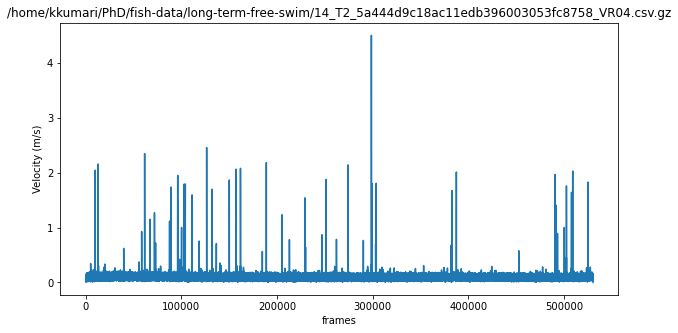

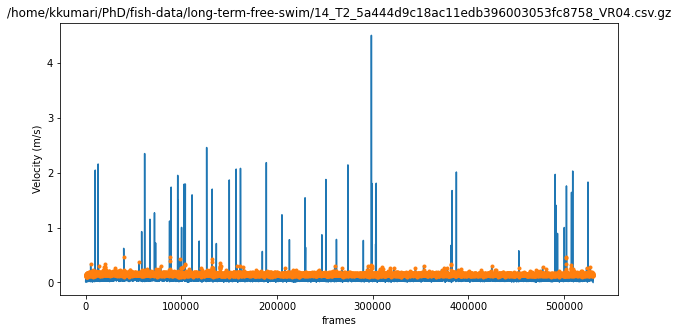

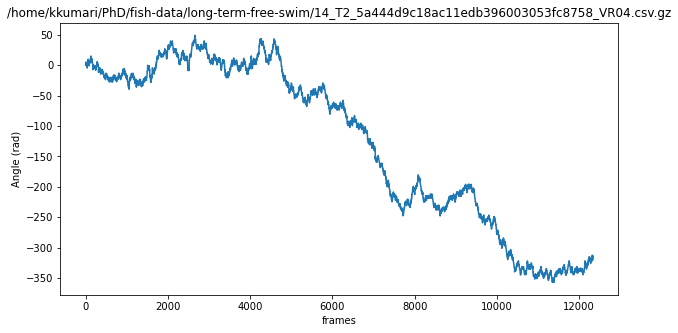

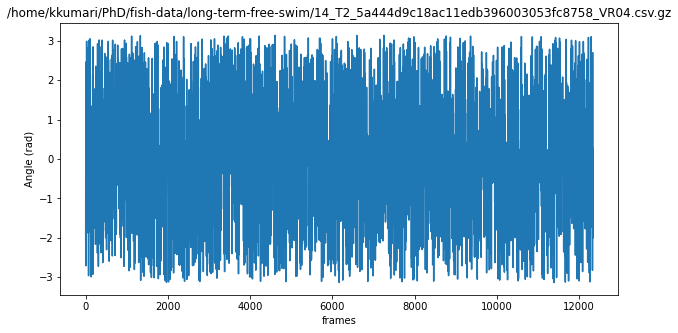

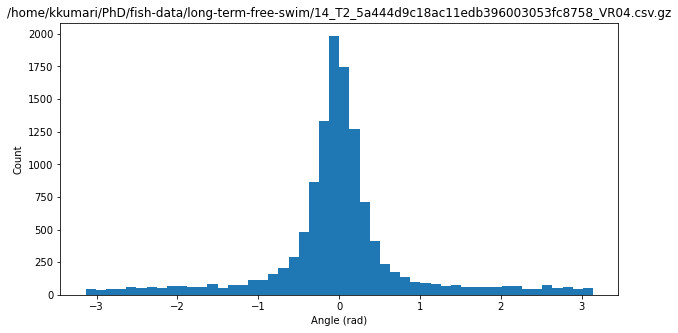

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/14_T2_5a444d9c18ac11edb396003053fc8758_VR04.csv.gz


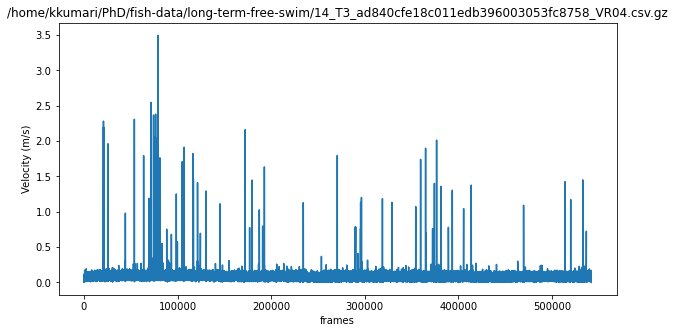

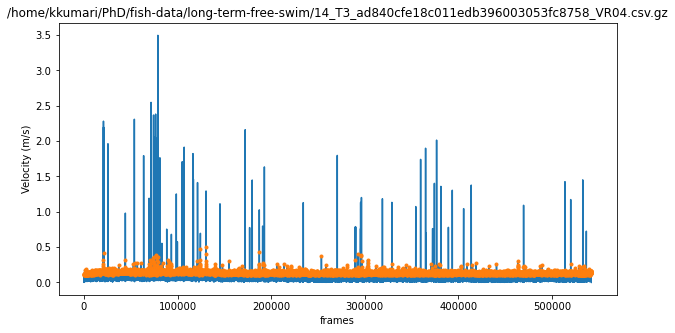

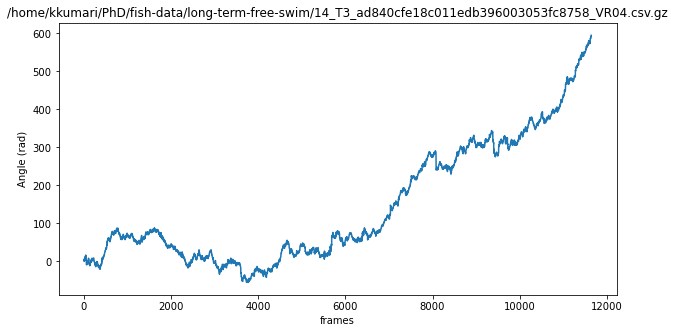

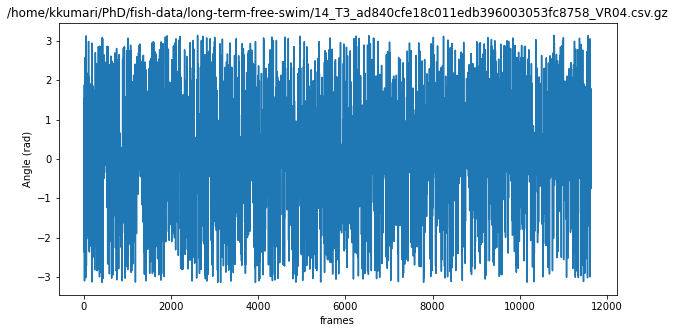

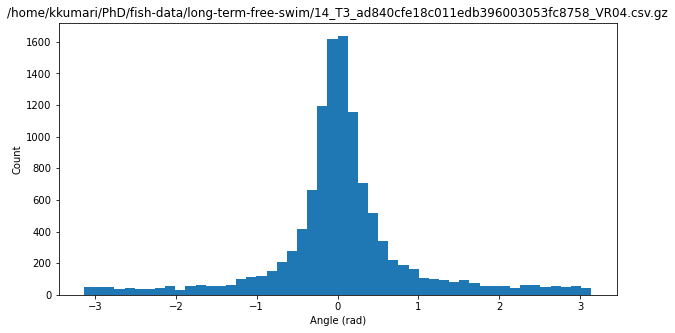

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/14_T3_ad840cfe18c011edb396003053fc8758_VR04.csv.gz


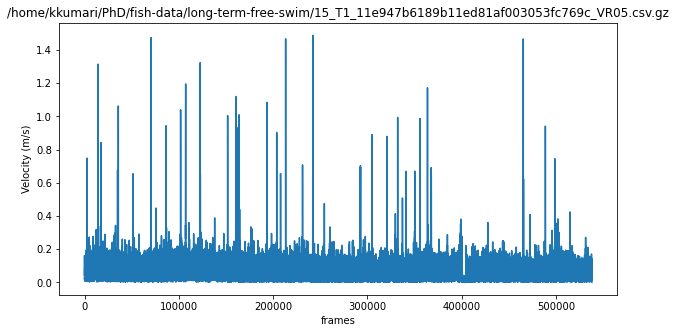

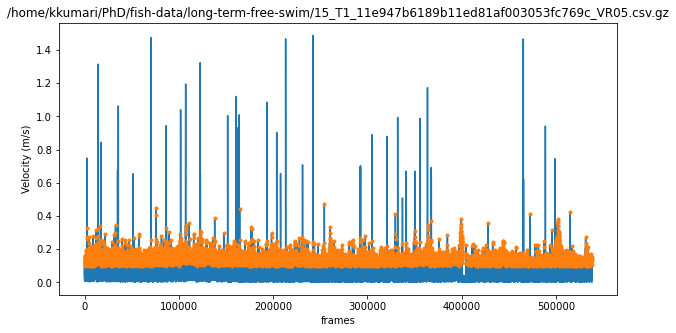

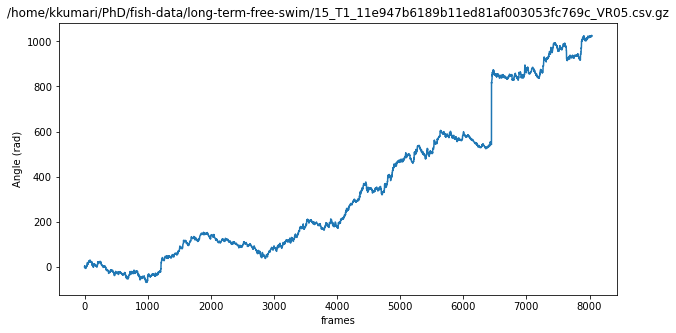

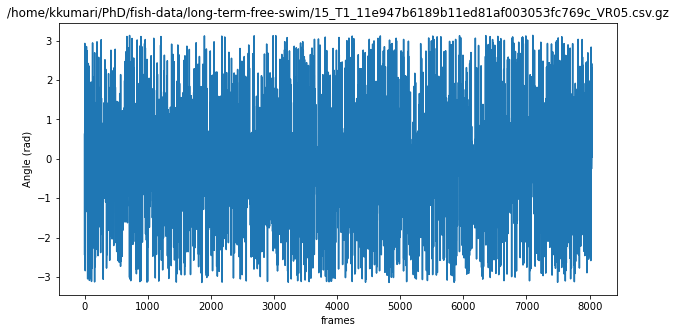

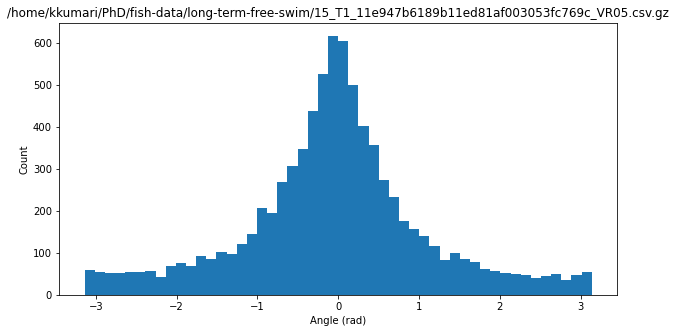

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/15_T1_11e947b6189b11ed81af003053fc769c_VR05.csv.gz


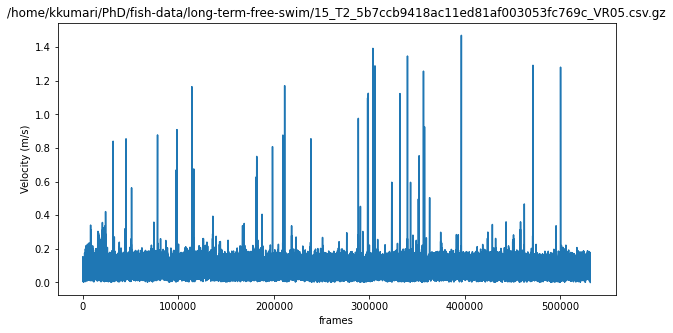

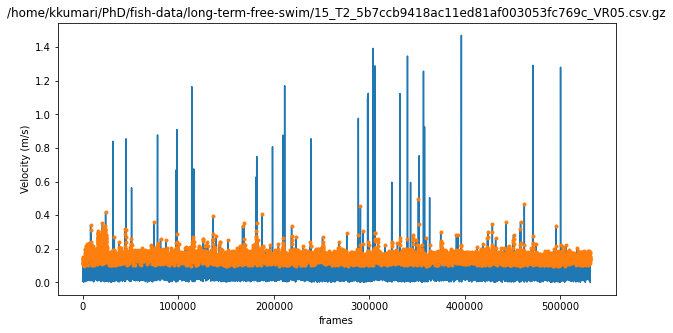

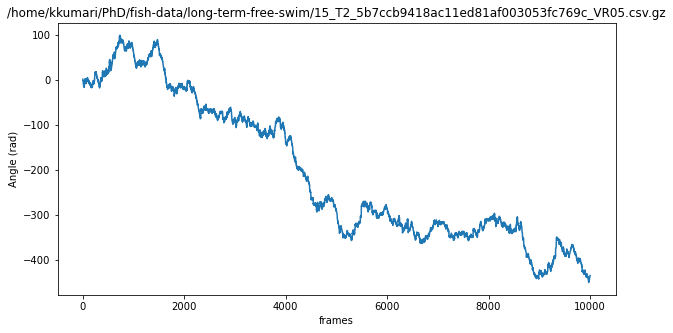

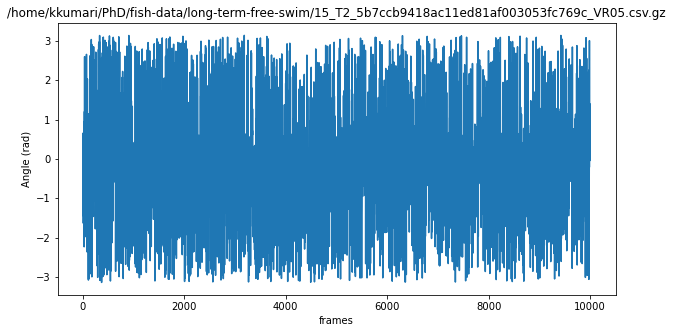

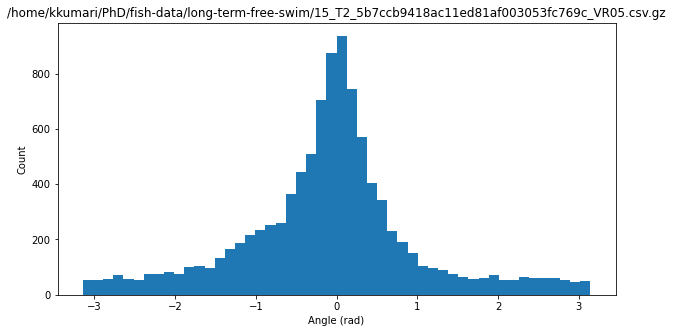

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/15_T2_5b7ccb9418ac11ed81af003053fc769c_VR05.csv.gz


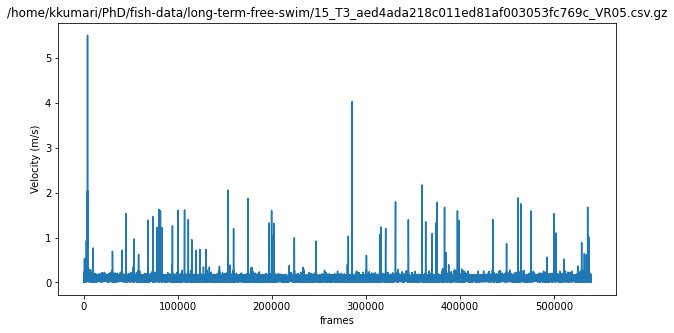

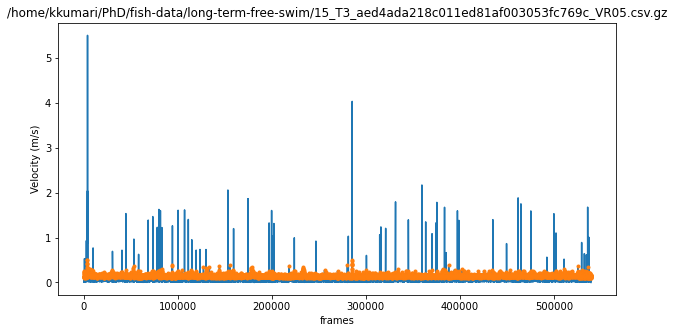

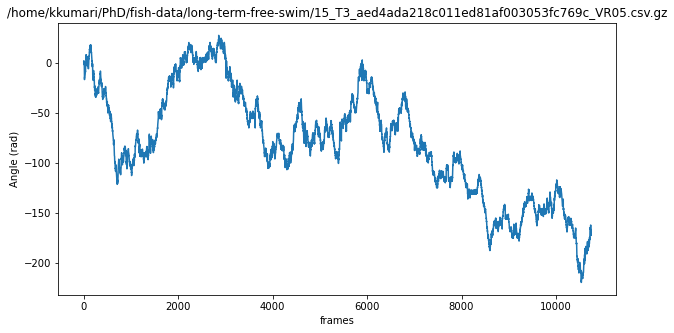

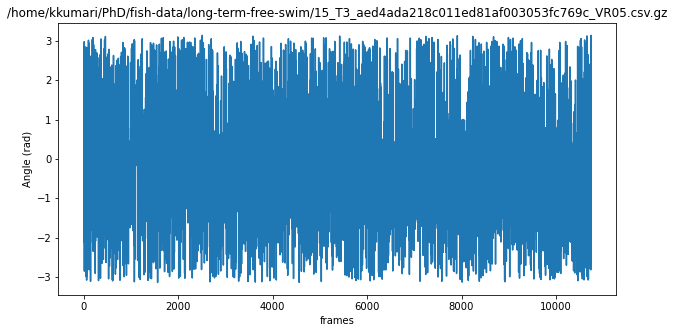

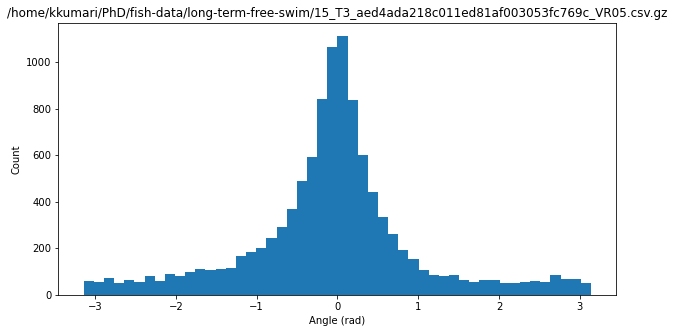

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/15_T3_aed4ada218c011ed81af003053fc769c_VR05.csv.gz


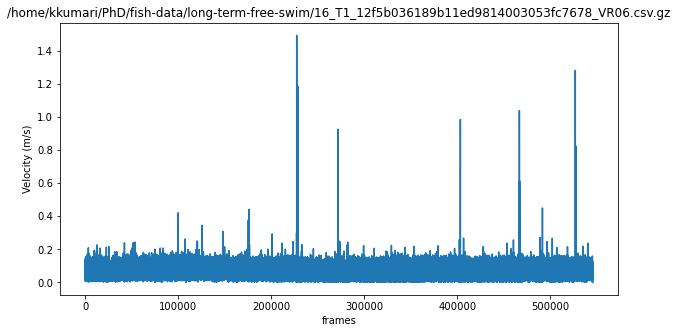

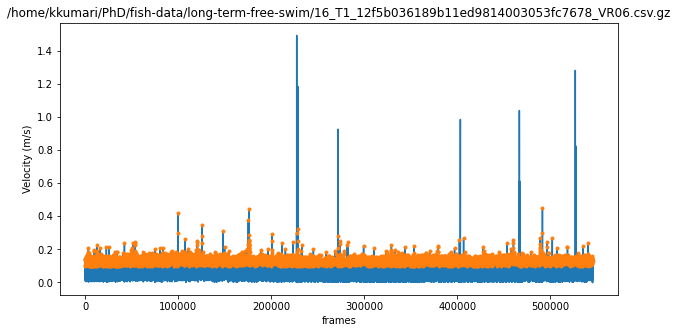

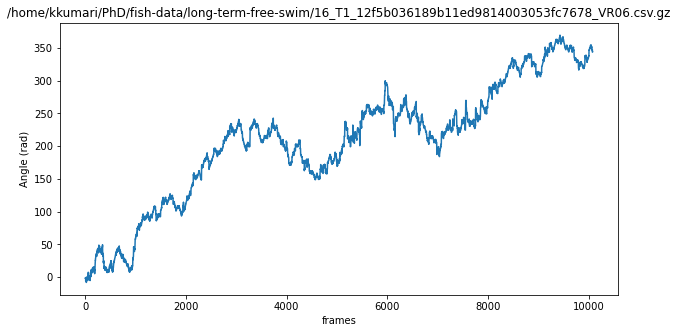

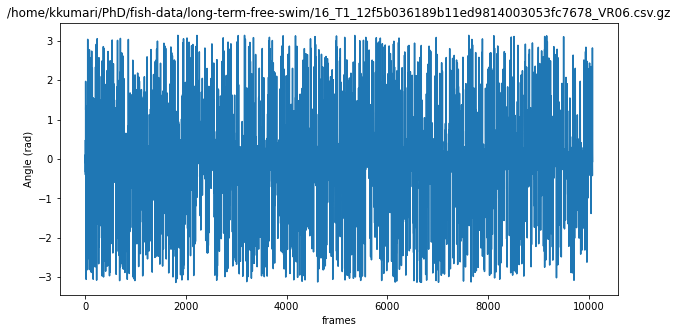

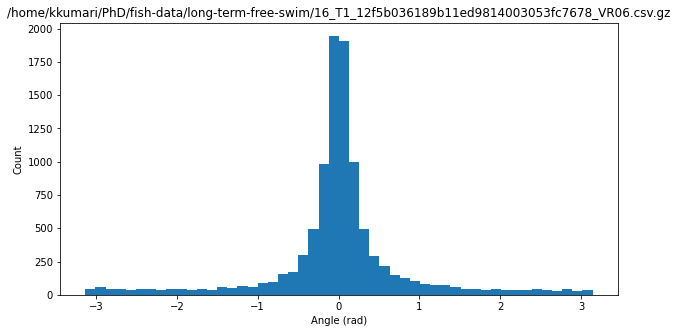

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/16_T1_12f5b036189b11ed9814003053fc7678_VR06.csv.gz


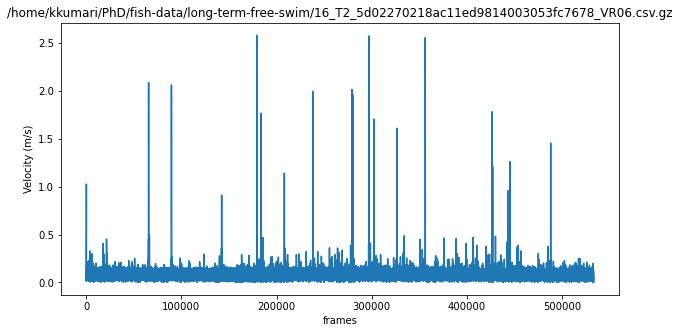

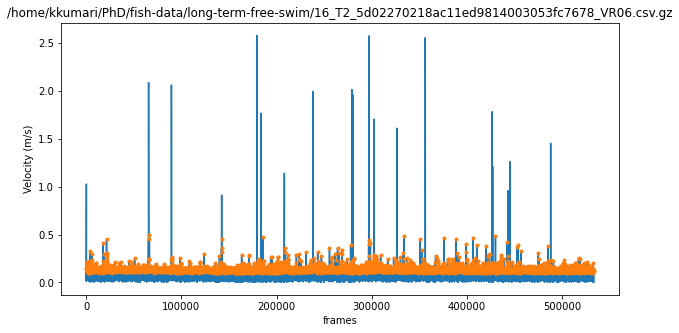

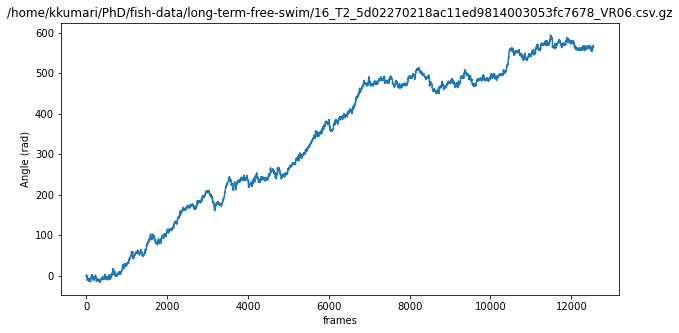

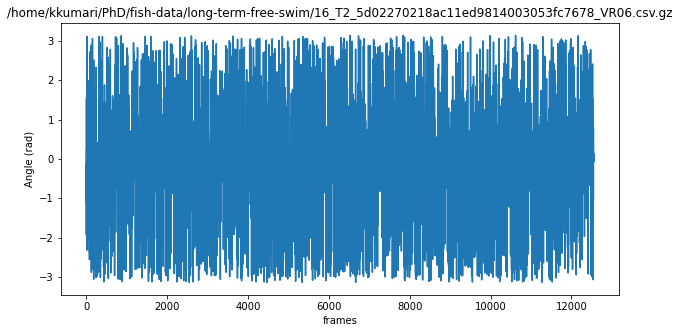

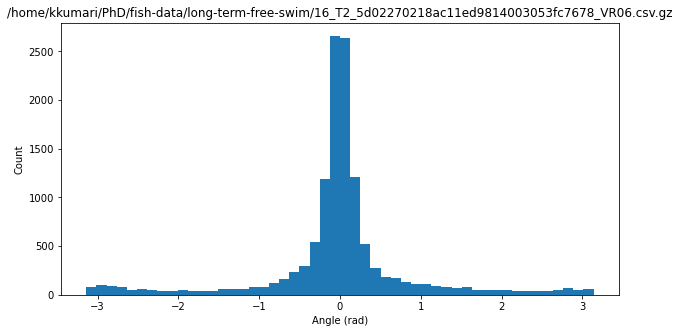

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/16_T2_5d02270218ac11ed9814003053fc7678_VR06.csv.gz


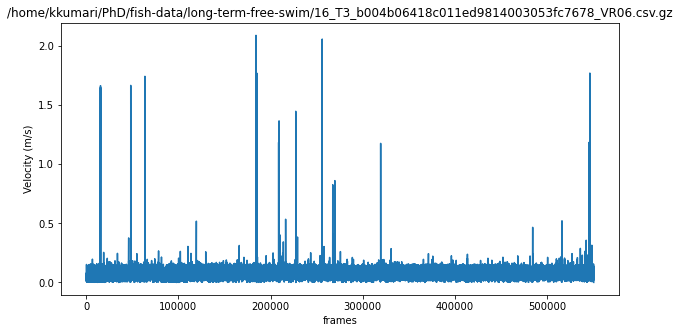

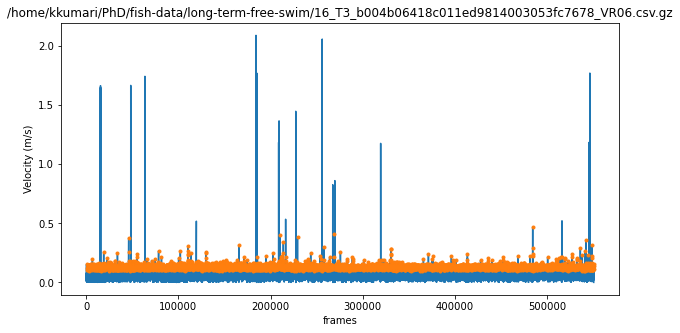

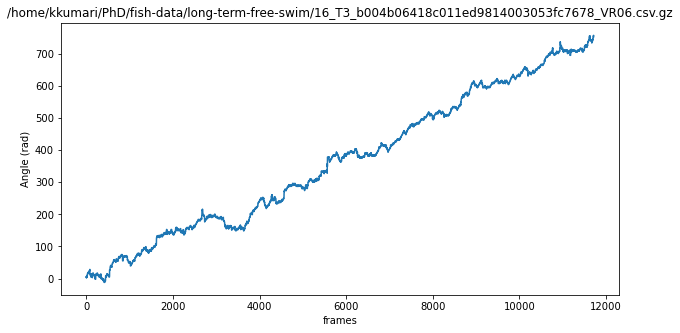

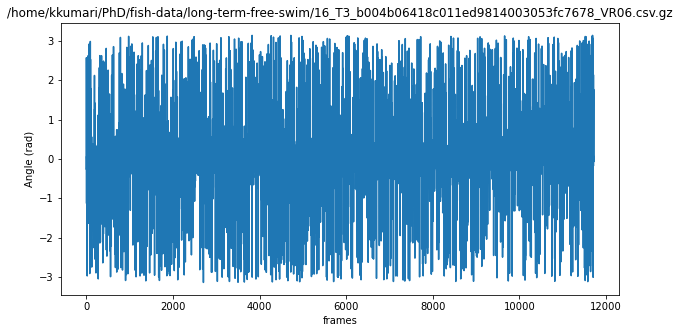

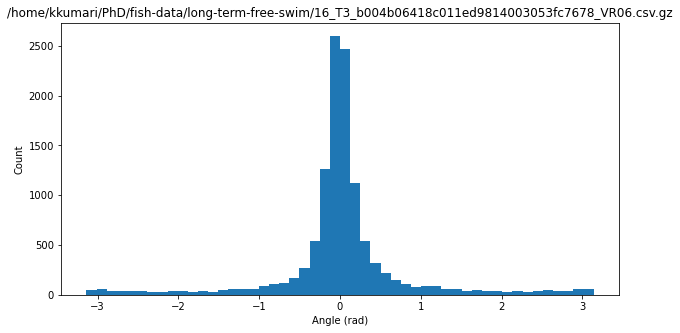

Graphs saved for file: /home/kkumari/PhD/fish-data/long-term-free-swim/16_T3_b004b06418c011ed9814003053fc7678_VR06.csv.gz


In [7]:

# Iterate over each file and process it
for file in all_files:
    process_file(file)
